In [ ]:
#!pip install catboost

In [ ]:
#kaggle competitions download -c house-prices-advanced-regression-techniques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df = train.append(test,ignore_index=False).reset_index()
df.head()

index  Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0      0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl   
1      1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl   
2      2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl   
3      3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl   
4      4   5          60       RL       84.000    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No   
1       None       0.000        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       None       0.000        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex   
1          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex   
2          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex   
3          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd   
4          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          Y      SBrkr       856       854             0       1710         1.000         0.000   
1          Y      SBrkr      1262         0             0       1262         0.000         1.000   
2          Y      SBrkr       920       866             0       1786         1.000         0.000   
3          Y      SBrkr       961       756             0       1717         1.000         0.000   
4          Y      SBrkr      1145      1053             0       2198         1.000         0.000   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         2         1             3             1          Gd             8        Typ   
1         2         0             3             1          TA             6        Typ   
2         2         1             3             1          Gd             6        Typ   
3         1         0             3             1          Gd             7        Typ   
4         2         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  Gara

In [ ]:
df = df.drop("index", axis=1)

In [ ]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
2914  2915         160       RM       21.000     1936   Pave   NaN      Reg         Lvl    AllPub   
2915  2916         160       RM       21.000     1894   Pave   NaN      Reg         Lvl    AllPub   
2916  2917          20       RL      160.000    20000   Pave   NaN      Reg         Lvl    AllPub   
2917  2918          85       RL       62.000    10441   Pave   NaN      Reg         Lvl    AllPub   
2918  2919          60       RL       74.000     9627   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
2914    Inside       Gtl      MeadowV       Norm       Norm    Twnhs     2Story            4   
2915    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE     2Story            4   
2916    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1Story            5   
2917    Inside       Gtl      Mitchel       Norm       Norm     1Fam     SFoyer            5   
2918    Inside       Mod      Mitchel       Norm       Norm     1Fam     2Story            7   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2914            7       1970          1970     Gable  CompShg     CemntBd     CmentBd       None   
2915            5       1970          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916            7       1960          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917            5       1992          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918            5       1993          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
2914       0.000        TA        TA     CBlock       TA       TA           No          Unf   
2915       0.000        TA        TA     CBlock       TA       TA           No          Rec   
2916       0.000        TA        TA     CBlock       TA       TA           No          ALQ   
2917       0.000        TA        TA      PConc       Gd       TA           Av          GLQ   
2918      94.000        TA        TA      PConc       Gd       TA           Av          LwQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
2914       0.000          Unf       0.000    546.000      546.000    GasA        Gd          Y   
2915     252.000          Unf       0.000    294.000      546.000    GasA        TA          Y   
2916    1224.000          Unf       0.000      0.000     1224.000    GasA        Ex          Y   
2917     337.000          Unf       0.000    575.000      912.000    GasA        TA          Y   
2918     758.000          Unf       0.000    238.000      996.000    GasA        Ex          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2914      SBrkr       546       546             0       1092         0.000         0.000   
2915      SBrkr       546       546             0       1092         0.000         0.000   
2916      SBrkr      1224         0             0       1224         1.000         0.000   
2917      SBrkr       970         0             0        970         0.000         1.000   
2918      SBrkr       996      1004             0       2000         0.000         0.000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
2914         1         1             3             1          TA             5        Typ   
2915         1         1             3             1          TA             6        Typ   
2916         1         0             4             1          TA             7        Typ   
2917         1         0             3             1          TA             6        Typ   
2918         2         1             3       

In [ ]:
df["SalePrice"].isna().sum()

1459

In [ ]:
df.describe().T.tail(1)

count       mean       std       min        25%        50%        75%        max
SalePrice 1460.000 180921.196 79442.503 34900.000 129975.000 163000.000 214000.000 755000.000

In [ ]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################

(2919, 81)

##################### Types #####################

Id                 int64

MSSubClass         int64

MSZoning          object

LotFrontage      float64

LotArea            int64

                  ...   

MoSold             int64

YrSold             int64

SaleType          object

SaleCondition     object

SalePrice        float64

Length: 81, dtype: object

##################### Head #####################

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \

0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub   

1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub   

2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub   



  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \

0    Inside       Gtl      CollgCr     

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols

In [ ]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 2919

Variables: 81

cat_cols: 52

num_cols: 28

cat_but_car: 1

num_but_cat: 10


In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        plt.figure(figsize=(8,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

         MSZoning  Ratio

RL           2265 77.595

RM            460 15.759

FV            139  4.762

RH             26  0.891

C (all)        25  0.856


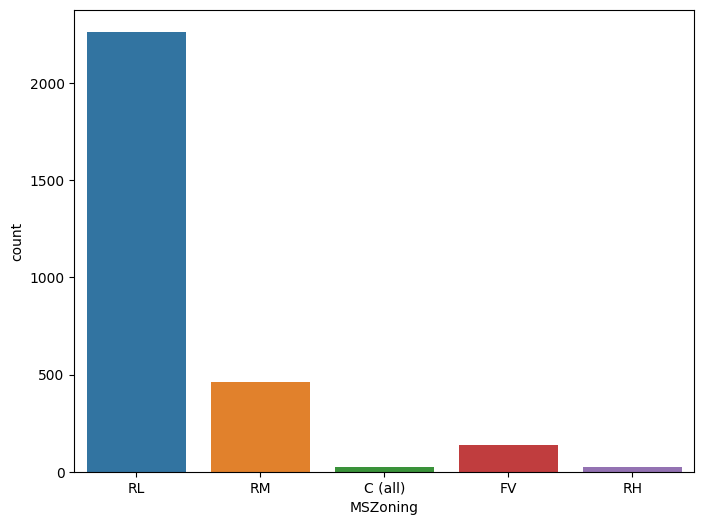

      Street  Ratio

Pave    2907 99.589

Grvl      12  0.411


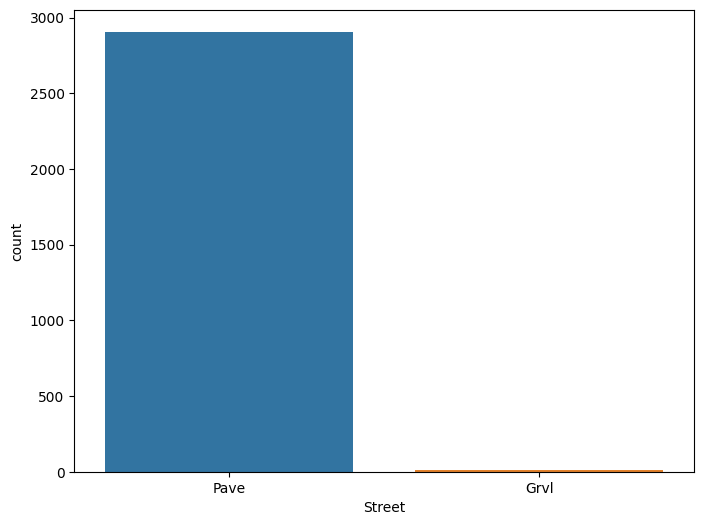

      Alley  Ratio

Grvl    120  4.111

Pave     78  2.672


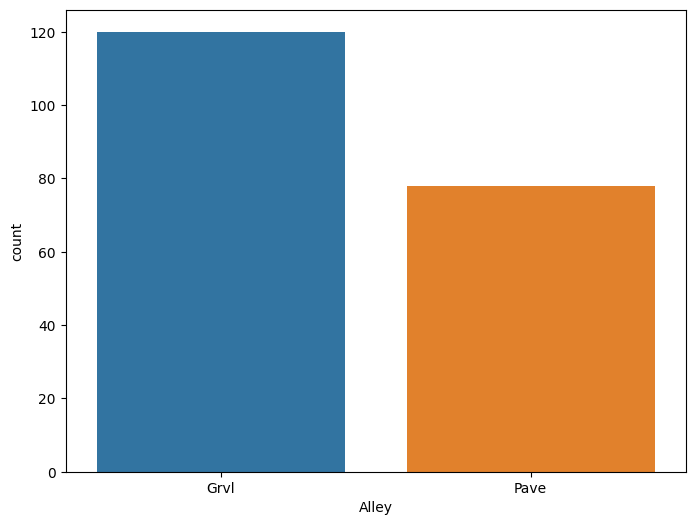

     LotShape  Ratio

Reg      1859 63.686

IR1       968 33.162

IR2        76  2.604

IR3        16  0.548


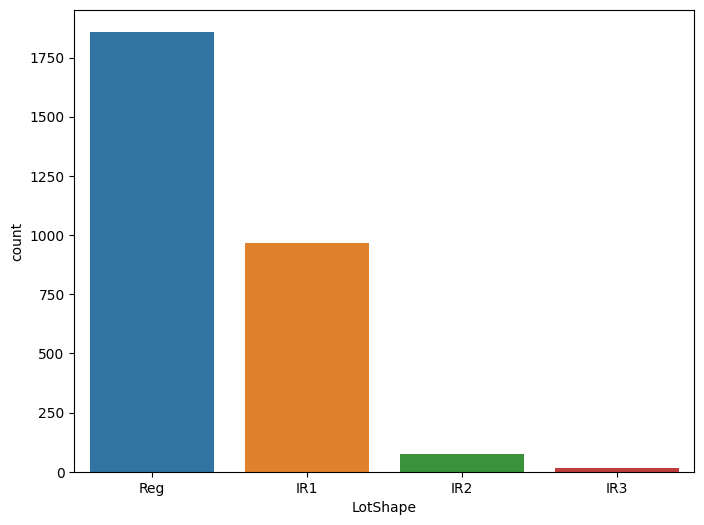

     LandContour  Ratio

Lvl         2622 89.825

HLS          120  4.111

Bnk          117  4.008

Low           60  2.055


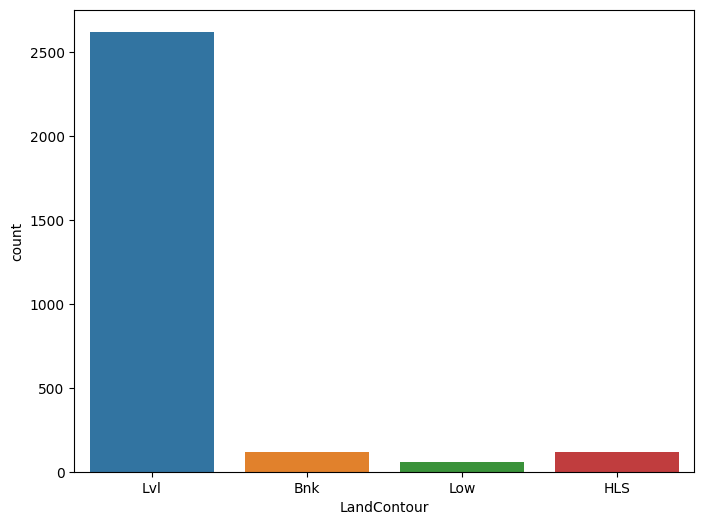

        Utilities  Ratio

AllPub       2916 99.897

NoSeWa          1  0.034


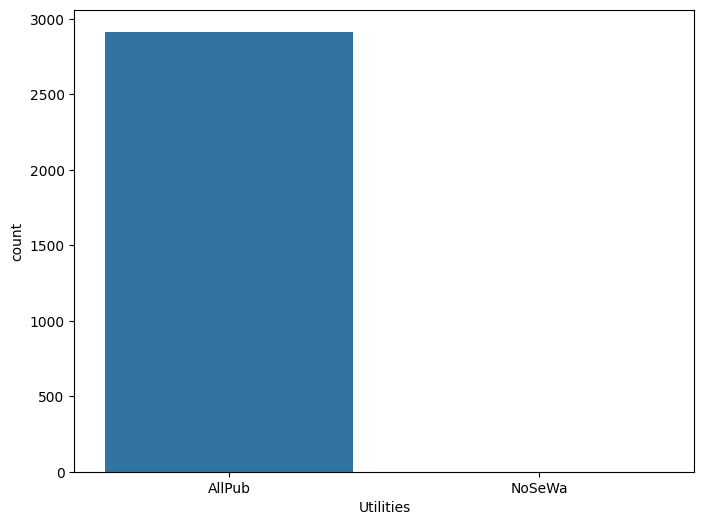

         LotConfig  Ratio

Inside        2133 73.073

Corner         511 17.506

CulDSac        176  6.029

FR2             85  2.912

FR3             14  0.480


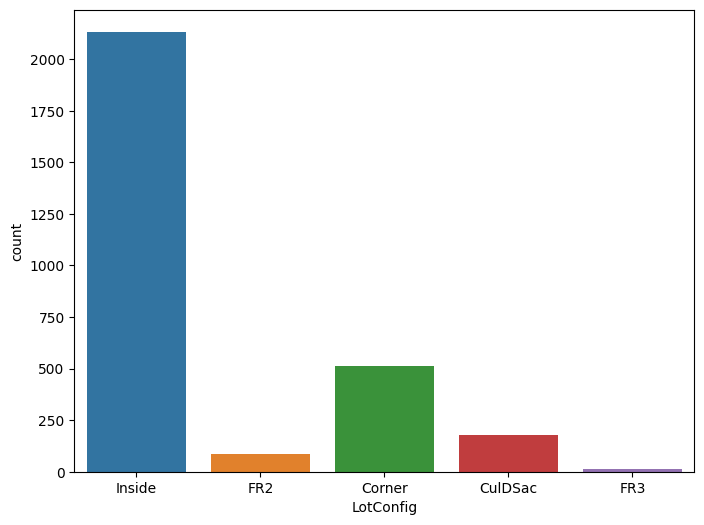

     LandSlope  Ratio

Gtl       2778 95.170

Mod        125  4.282

Sev         16  0.548


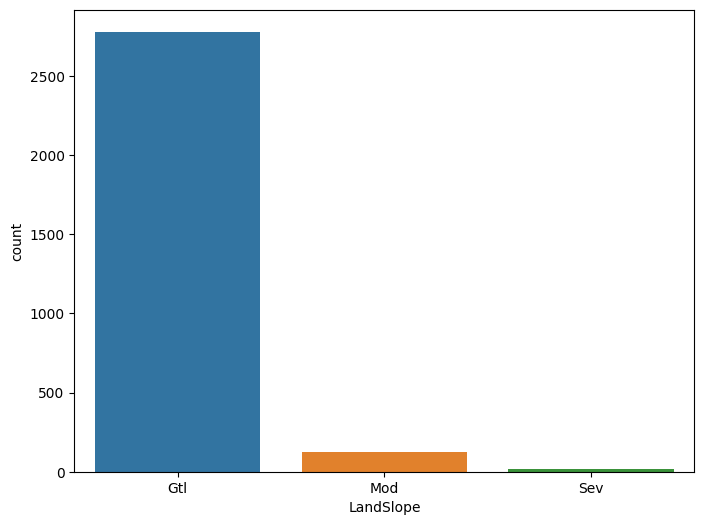

        Condition1  Ratio

Norm          2511 86.023

Feedr          164  5.618

Artery          92  3.152

RRAn            50  1.713

PosN            39  1.336

RRAe            28  0.959

PosA            20  0.685

RRNn             9  0.308

RRNe             6  0.206


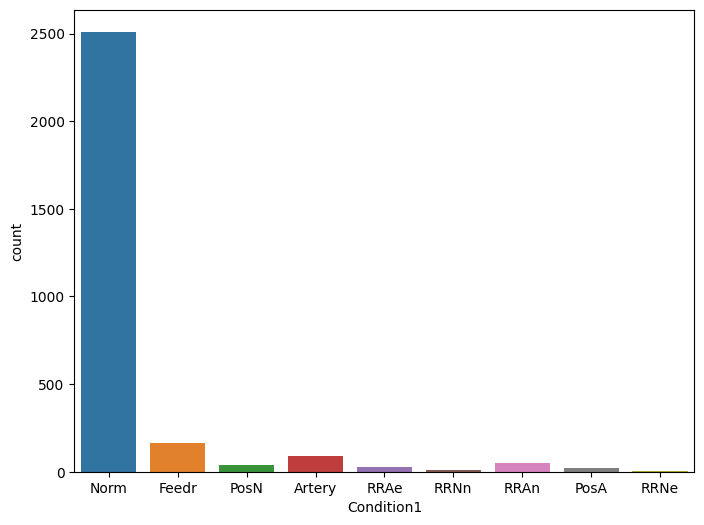

        Condition2  Ratio

Norm          2889 98.972

Feedr           13  0.445

Artery           5  0.171

PosN             4  0.137

PosA             4  0.137

RRNn             2  0.069

RRAn             1  0.034

RRAe             1  0.034


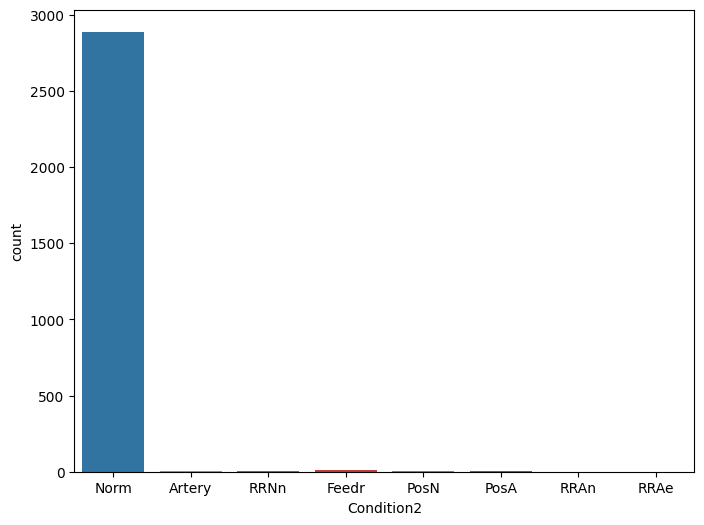

        BldgType  Ratio

1Fam        2425 83.076

TwnhsE       227  7.777

Duplex       109  3.734

Twnhs         96  3.289

2fmCon        62  2.124


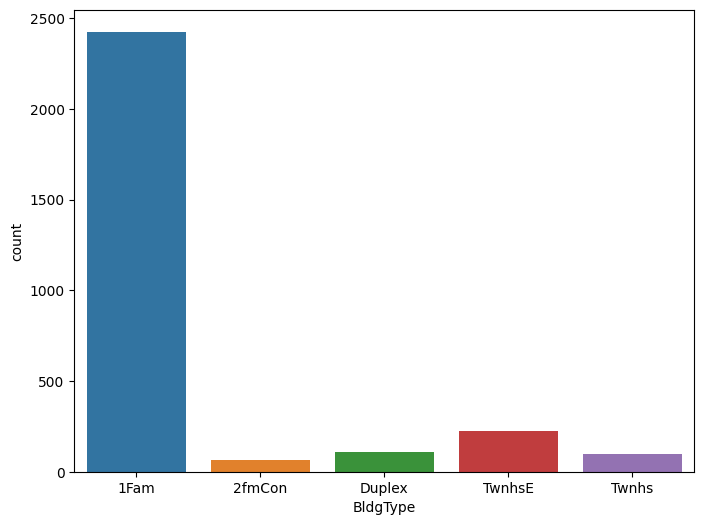

        HouseStyle  Ratio

1Story        1471 50.394

2Story         872 29.873

1.5Fin         314 10.757

SLvl           128  4.385

SFoyer          83  2.843

2.5Unf          24  0.822

1.5Unf          19  0.651

2.5Fin           8  0.274


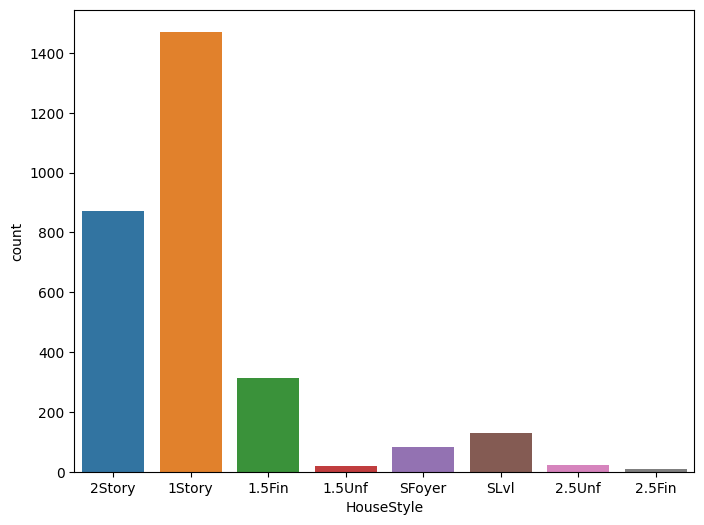

         RoofStyle  Ratio

Gable         2310 79.137

Hip            551 18.876

Gambrel         22  0.754

Flat            20  0.685

Mansard         11  0.377

Shed             5  0.171


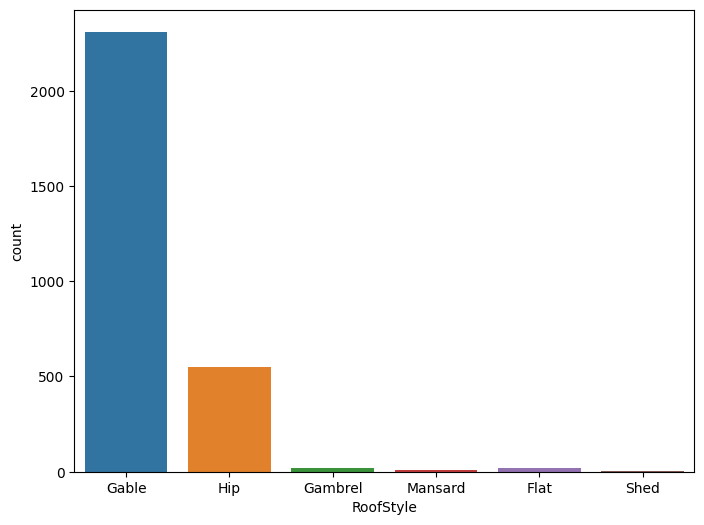

         RoofMatl  Ratio

CompShg      2876 98.527

Tar&Grv        23  0.788

WdShake         9  0.308

WdShngl         7  0.240

Metal           1  0.034

Membran         1  0.034

Roll            1  0.034

ClyTile         1  0.034


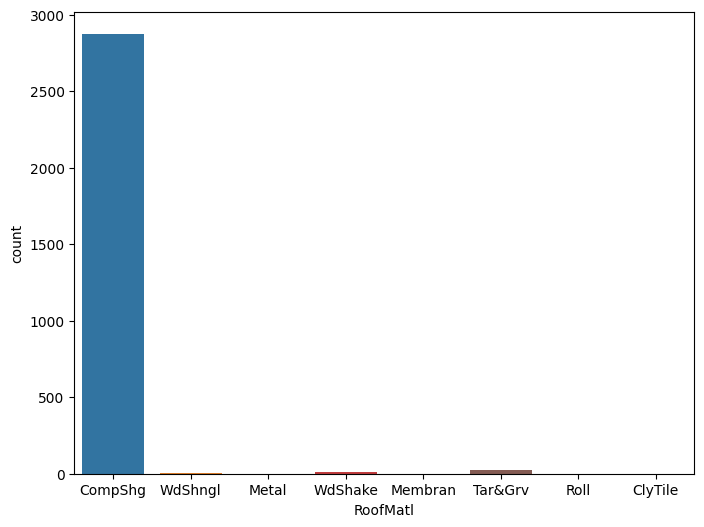

         Exterior1st  Ratio

VinylSd         1025 35.115

MetalSd          450 15.416

HdBoard          442 15.142

Wd Sdng          411 14.080

Plywood          221  7.571

CemntBd          126  4.317

BrkFace           87  2.980

WdShing           56  1.918

AsbShng           44  1.507

Stucco            43  1.473

BrkComm            6  0.206

AsphShn            2  0.069

Stone              2  0.069

CBlock             2  0.069

ImStucc            1  0.034


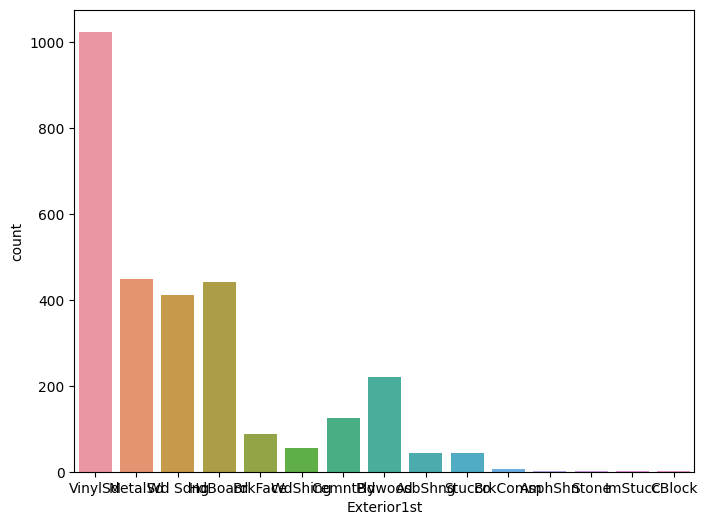

         Exterior2nd  Ratio

VinylSd         1014 34.738

MetalSd          447 15.313

HdBoard          406 13.909

Wd Sdng          391 13.395

Plywood          270  9.250

CmentBd          126  4.317

Wd Shng           81  2.775

BrkFace           47  1.610

Stucco            47  1.610

AsbShng           38  1.302

Brk Cmn           22  0.754

ImStucc           15  0.514

Stone              6  0.206

AsphShn            4  0.137

CBlock             3  0.103

Other              1  0.034


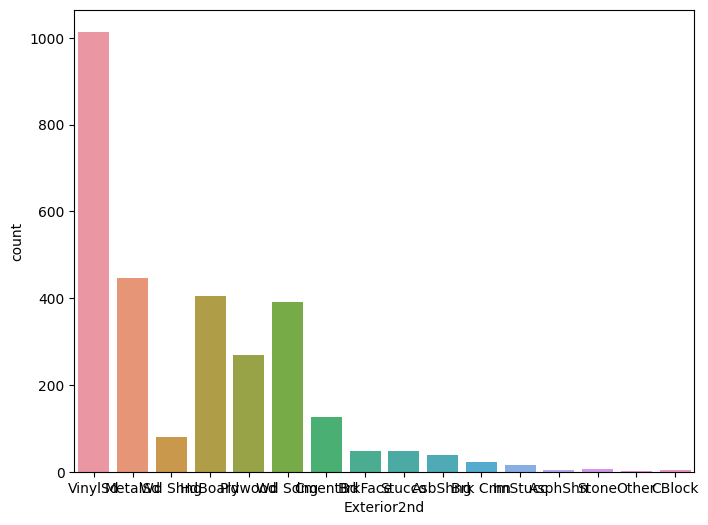

         MasVnrType  Ratio

None           1742 59.678

BrkFace         879 30.113

Stone           249  8.530

BrkCmn           25  0.856


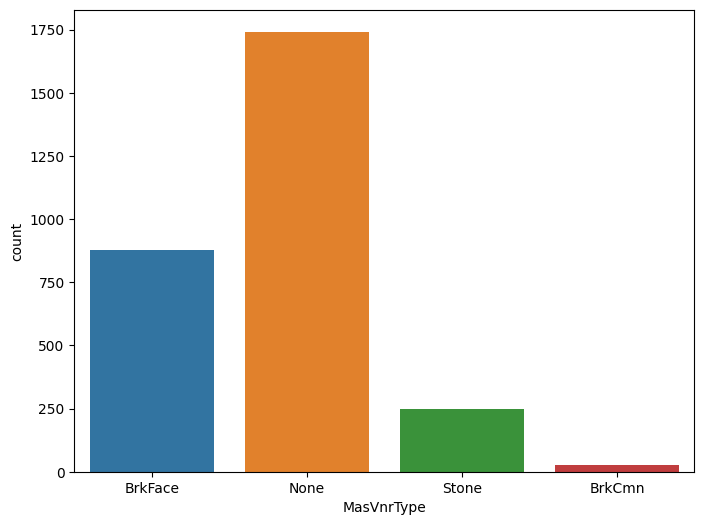

    ExterQual  Ratio

TA       1798 61.596

Gd        979 33.539

Ex        107  3.666

Fa         35  1.199


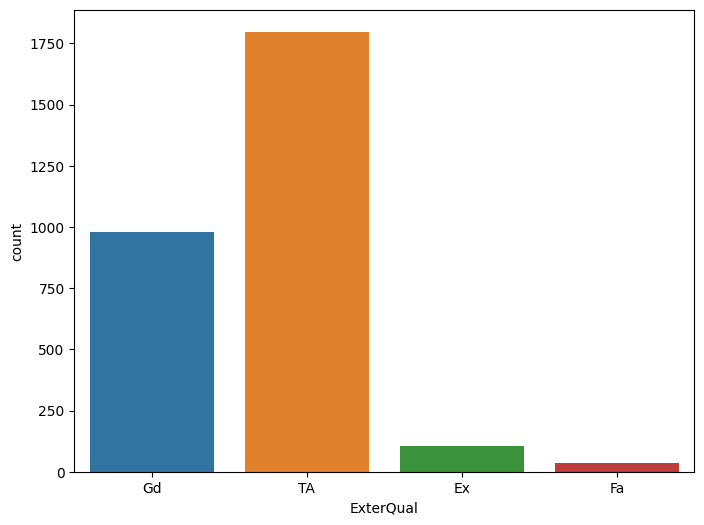

    ExterCond  Ratio

TA       2538 86.948

Gd        299 10.243

Fa         67  2.295

Ex         12  0.411

Po          3  0.103


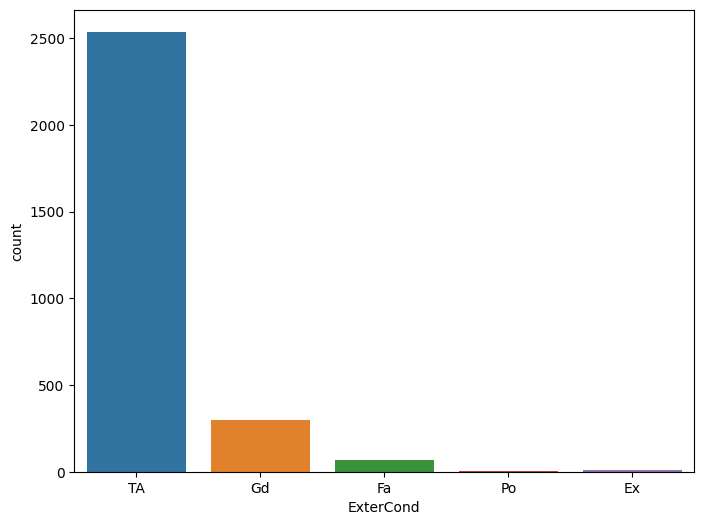

        Foundation  Ratio

PConc         1308 44.810

CBlock        1235 42.309

BrkTil         311 10.654

Slab            49  1.679

Stone           11  0.377

Wood             5  0.171


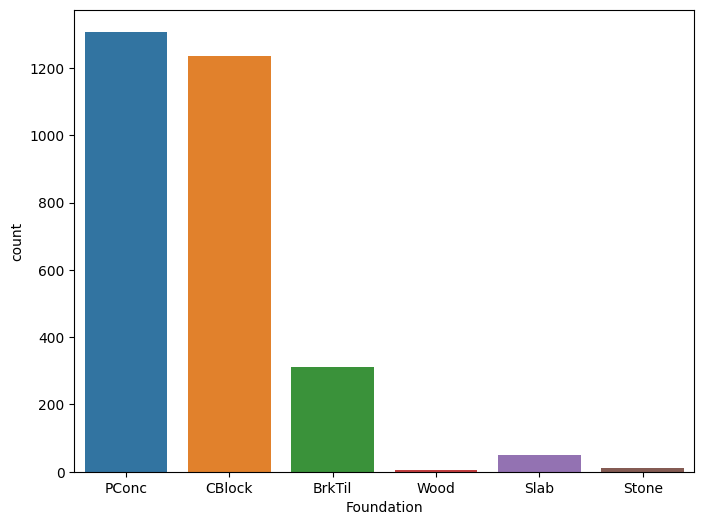

    BsmtQual  Ratio

TA      1283 43.953

Gd      1209 41.418

Ex       258  8.839

Fa        88  3.015


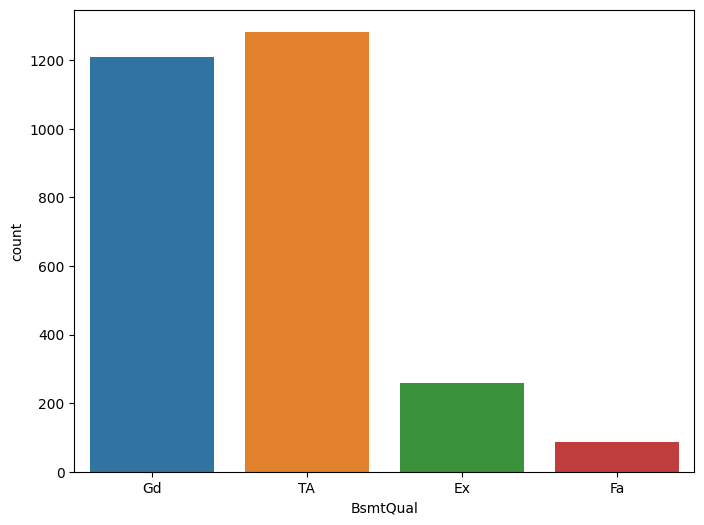

    BsmtCond  Ratio

TA      2606 89.277

Gd       122  4.180

Fa       104  3.563

Po         5  0.171


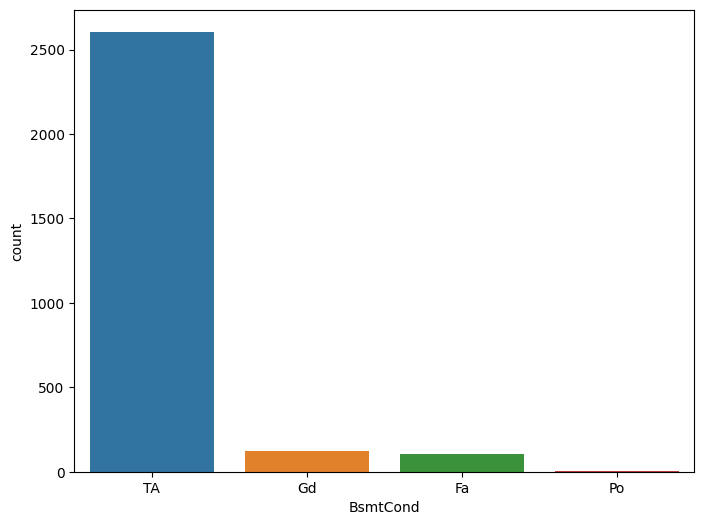

    BsmtExposure  Ratio

No          1904 65.228

Av           418 14.320

Gd           276  9.455

Mn           239  8.188


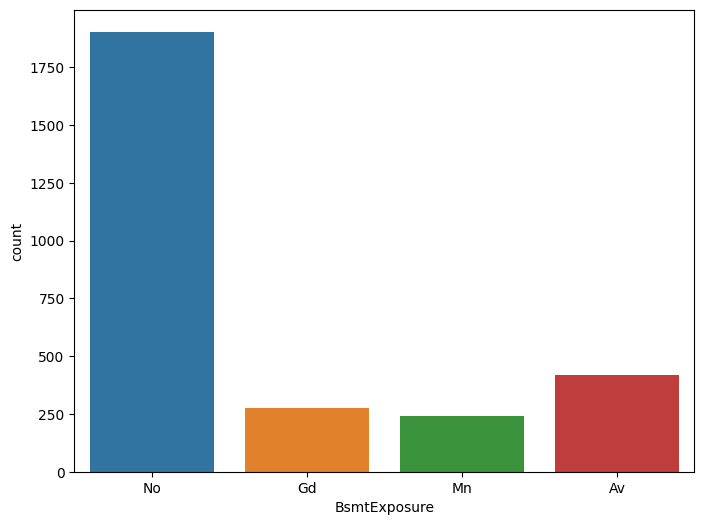

     BsmtFinType1  Ratio

Unf           851 29.154

GLQ           849 29.085

ALQ           429 14.697

Rec           288  9.866

BLQ           269  9.215

LwQ           154  5.276


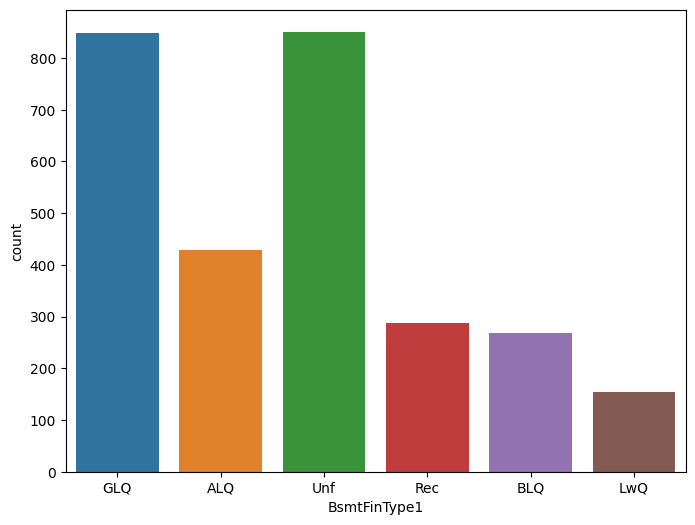

     BsmtFinType2  Ratio

Unf          2493 85.406

Rec           105  3.597

LwQ            87  2.980

BLQ            68  2.330

ALQ            52  1.781

GLQ            34  1.165


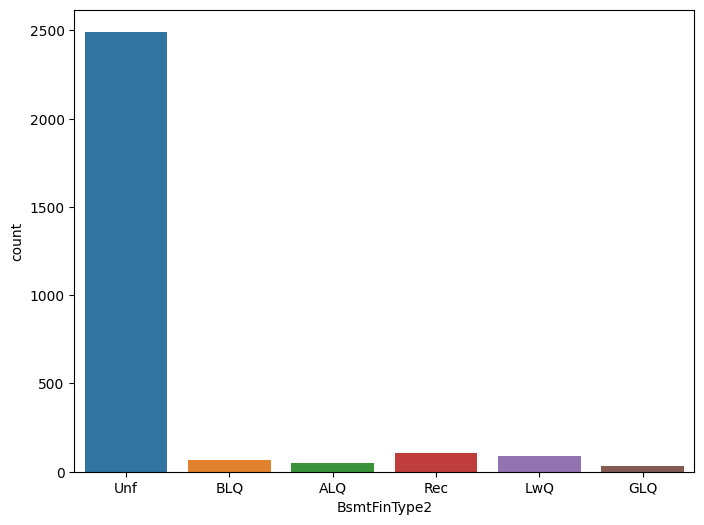

       Heating  Ratio

GasA      2874 98.458

GasW        27  0.925

Grav         9  0.308

Wall         6  0.206

OthW         2  0.069

Floor        1  0.034


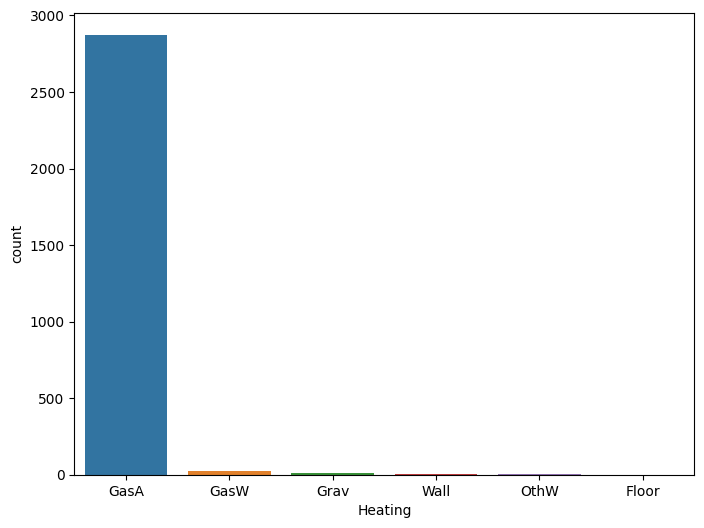

    HeatingQC  Ratio

Ex       1493 51.148

TA        857 29.359

Gd        474 16.238

Fa         92  3.152

Po          3  0.103


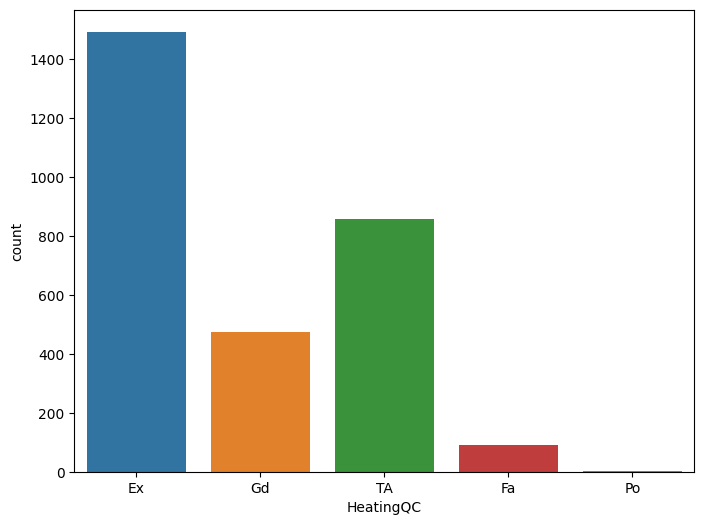

   CentralAir  Ratio

Y        2723 93.285

N         196  6.715


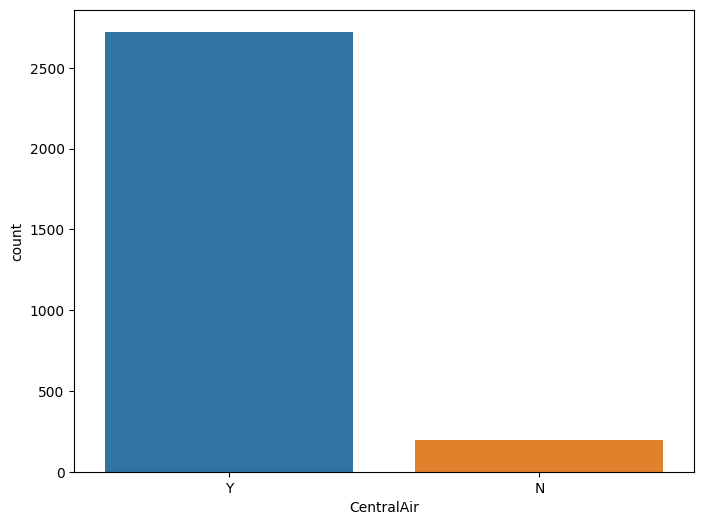

       Electrical  Ratio

SBrkr        2671 91.504

FuseA         188  6.441

FuseF          50  1.713

FuseP           8  0.274

Mix             1  0.034


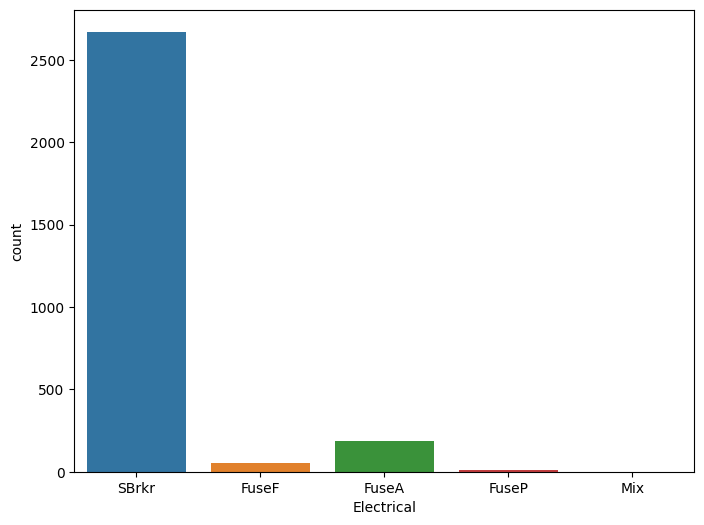

    KitchenQual  Ratio

TA         1492 51.113

Gd         1151 39.431

Ex          205  7.023

Fa           70  2.398


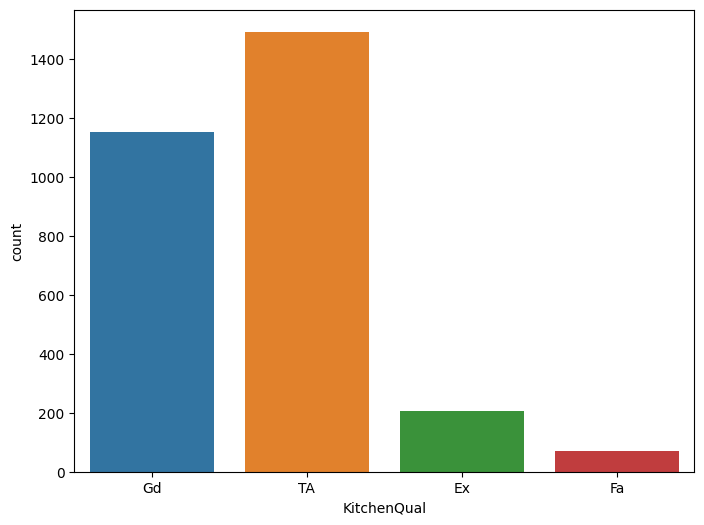

      Functional  Ratio

Typ         2717 93.080

Min2          70  2.398

Min1          65  2.227

Mod           35  1.199

Maj1          19  0.651

Maj2           9  0.308

Sev            2  0.069


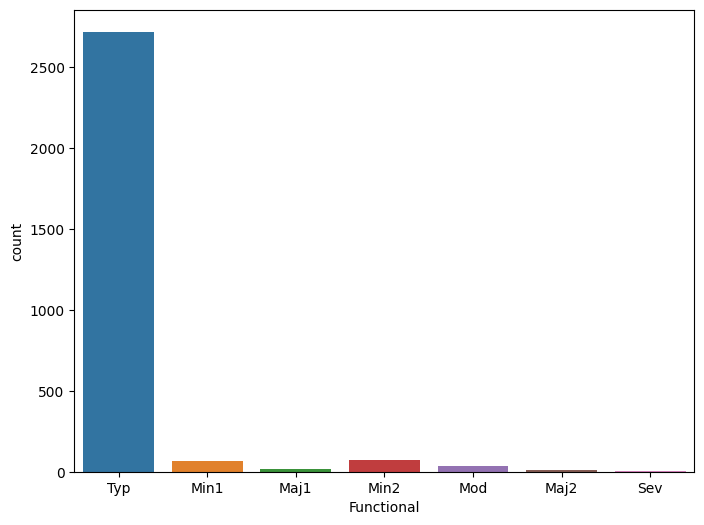

    FireplaceQu  Ratio

Gd          744 25.488

TA          592 20.281

Fa           74  2.535

Po           46  1.576

Ex           43  1.473


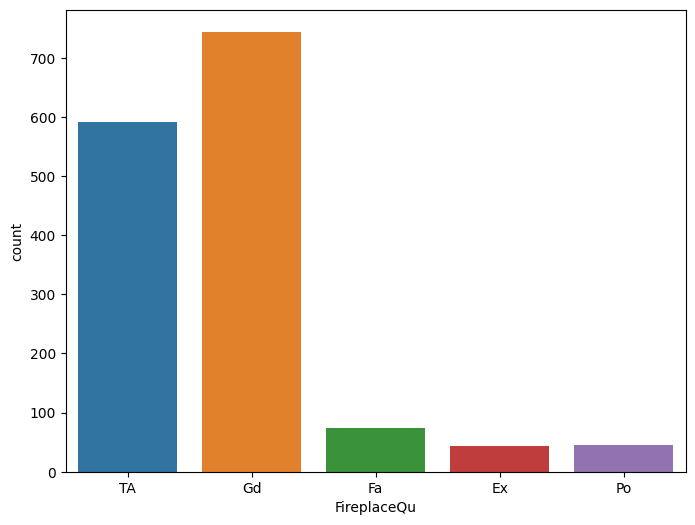

         GarageType  Ratio

Attchd         1723 59.027

Detchd          779 26.687

BuiltIn         186  6.372

Basment          36  1.233

2Types           23  0.788

CarPort          15  0.514


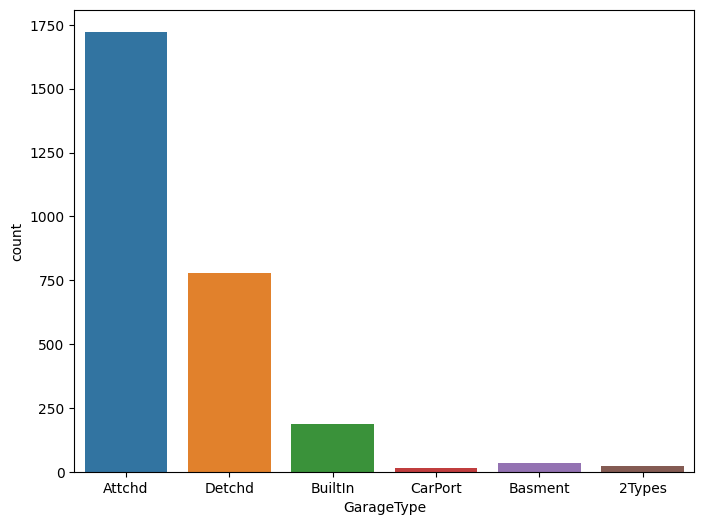

     GarageFinish  Ratio

Unf          1230 42.138

RFn           811 27.783

Fin           719 24.632


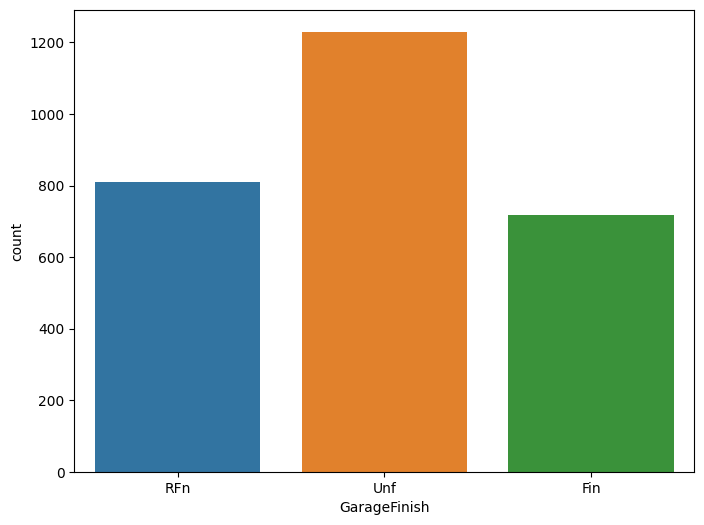

    GarageQual  Ratio

TA        2604 89.209

Fa         124  4.248

Gd          24  0.822

Po           5  0.171

Ex           3  0.103


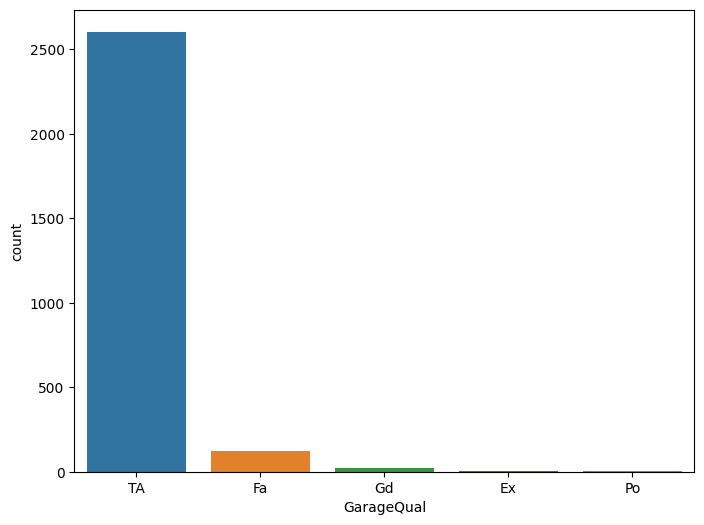

    GarageCond  Ratio

TA        2654 90.922

Fa          74  2.535

Gd          15  0.514

Po          14  0.480

Ex           3  0.103


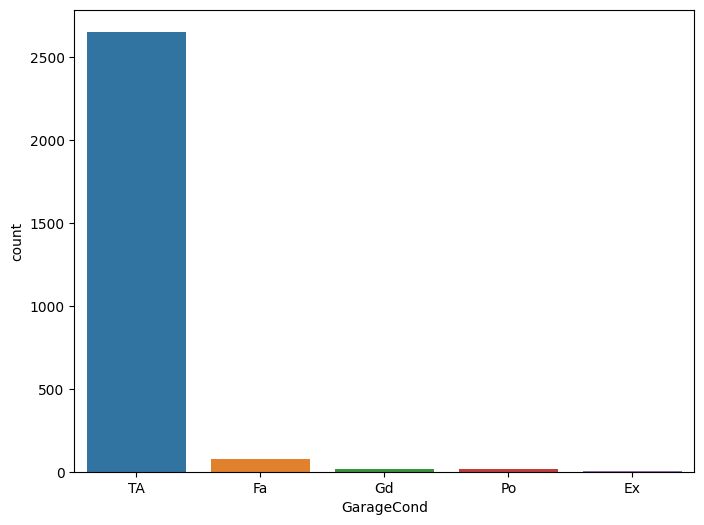

   PavedDrive  Ratio

Y        2641 90.476

N         216  7.400

P          62  2.124


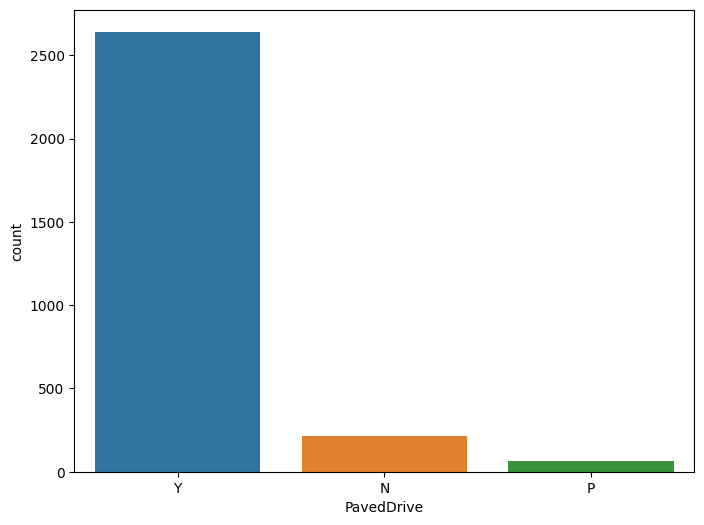

    PoolQC  Ratio

Ex       4  0.137

Gd       4  0.137

Fa       2  0.069


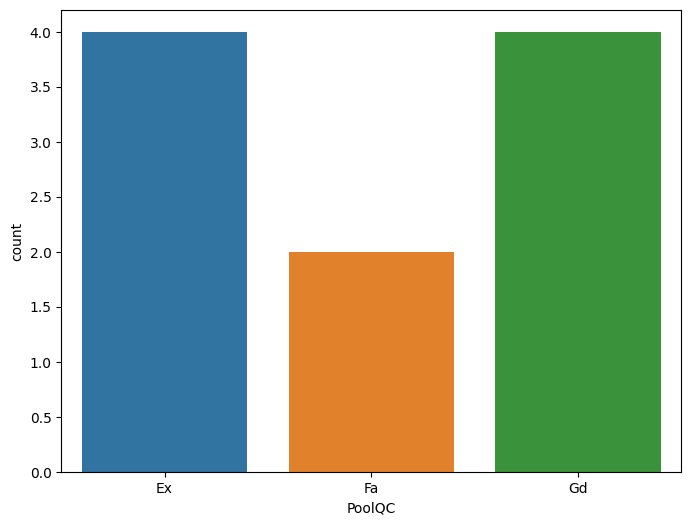

       Fence  Ratio

MnPrv    329 11.271

GdPrv    118  4.042

GdWo     112  3.837

MnWw      12  0.411


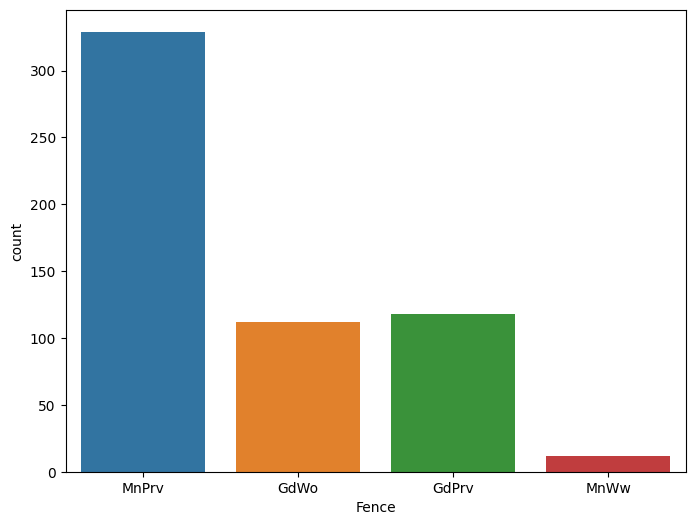

      MiscFeature  Ratio

Shed           95  3.255

Gar2            5  0.171

Othr            4  0.137

TenC            1  0.034


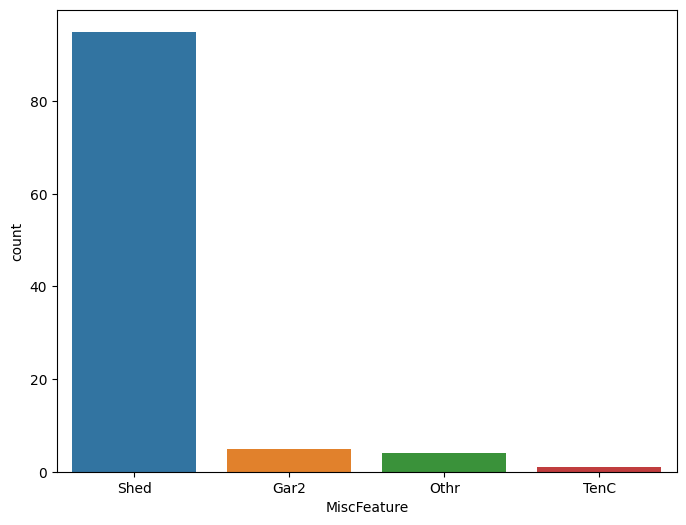

       SaleType  Ratio

WD         2525 86.502

New         239  8.188

COD          87  2.980

ConLD        26  0.891

CWD          12  0.411

ConLI         9  0.308

ConLw         8  0.274

Oth           7  0.240

Con           5  0.171


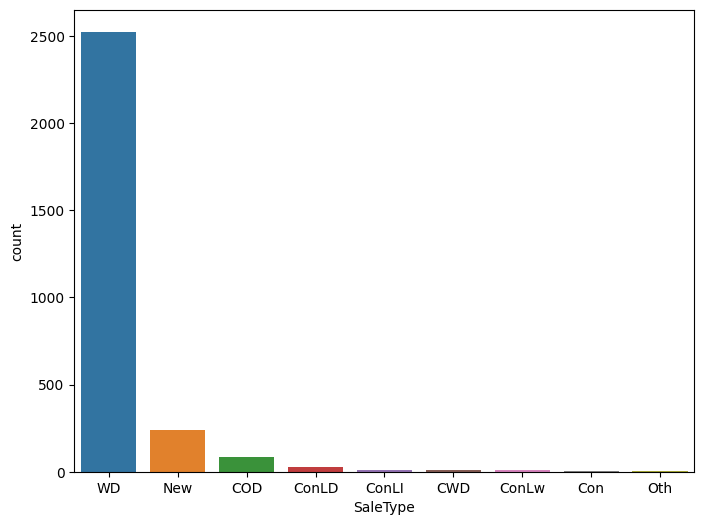

         SaleCondition  Ratio

Normal            2402 82.288

Partial            245  8.393

Abnorml            190  6.509

Family              46  1.576

Alloca              24  0.822

AdjLand             12  0.411


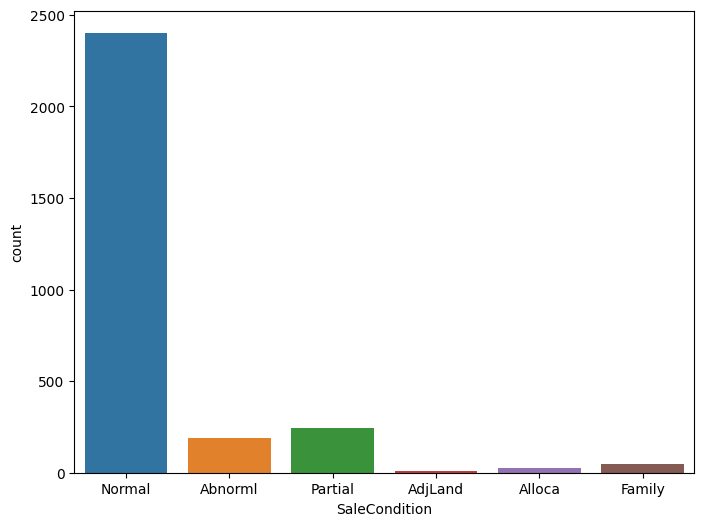

   OverallCond  Ratio

5         1645 56.355

6          531 18.191

7          390 13.361

8          144  4.933

4          101  3.460

3           50  1.713

9           41  1.405

2           10  0.343

1            7  0.240


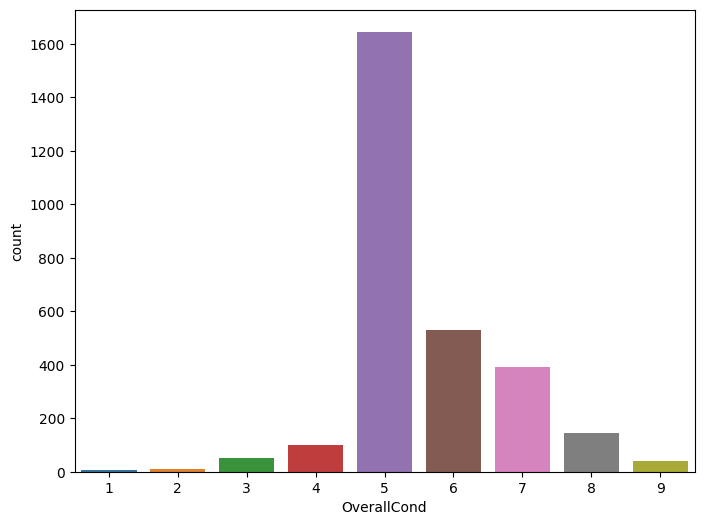

       BsmtFullBath  Ratio

0.000          1705 58.410

1.000          1172 40.151

2.000            38  1.302

3.000             2  0.069


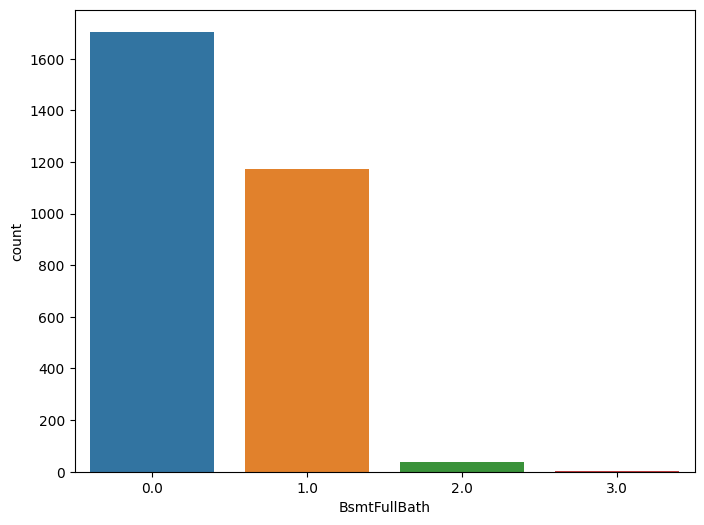

       BsmtHalfBath  Ratio

0.000          2742 93.936

1.000           171  5.858

2.000             4  0.137


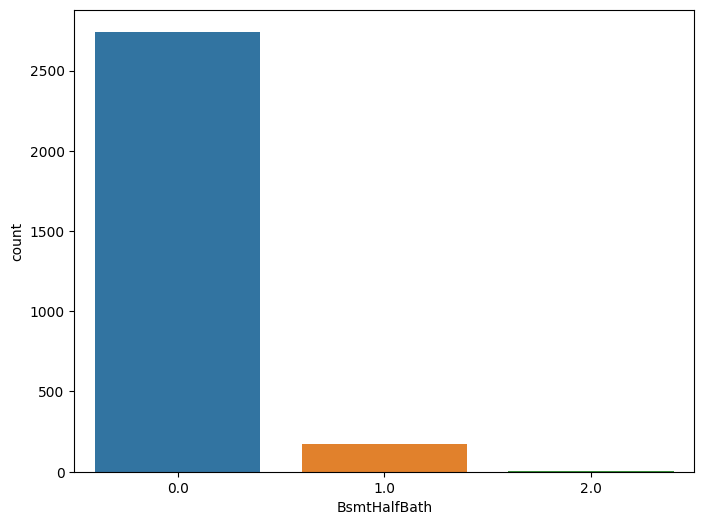

   FullBath  Ratio

2      1530 52.415

1      1309 44.844

3        64  2.193

0        12  0.411

4         4  0.137


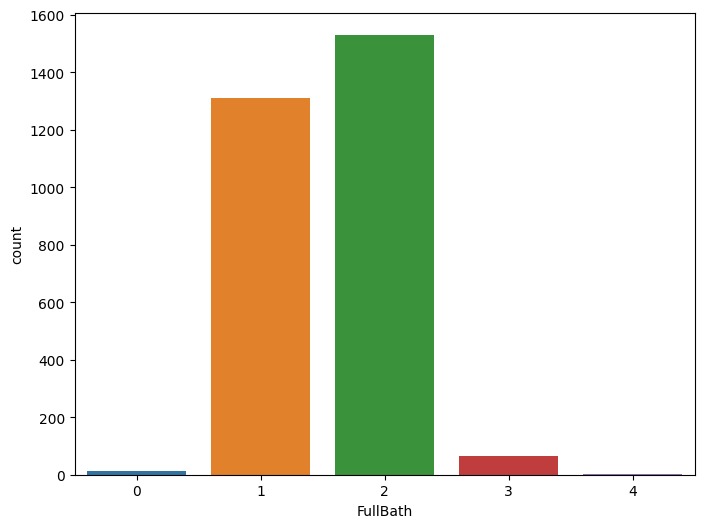

   HalfBath  Ratio

0      1834 62.830

1      1060 36.314

2        25  0.856


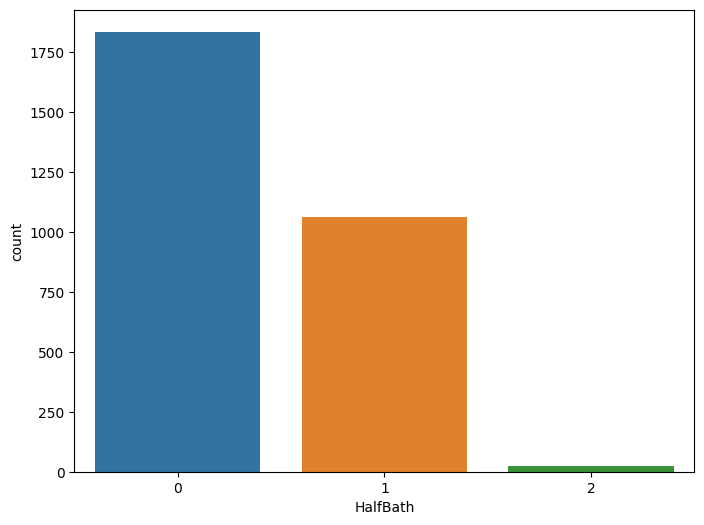

   BedroomAbvGr  Ratio

3          1596 54.676

2           742 25.420

4           400 13.703

1           103  3.529

5            48  1.644

6            21  0.719

0             8  0.274

8             1  0.034


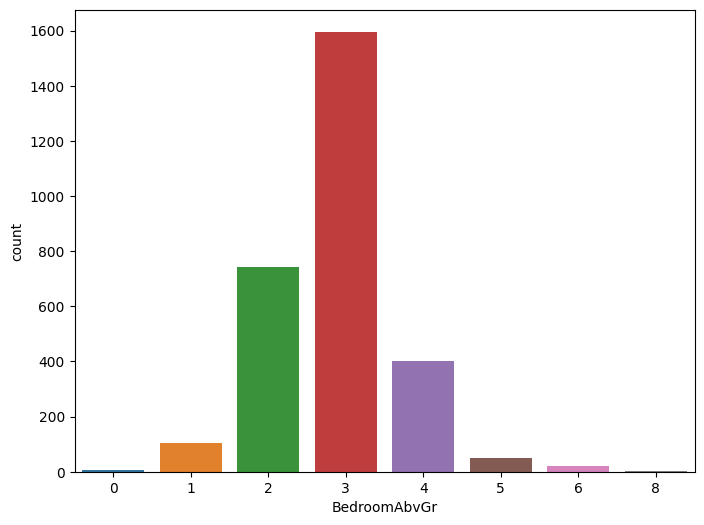

   KitchenAbvGr  Ratio

1          2785 95.409

2           129  4.419

0             3  0.103

3             2  0.069


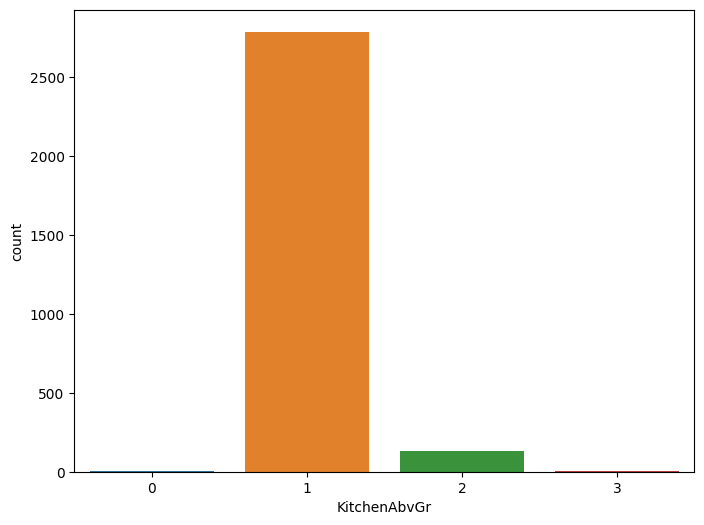

   Fireplaces  Ratio

0        1420 48.647

1        1268 43.440

2         219  7.503

3          11  0.377

4           1  0.034


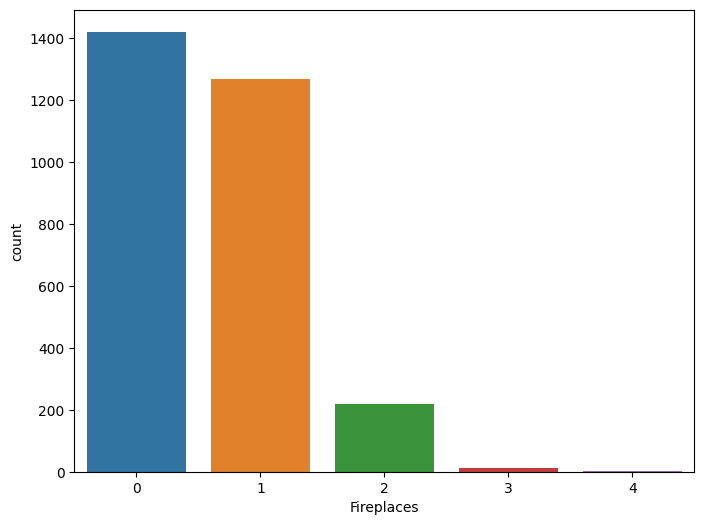

       GarageCars  Ratio

2.000        1594 54.608

1.000         776 26.584

3.000         374 12.813

0.000         157  5.379

4.000          16  0.548

5.000           1  0.034


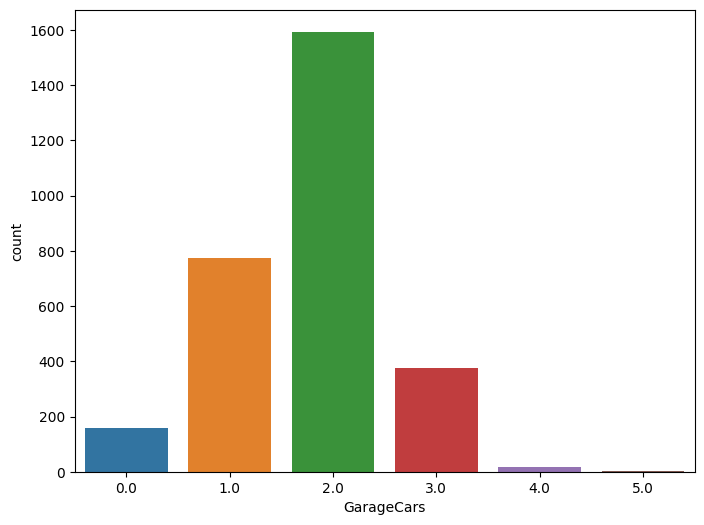

      YrSold  Ratio

2007     692 23.707

2009     647 22.165

2008     622 21.309

2006     619 21.206

2010     339 11.614


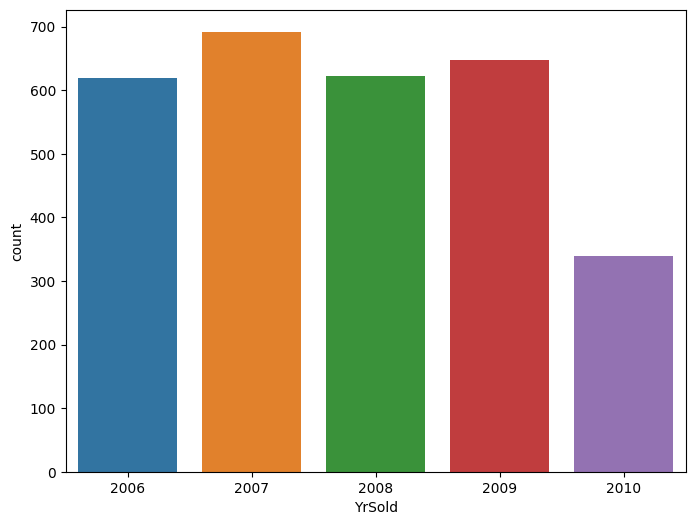

In [ ]:
for col in cat_cols:
    cat_summary(df, col, True)

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

         MSZoning  Ratio

RL           2265 77.595

RM            460 15.759

FV            139  4.762

RH             26  0.891

C (all)        25  0.856


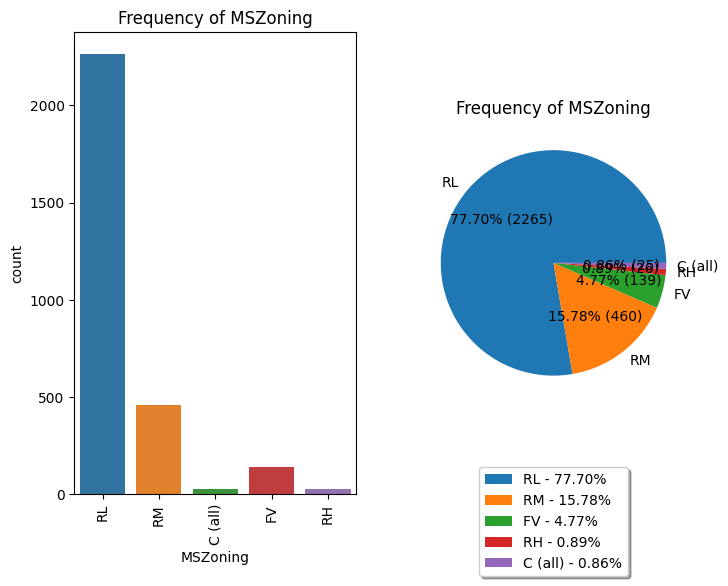

      Street  Ratio

Pave    2907 99.589

Grvl      12  0.411


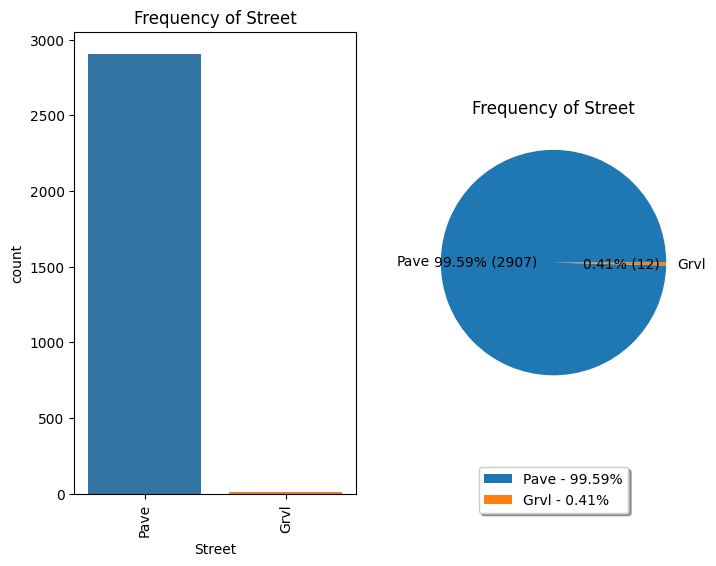

      Alley  Ratio

Grvl    120  4.111

Pave     78  2.672


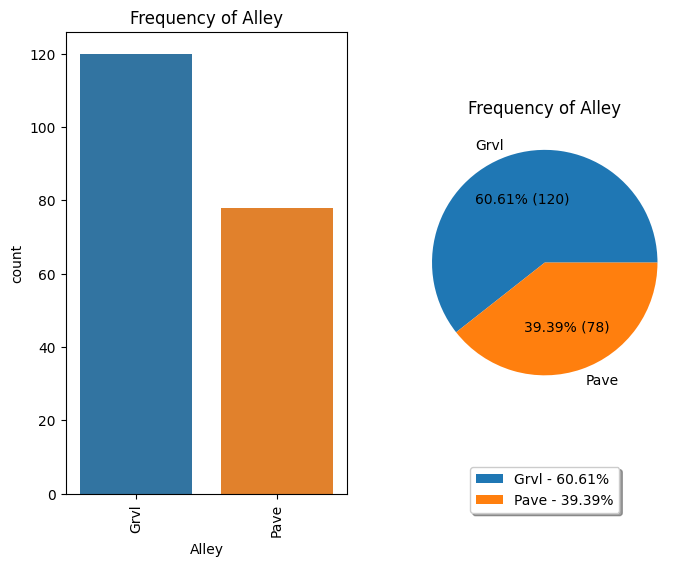

     LotShape  Ratio

Reg      1859 63.686

IR1       968 33.162

IR2        76  2.604

IR3        16  0.548


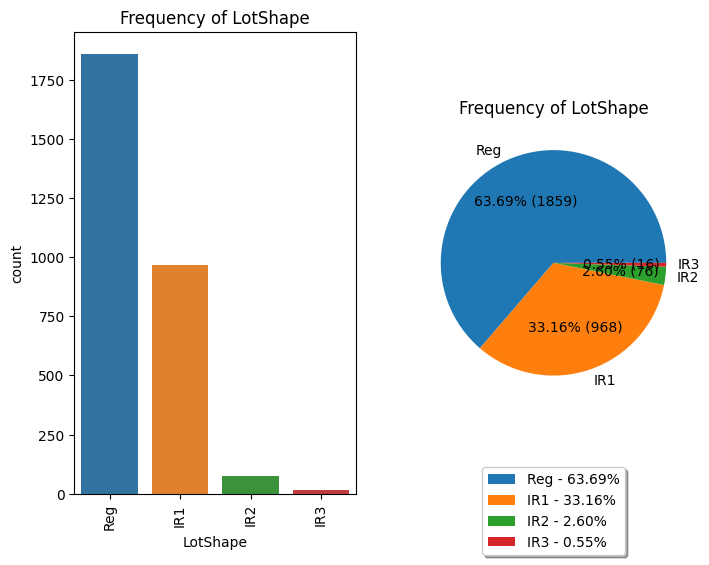

     LandContour  Ratio

Lvl         2622 89.825

HLS          120  4.111

Bnk          117  4.008

Low           60  2.055


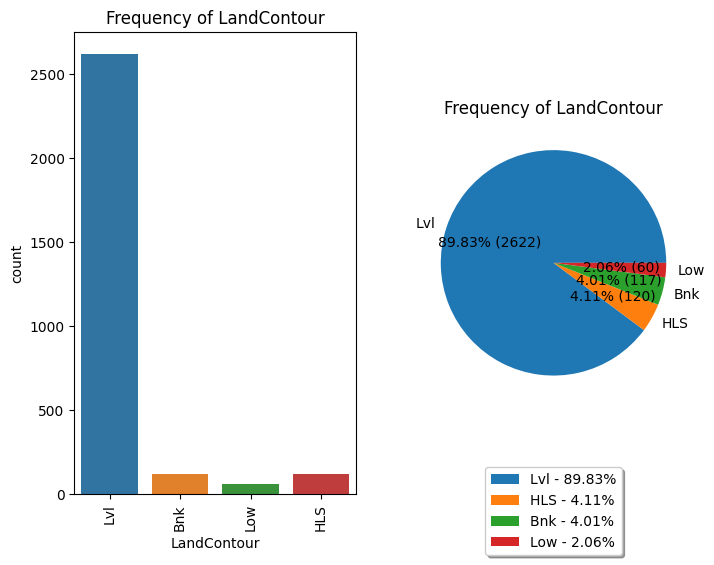

        Utilities  Ratio

AllPub       2916 99.897

NoSeWa          1  0.034


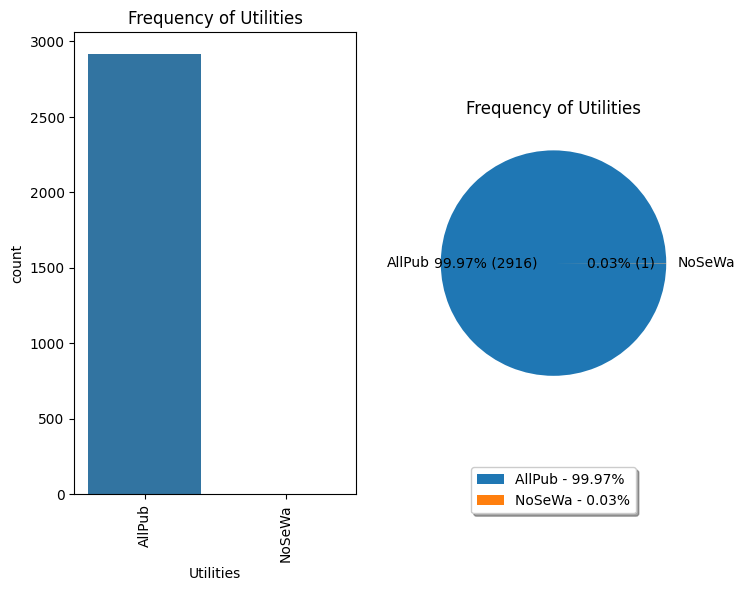

         LotConfig  Ratio

Inside        2133 73.073

Corner         511 17.506

CulDSac        176  6.029

FR2             85  2.912

FR3             14  0.480


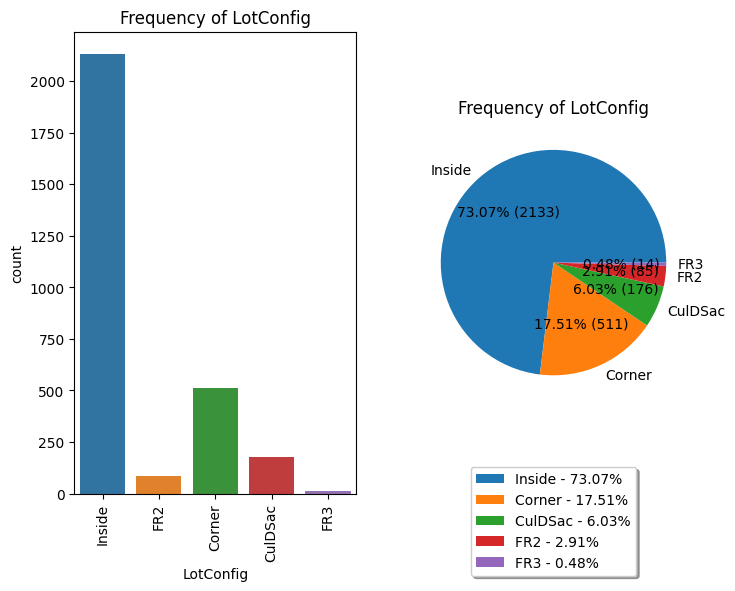

     LandSlope  Ratio

Gtl       2778 95.170

Mod        125  4.282

Sev         16  0.548


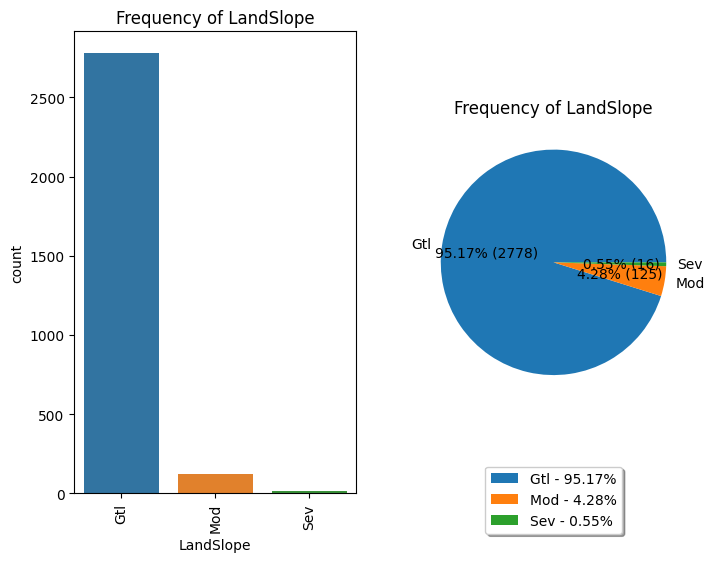

        Condition1  Ratio

Norm          2511 86.023

Feedr          164  5.618

Artery          92  3.152

RRAn            50  1.713

PosN            39  1.336

RRAe            28  0.959

PosA            20  0.685

RRNn             9  0.308

RRNe             6  0.206


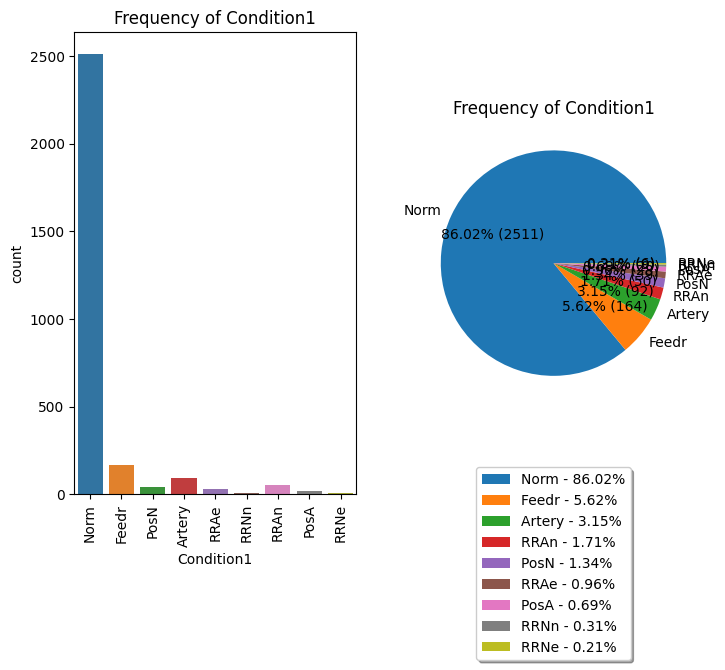

        Condition2  Ratio

Norm          2889 98.972

Feedr           13  0.445

Artery           5  0.171

PosN             4  0.137

PosA             4  0.137

RRNn             2  0.069

RRAn             1  0.034

RRAe             1  0.034


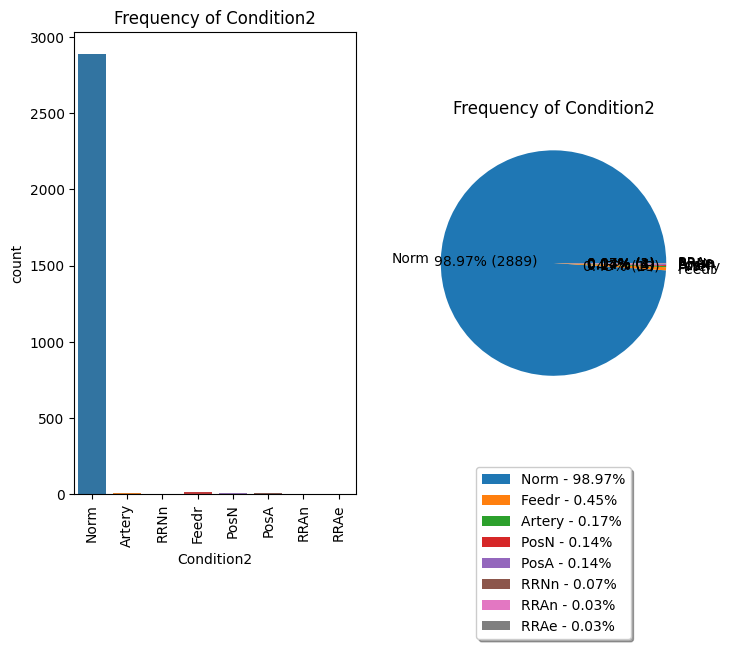

        BldgType  Ratio

1Fam        2425 83.076

TwnhsE       227  7.777

Duplex       109  3.734

Twnhs         96  3.289

2fmCon        62  2.124


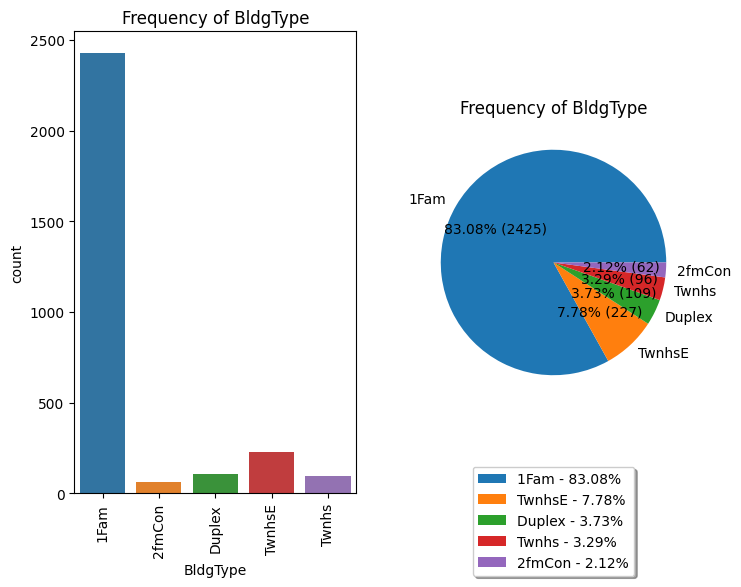

        HouseStyle  Ratio

1Story        1471 50.394

2Story         872 29.873

1.5Fin         314 10.757

SLvl           128  4.385

SFoyer          83  2.843

2.5Unf          24  0.822

1.5Unf          19  0.651

2.5Fin           8  0.274


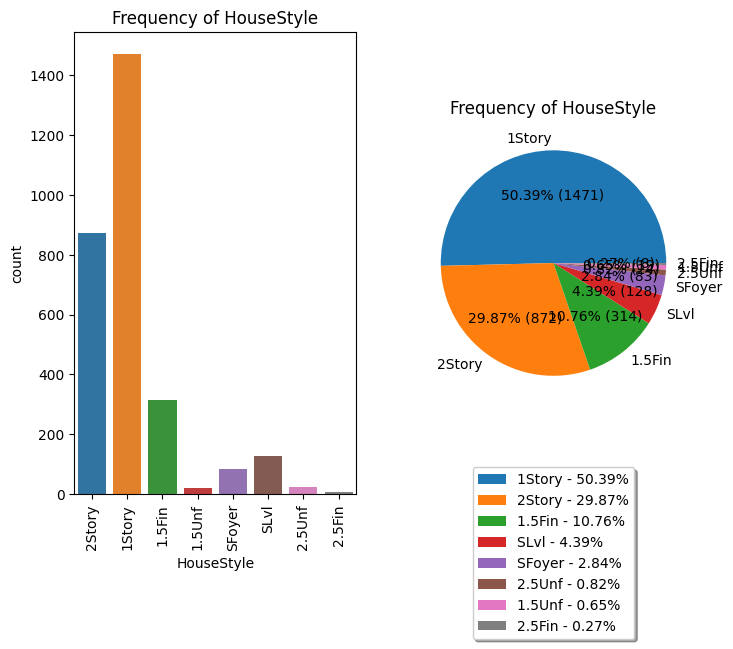

         RoofStyle  Ratio

Gable         2310 79.137

Hip            551 18.876

Gambrel         22  0.754

Flat            20  0.685

Mansard         11  0.377

Shed             5  0.171


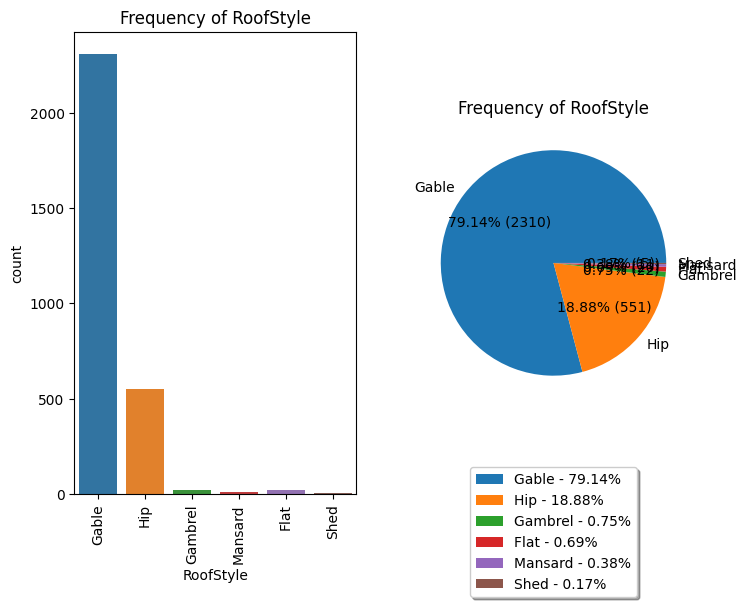

         RoofMatl  Ratio

CompShg      2876 98.527

Tar&Grv        23  0.788

WdShake         9  0.308

WdShngl         7  0.240

Metal           1  0.034

Membran         1  0.034

Roll            1  0.034

ClyTile         1  0.034


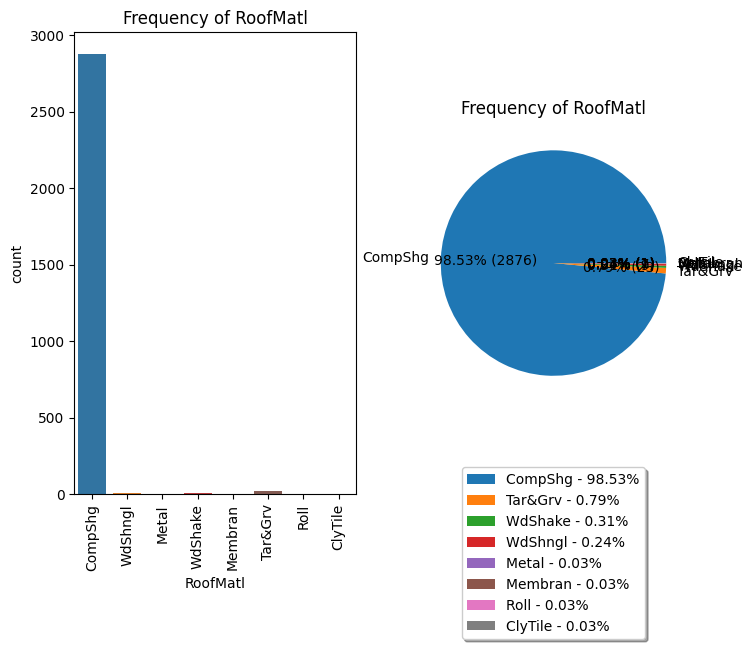

         Exterior1st  Ratio

VinylSd         1025 35.115

MetalSd          450 15.416

HdBoard          442 15.142

Wd Sdng          411 14.080

Plywood          221  7.571

CemntBd          126  4.317

BrkFace           87  2.980

WdShing           56  1.918

AsbShng           44  1.507

Stucco            43  1.473

BrkComm            6  0.206

AsphShn            2  0.069

Stone              2  0.069

CBlock             2  0.069

ImStucc            1  0.034


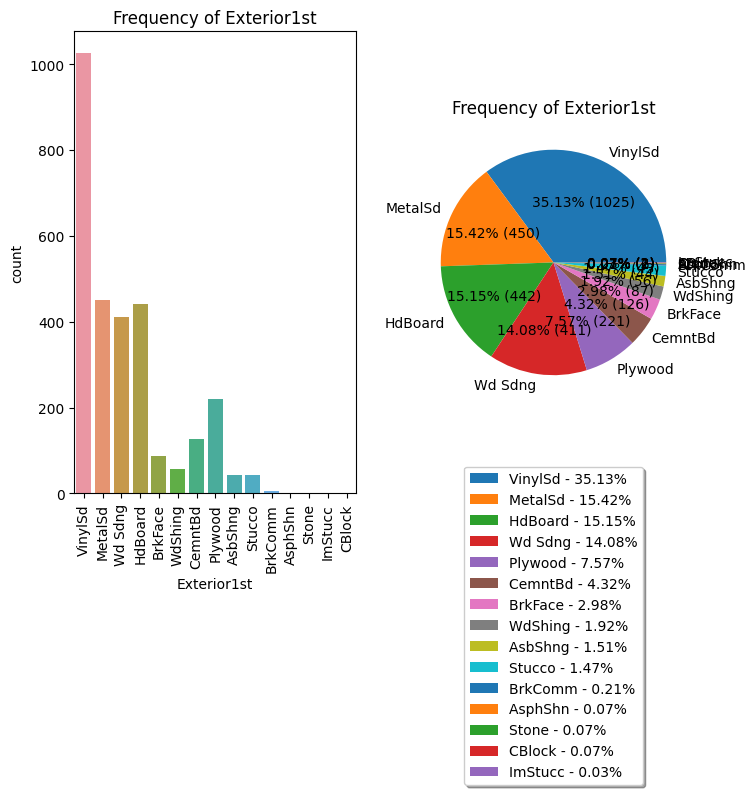

         Exterior2nd  Ratio

VinylSd         1014 34.738

MetalSd          447 15.313

HdBoard          406 13.909

Wd Sdng          391 13.395

Plywood          270  9.250

CmentBd          126  4.317

Wd Shng           81  2.775

BrkFace           47  1.610

Stucco            47  1.610

AsbShng           38  1.302

Brk Cmn           22  0.754

ImStucc           15  0.514

Stone              6  0.206

AsphShn            4  0.137

CBlock             3  0.103

Other              1  0.034


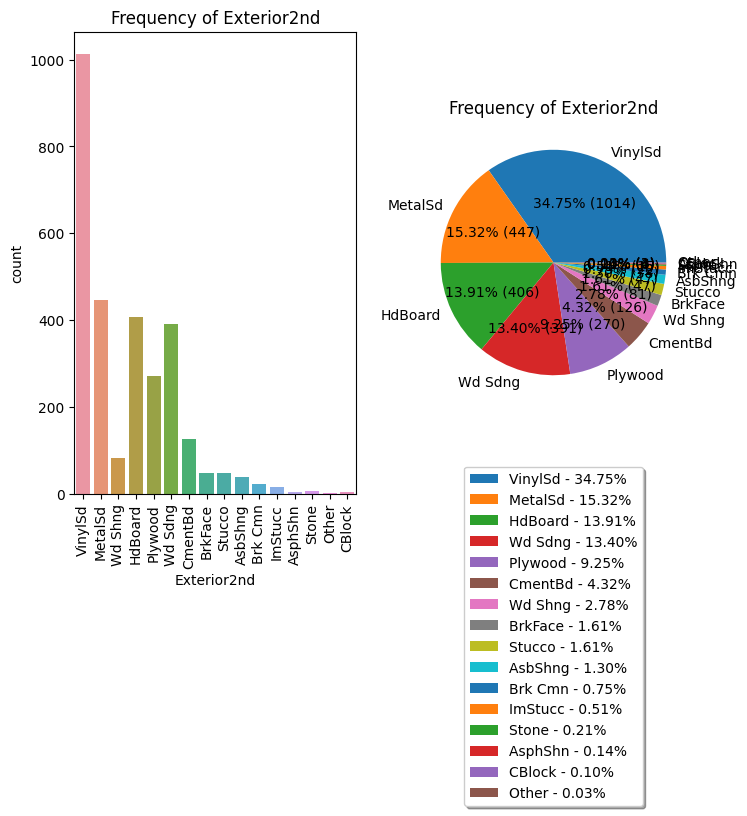

         MasVnrType  Ratio

None           1742 59.678

BrkFace         879 30.113

Stone           249  8.530

BrkCmn           25  0.856


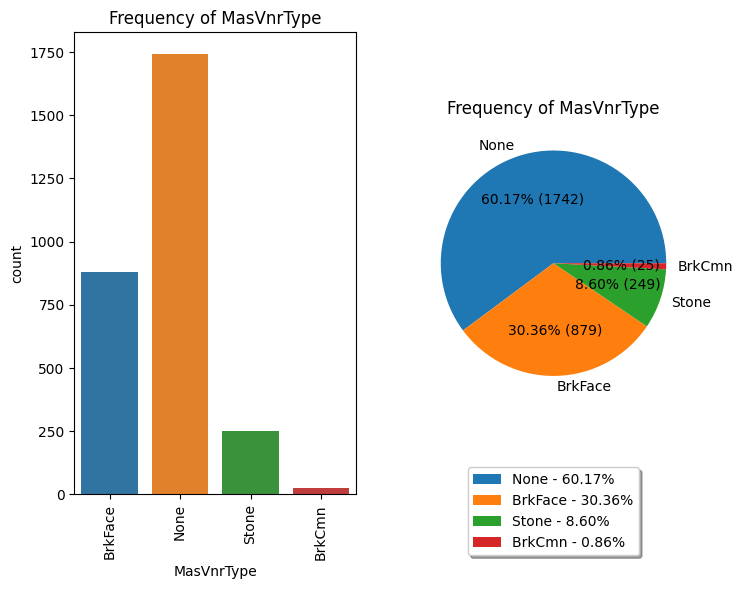

    ExterQual  Ratio

TA       1798 61.596

Gd        979 33.539

Ex        107  3.666

Fa         35  1.199


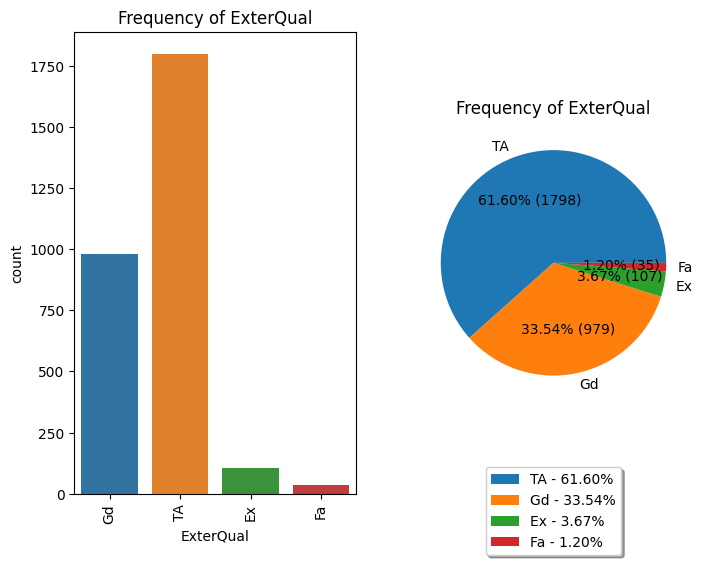

    ExterCond  Ratio

TA       2538 86.948

Gd        299 10.243

Fa         67  2.295

Ex         12  0.411

Po          3  0.103


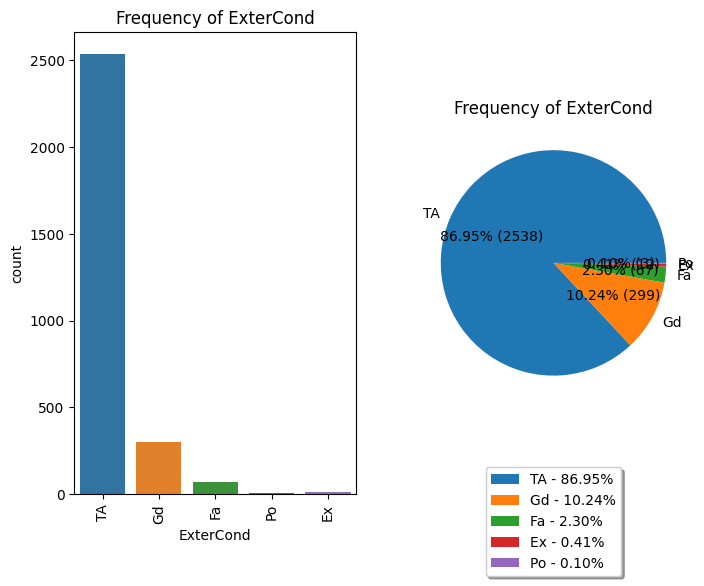

        Foundation  Ratio

PConc         1308 44.810

CBlock        1235 42.309

BrkTil         311 10.654

Slab            49  1.679

Stone           11  0.377

Wood             5  0.171


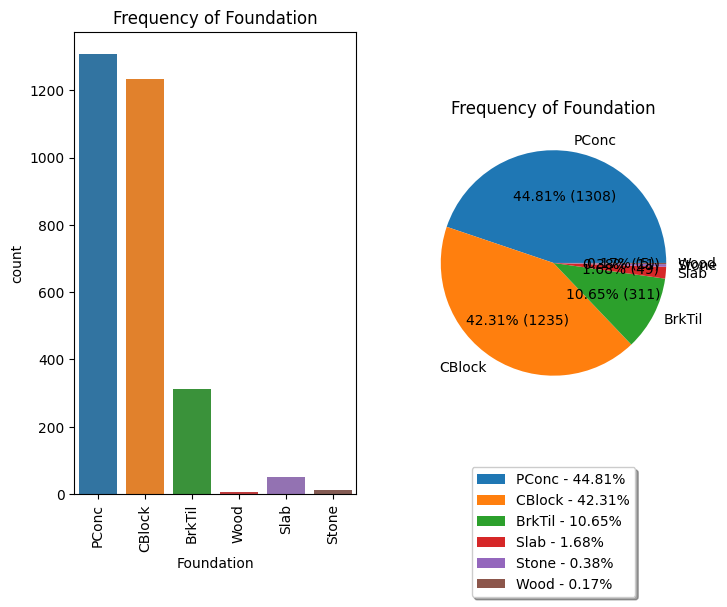

    BsmtQual  Ratio

TA      1283 43.953

Gd      1209 41.418

Ex       258  8.839

Fa        88  3.015


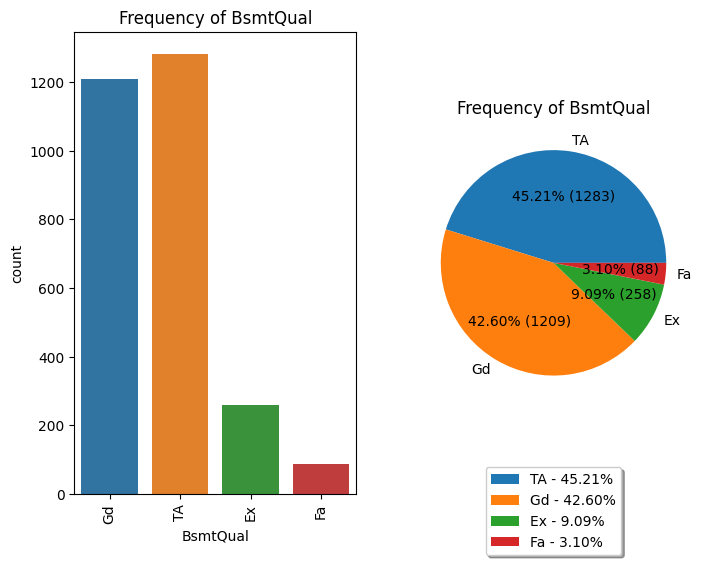

    BsmtCond  Ratio

TA      2606 89.277

Gd       122  4.180

Fa       104  3.563

Po         5  0.171


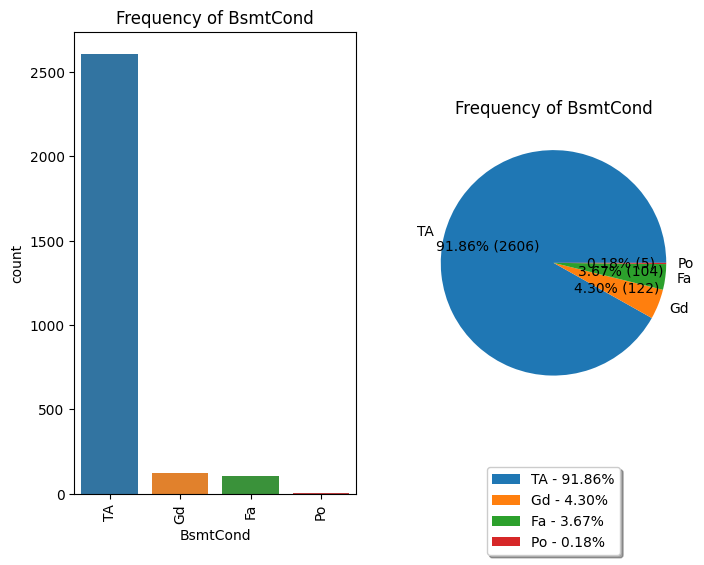

    BsmtExposure  Ratio

No          1904 65.228

Av           418 14.320

Gd           276  9.455

Mn           239  8.188


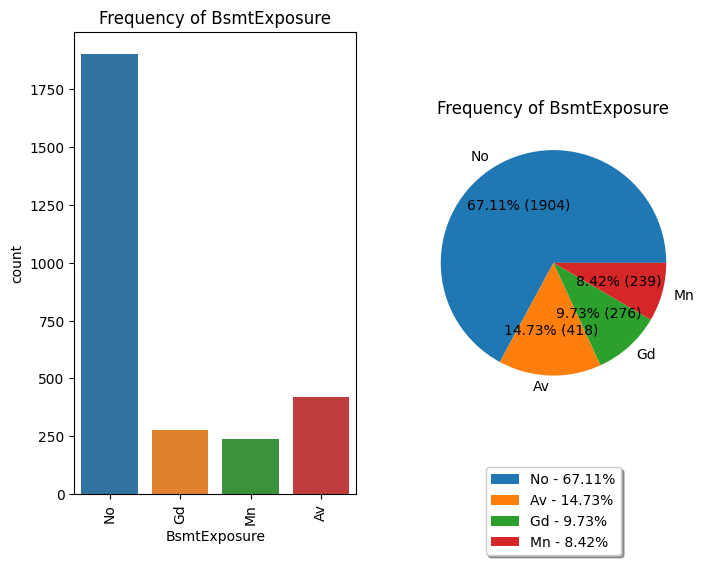

     BsmtFinType1  Ratio

Unf           851 29.154

GLQ           849 29.085

ALQ           429 14.697

Rec           288  9.866

BLQ           269  9.215

LwQ           154  5.276


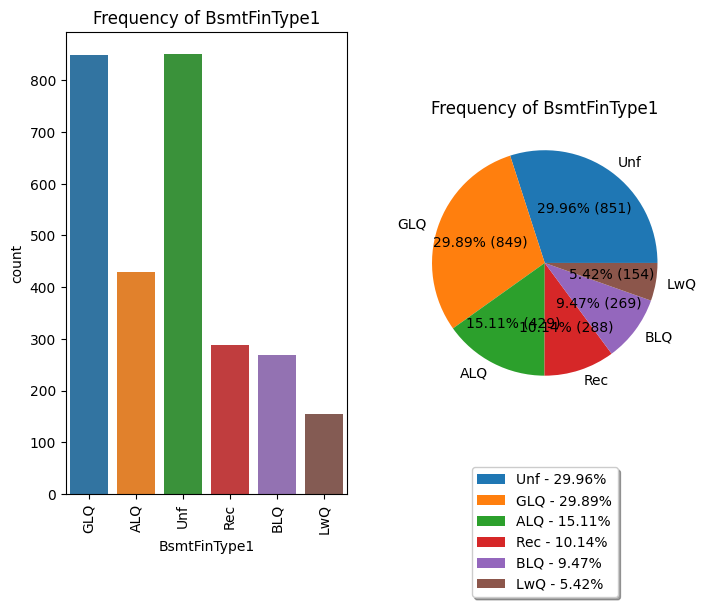

     BsmtFinType2  Ratio

Unf          2493 85.406

Rec           105  3.597

LwQ            87  2.980

BLQ            68  2.330

ALQ            52  1.781

GLQ            34  1.165


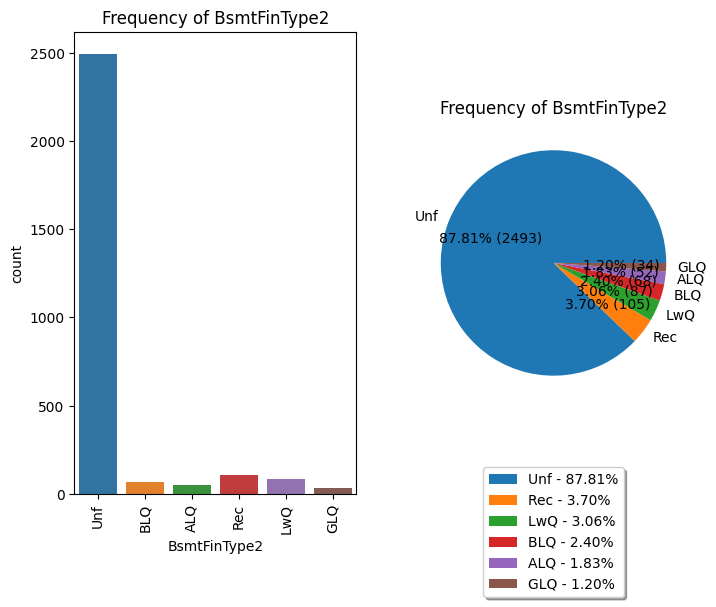

       Heating  Ratio

GasA      2874 98.458

GasW        27  0.925

Grav         9  0.308

Wall         6  0.206

OthW         2  0.069

Floor        1  0.034


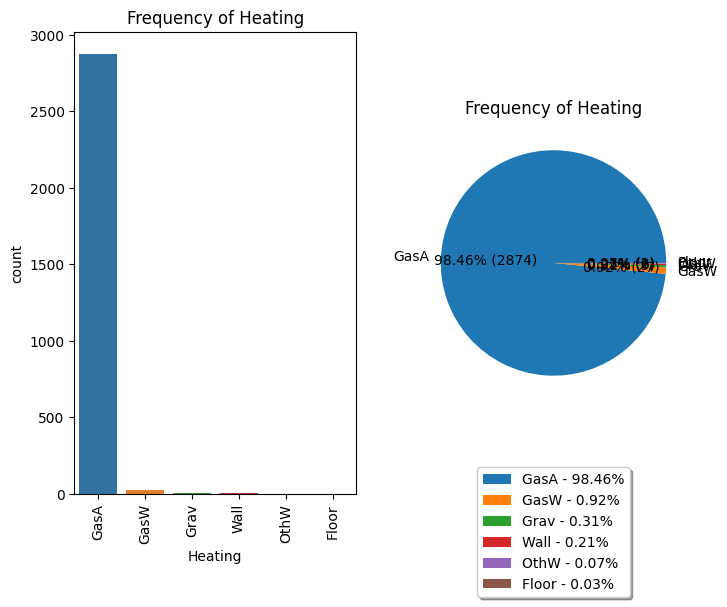

    HeatingQC  Ratio

Ex       1493 51.148

TA        857 29.359

Gd        474 16.238

Fa         92  3.152

Po          3  0.103


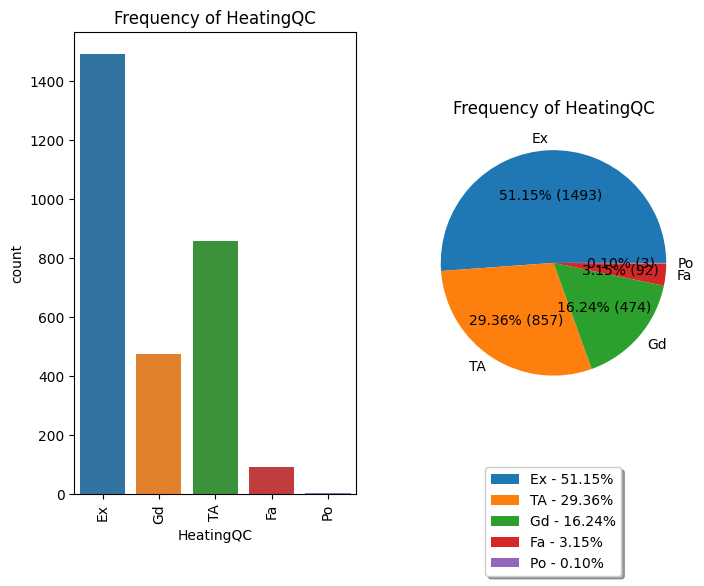

   CentralAir  Ratio

Y        2723 93.285

N         196  6.715


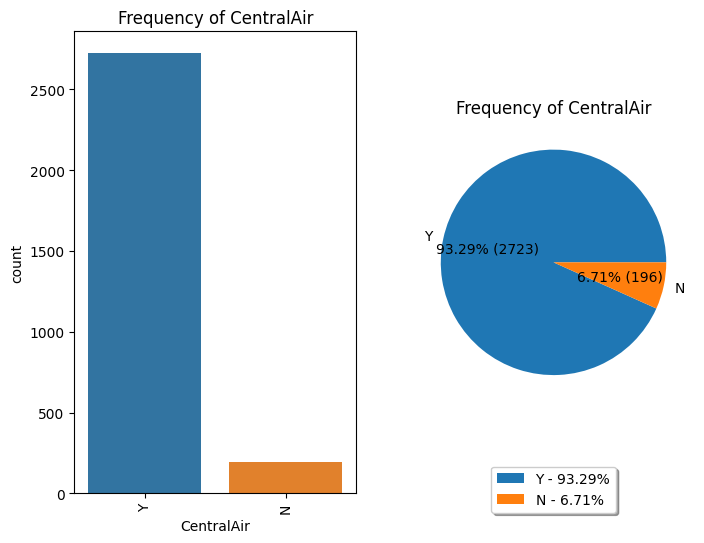

       Electrical  Ratio

SBrkr        2671 91.504

FuseA         188  6.441

FuseF          50  1.713

FuseP           8  0.274

Mix             1  0.034


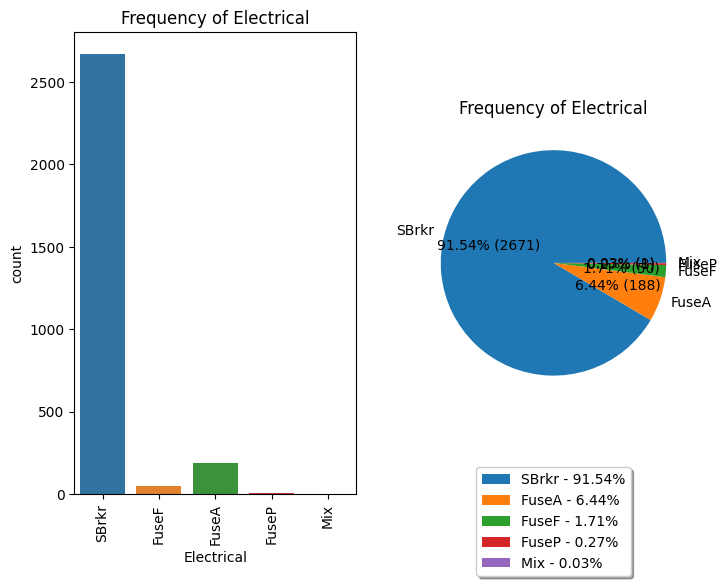

    KitchenQual  Ratio

TA         1492 51.113

Gd         1151 39.431

Ex          205  7.023

Fa           70  2.398


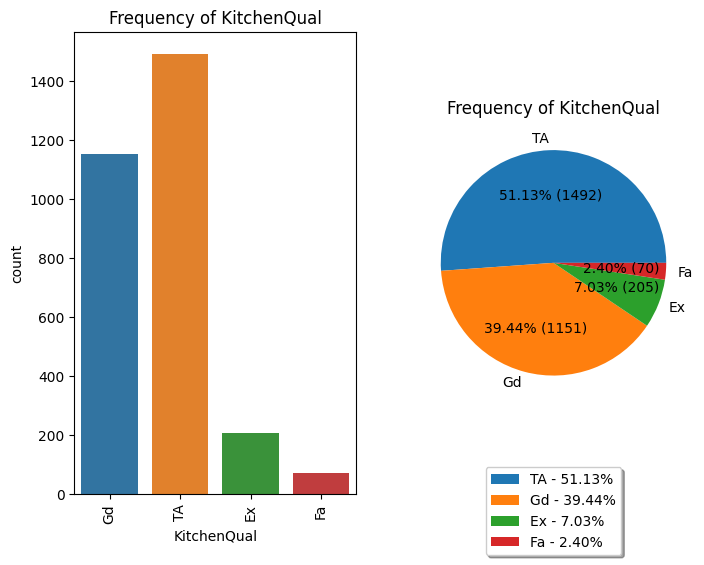

      Functional  Ratio

Typ         2717 93.080

Min2          70  2.398

Min1          65  2.227

Mod           35  1.199

Maj1          19  0.651

Maj2           9  0.308

Sev            2  0.069


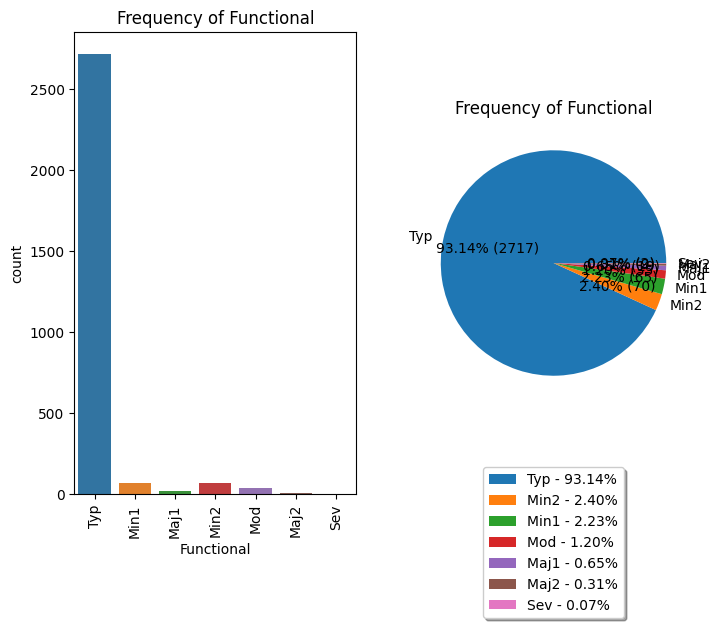

    FireplaceQu  Ratio

Gd          744 25.488

TA          592 20.281

Fa           74  2.535

Po           46  1.576

Ex           43  1.473


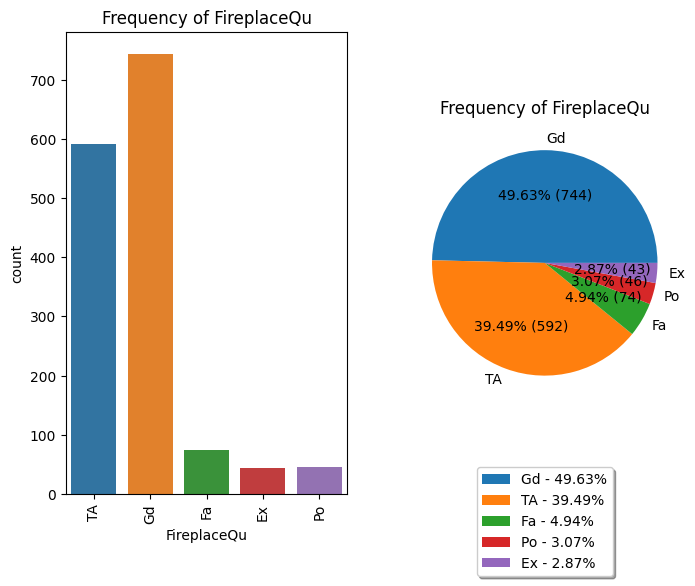

         GarageType  Ratio

Attchd         1723 59.027

Detchd          779 26.687

BuiltIn         186  6.372

Basment          36  1.233

2Types           23  0.788

CarPort          15  0.514


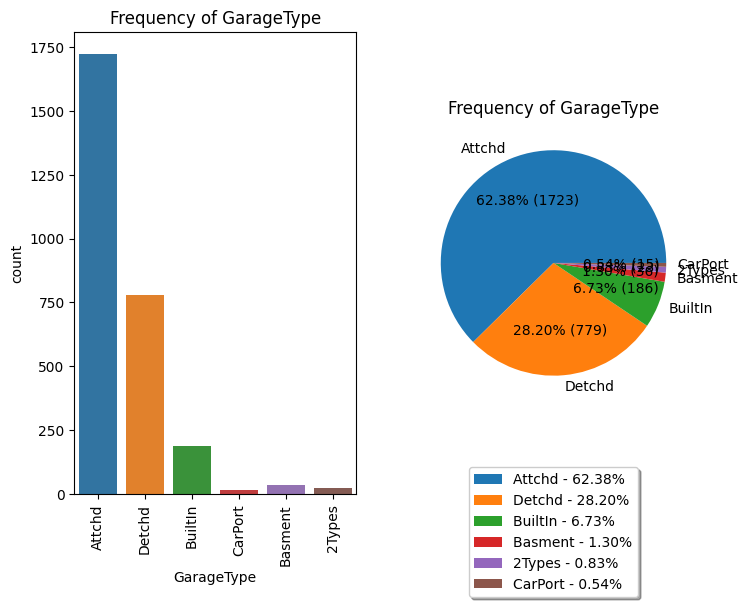

     GarageFinish  Ratio

Unf          1230 42.138

RFn           811 27.783

Fin           719 24.632


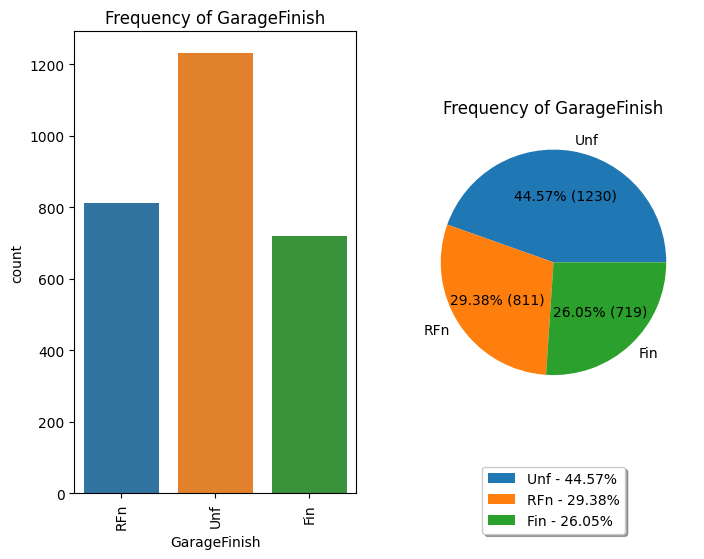

    GarageQual  Ratio

TA        2604 89.209

Fa         124  4.248

Gd          24  0.822

Po           5  0.171

Ex           3  0.103


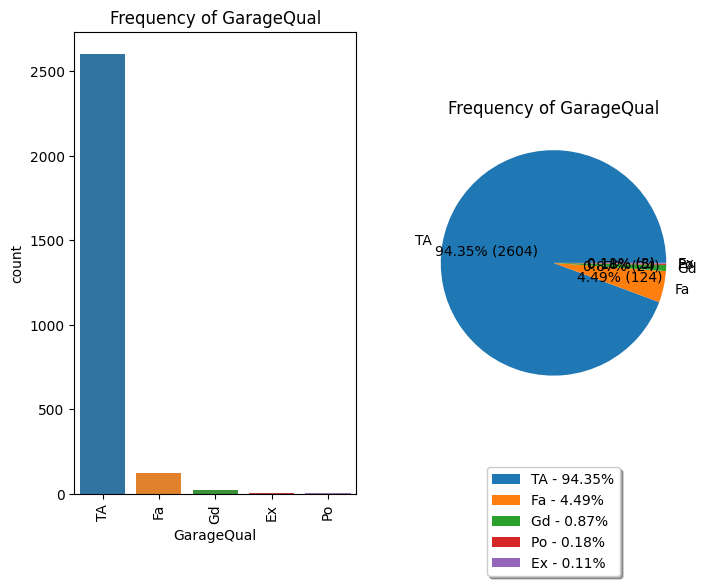

    GarageCond  Ratio

TA        2654 90.922

Fa          74  2.535

Gd          15  0.514

Po          14  0.480

Ex           3  0.103


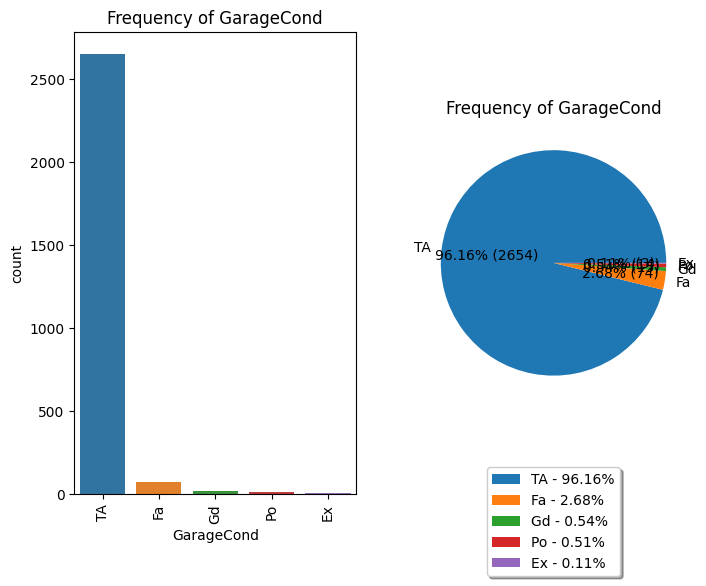

   PavedDrive  Ratio

Y        2641 90.476

N         216  7.400

P          62  2.124


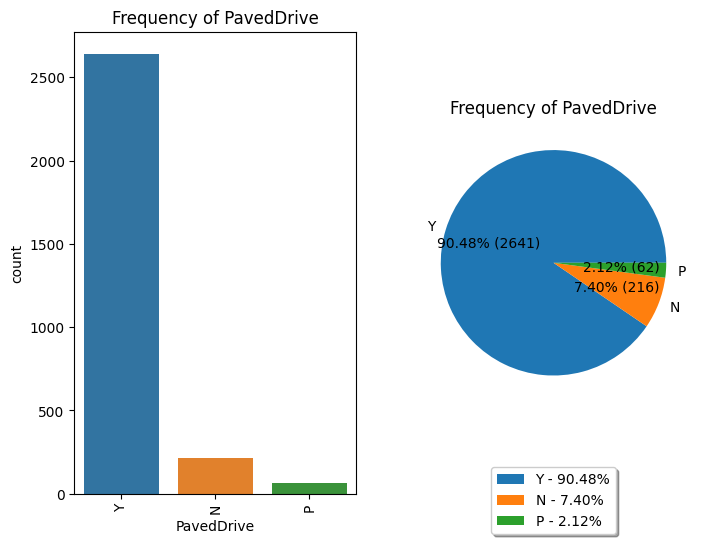

    PoolQC  Ratio

Ex       4  0.137

Gd       4  0.137

Fa       2  0.069


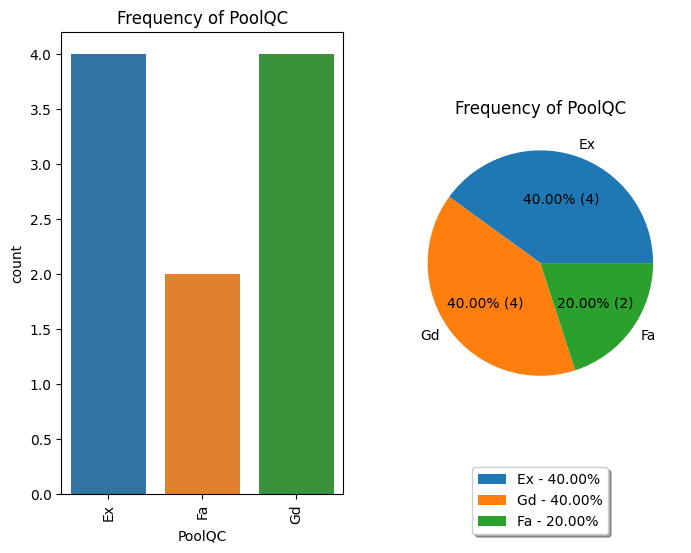

       Fence  Ratio

MnPrv    329 11.271

GdPrv    118  4.042

GdWo     112  3.837

MnWw      12  0.411


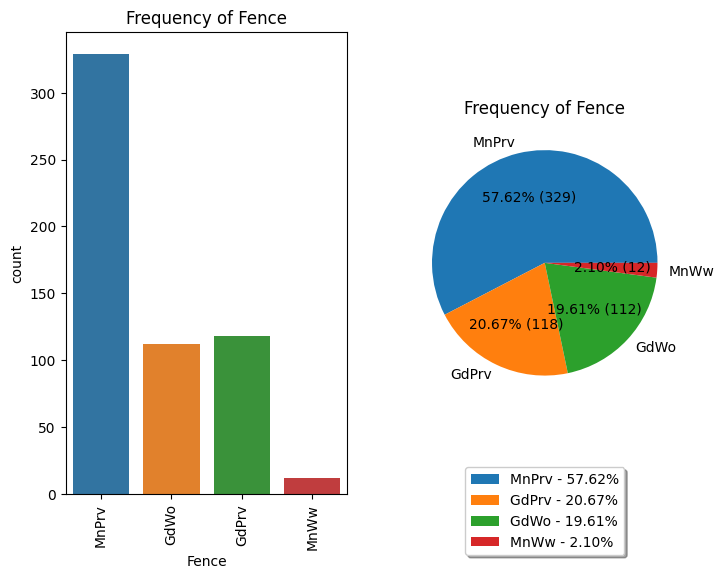

      MiscFeature  Ratio

Shed           95  3.255

Gar2            5  0.171

Othr            4  0.137

TenC            1  0.034


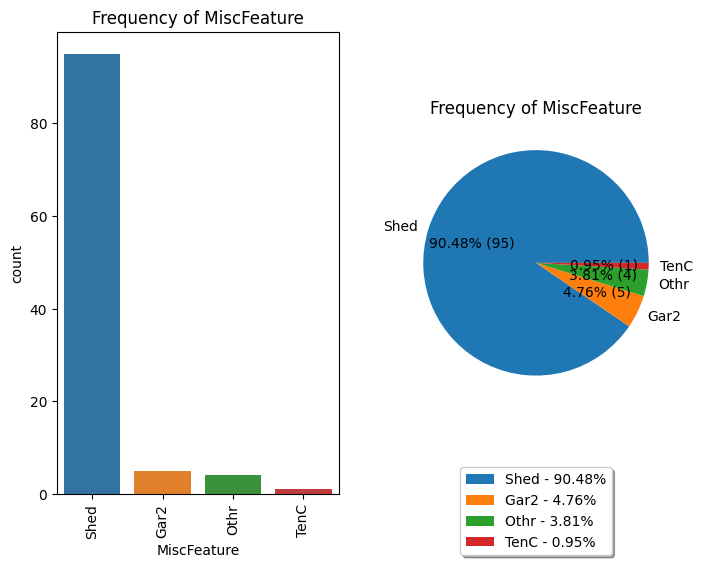

       SaleType  Ratio

WD         2525 86.502

New         239  8.188

COD          87  2.980

ConLD        26  0.891

CWD          12  0.411

ConLI         9  0.308

ConLw         8  0.274

Oth           7  0.240

Con           5  0.171


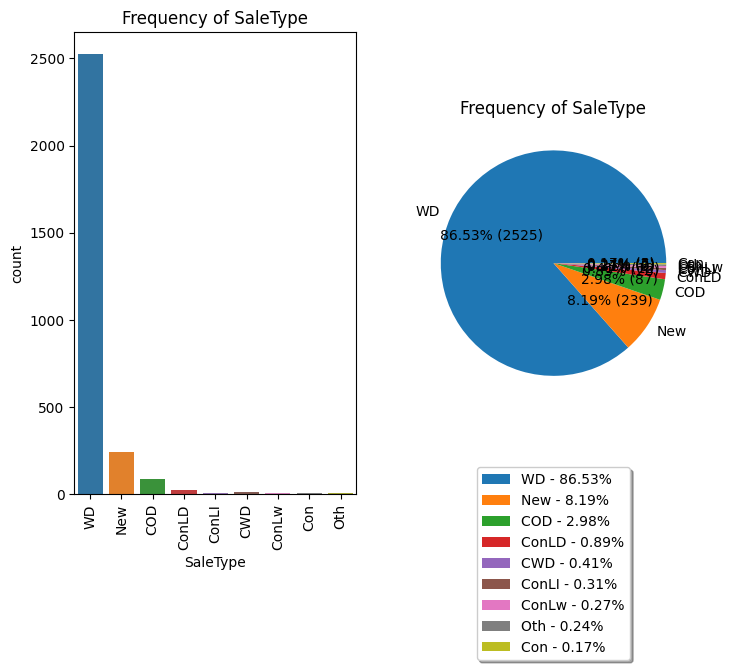

         SaleCondition  Ratio

Normal            2402 82.288

Partial            245  8.393

Abnorml            190  6.509

Family              46  1.576

Alloca              24  0.822

AdjLand             12  0.411


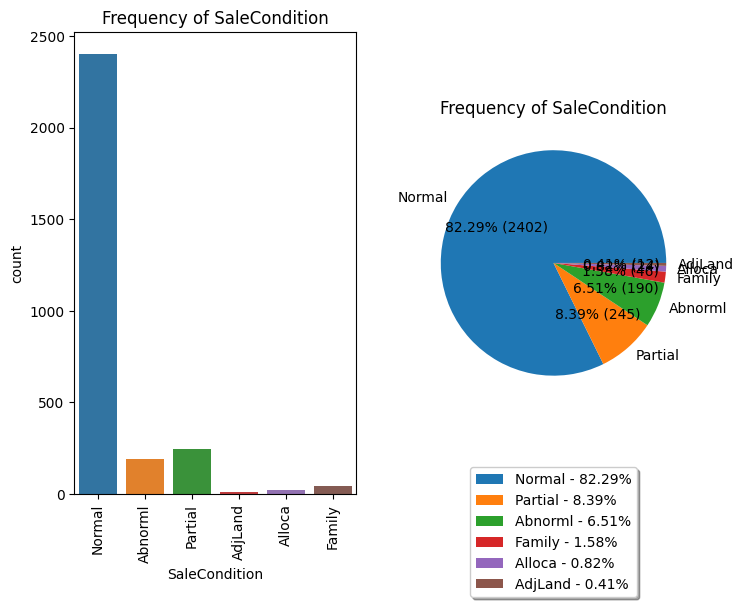

   OverallCond  Ratio

5         1645 56.355

6          531 18.191

7          390 13.361

8          144  4.933

4          101  3.460

3           50  1.713

9           41  1.405

2           10  0.343

1            7  0.240


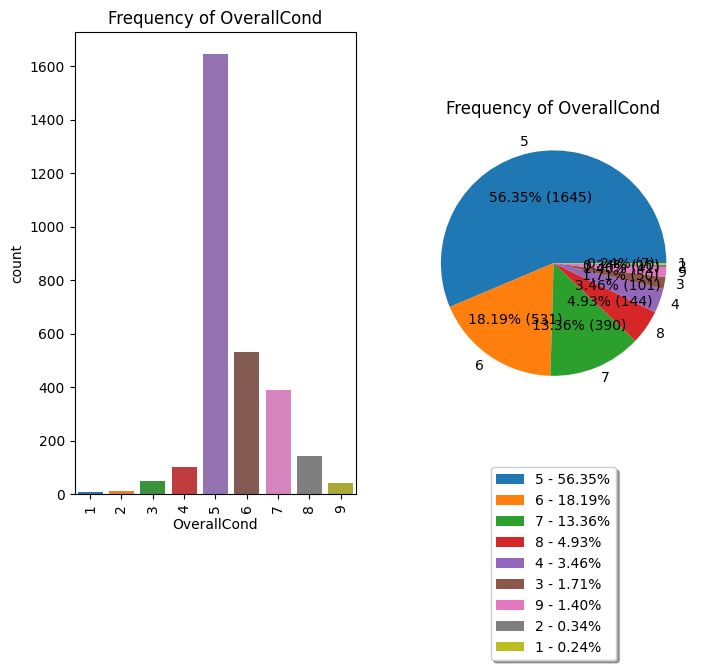

       BsmtFullBath  Ratio

0.000          1705 58.410

1.000          1172 40.151

2.000            38  1.302

3.000             2  0.069


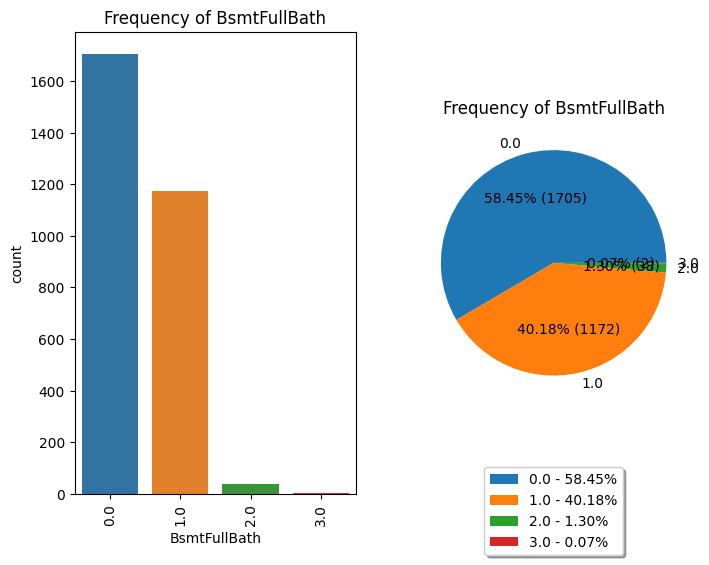

       BsmtHalfBath  Ratio

0.000          2742 93.936

1.000           171  5.858

2.000             4  0.137


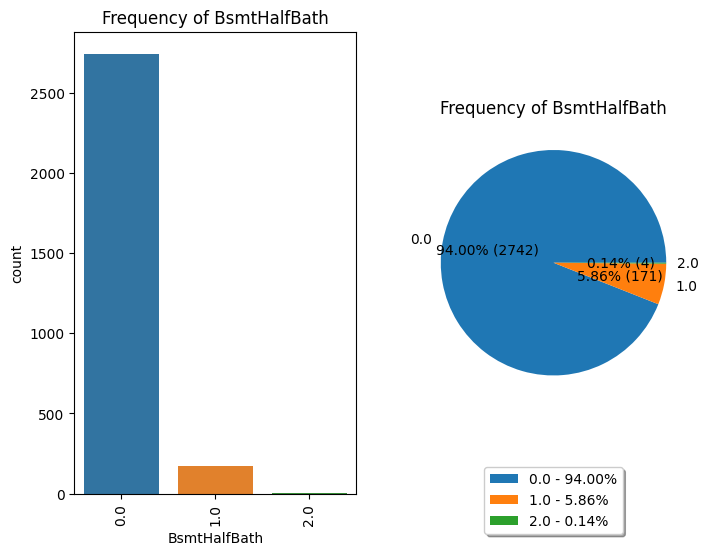

   FullBath  Ratio

2      1530 52.415

1      1309 44.844

3        64  2.193

0        12  0.411

4         4  0.137


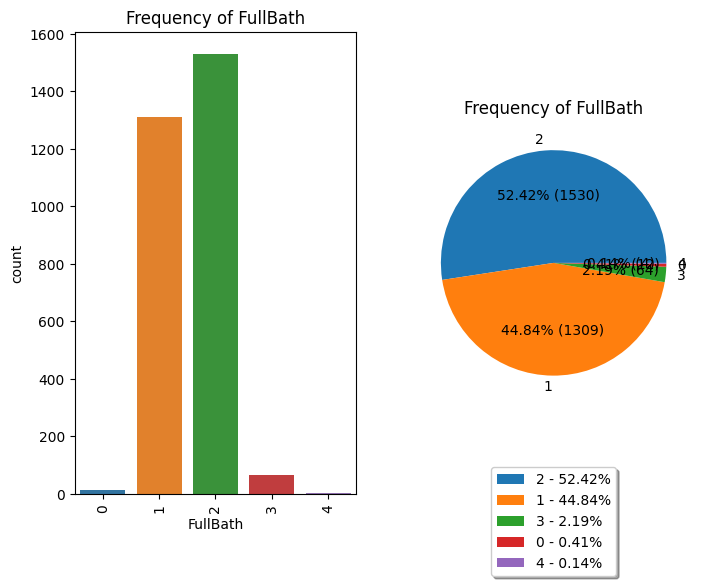

   HalfBath  Ratio

0      1834 62.830

1      1060 36.314

2        25  0.856


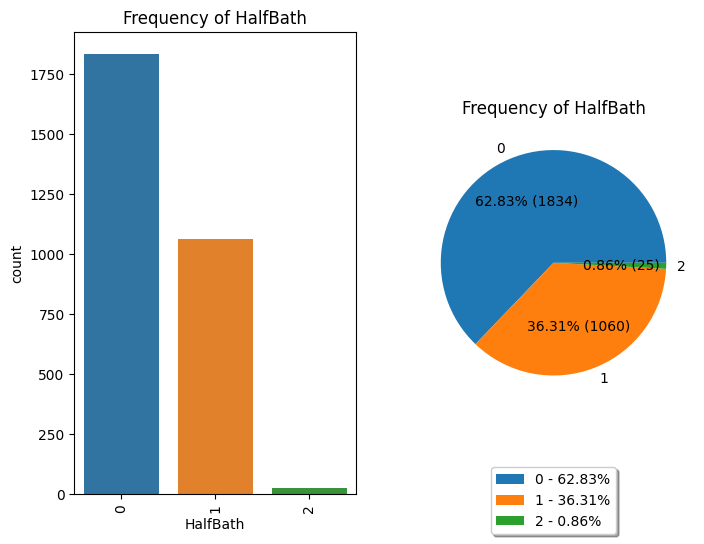

   BedroomAbvGr  Ratio

3          1596 54.676

2           742 25.420

4           400 13.703

1           103  3.529

5            48  1.644

6            21  0.719

0             8  0.274

8             1  0.034


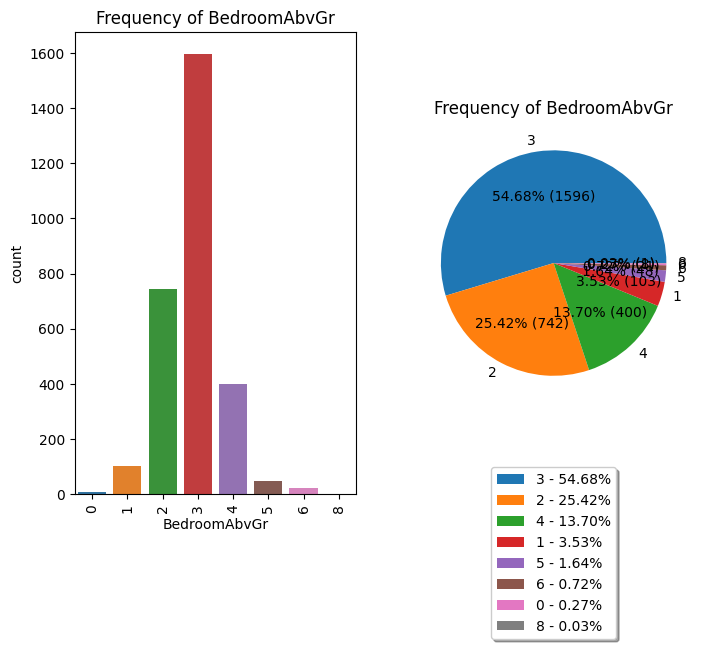

   KitchenAbvGr  Ratio

1          2785 95.409

2           129  4.419

0             3  0.103

3             2  0.069


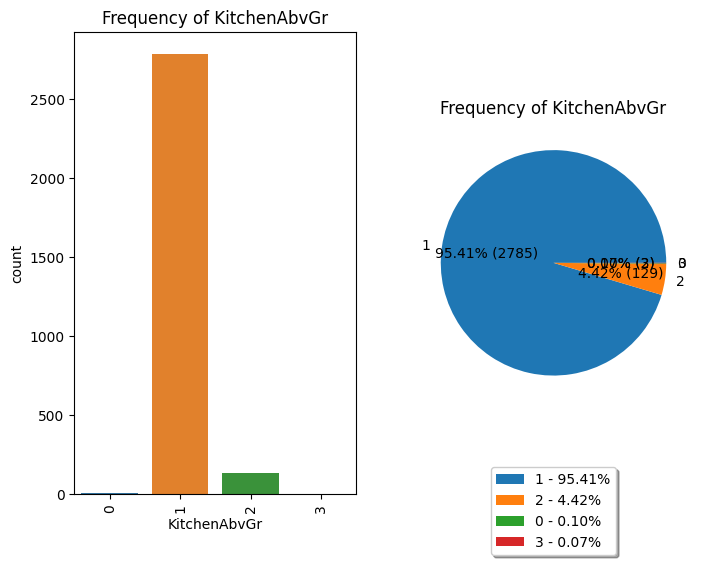

   Fireplaces  Ratio

0        1420 48.647

1        1268 43.440

2         219  7.503

3          11  0.377

4           1  0.034


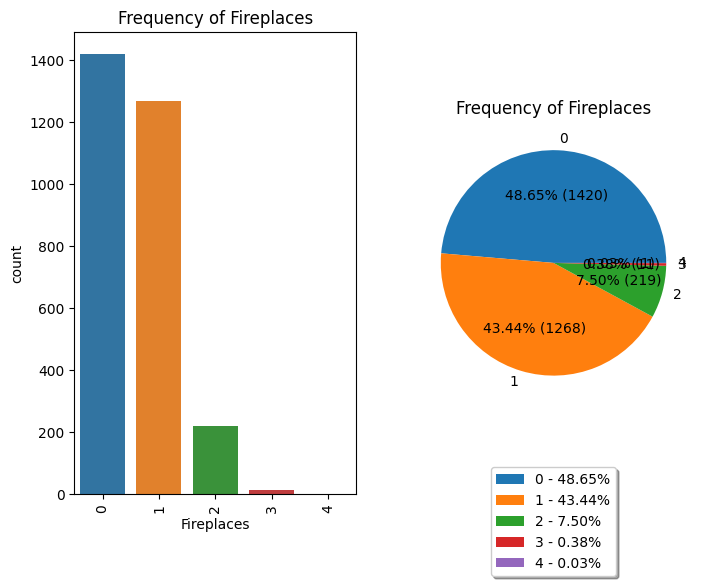

       GarageCars  Ratio

2.000        1594 54.608

1.000         776 26.584

3.000         374 12.813

0.000         157  5.379

4.000          16  0.548

5.000           1  0.034


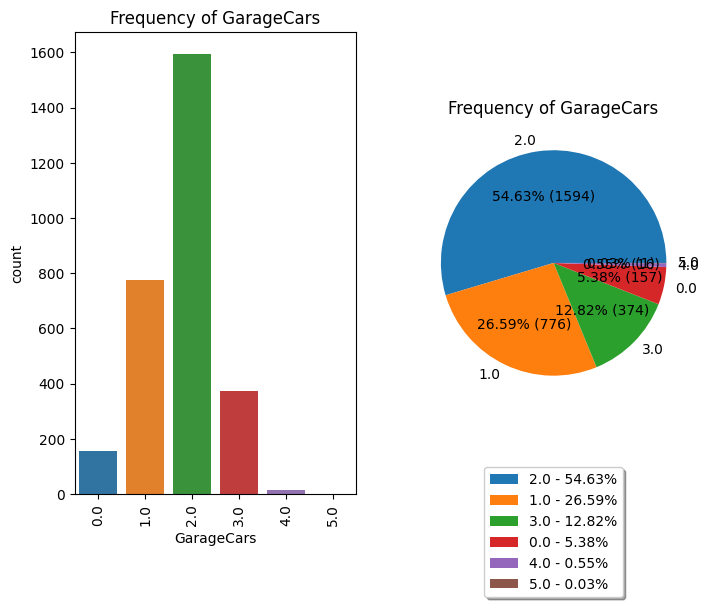

      YrSold  Ratio

2007     692 23.707

2009     647 22.165

2008     622 21.309

2006     619 21.206

2010     339 11.614


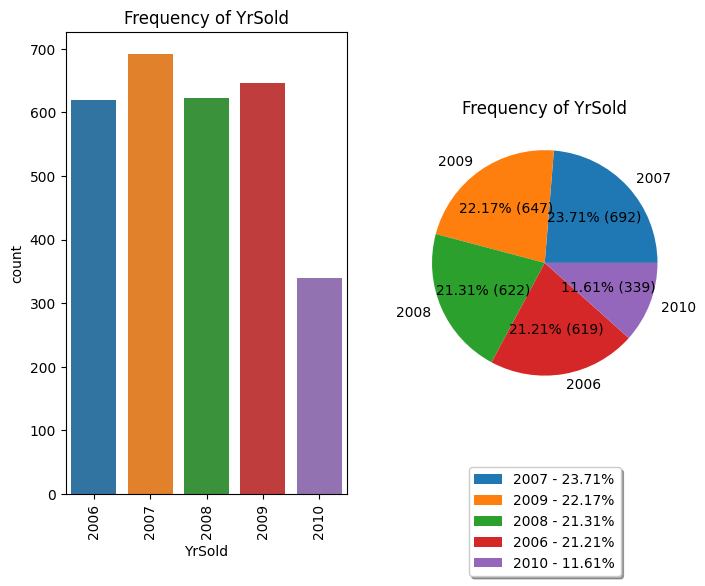

In [ ]:
for col in cat_cols:
    cat_summary(df, col, True)

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

count   2919.000

mean    1460.000

std      842.787

min        1.000

5%       146.900

10%      292.800

20%      584.600

30%      876.400

40%     1168.200

50%     1460.000

60%     1751.800

70%     2043.600

80%     2335.400

90%     2627.200

95%     2773.100

99%     2889.820

max     2919.000

Name: Id, dtype: float64


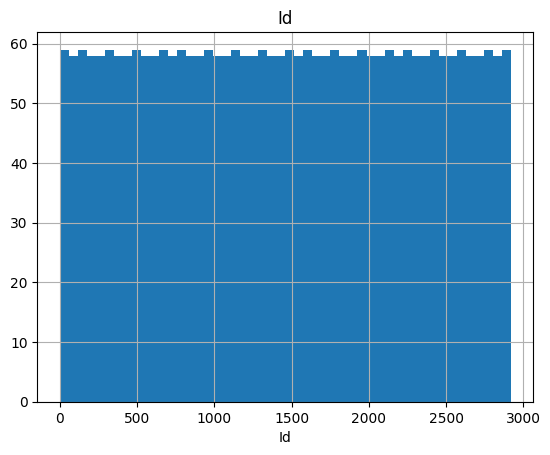

#####################################

count   2919.000

mean      57.138

std       42.518

min       20.000

5%        20.000

10%       20.000

20%       20.000

30%       20.000

40%       30.000

50%       50.000

60%       60.000

70%       60.000

80%       80.000

90%      120.000

95%      160.000

99%      190.000

max      190.000

Name: MSSubClass, dtype: float64


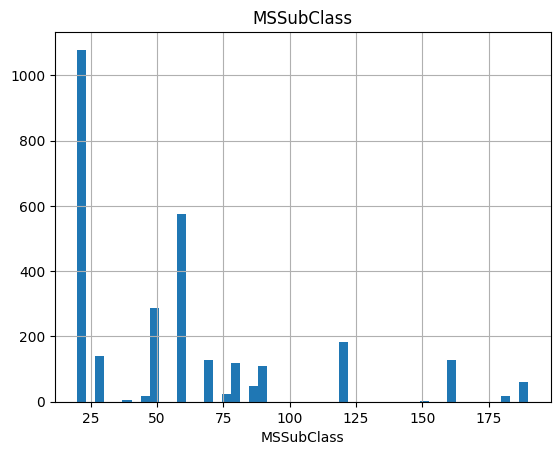

#####################################

count   2433.000

mean      69.306

std       23.345

min       21.000

5%        32.000

10%       43.000

20%       53.000

30%       60.000

40%       63.000

50%       68.000

60%       73.000

70%       78.000

80%       84.000

90%       95.000

95%      107.000

99%      135.680

max      313.000

Name: LotFrontage, dtype: float64


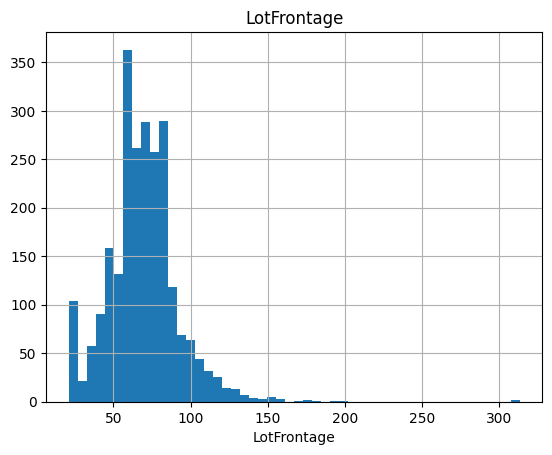

#####################################

count     2919.000

mean     10168.114

std       7886.996

min       1300.000

5%        3182.000

10%       4922.400

20%       7007.600

30%       7960.400

40%       8741.000

50%       9453.000

60%      10151.600

70%      11001.200

80%      12203.800

90%      14300.600

95%      17142.900

99%      33038.640

max     215245.000

Name: LotArea, dtype: float64


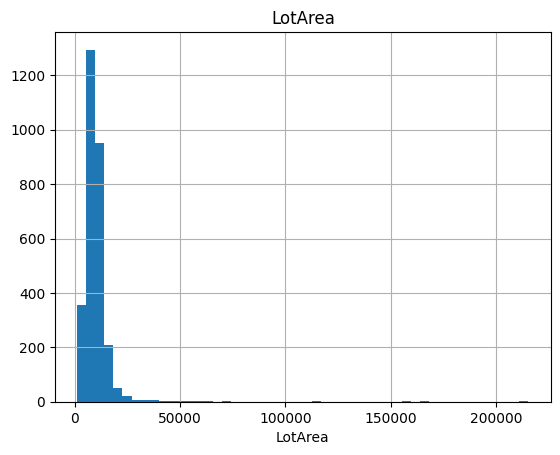

#####################################

count   2919.000

mean       6.089

std        1.410

min        1.000

5%         4.000

10%        5.000

20%        5.000

30%        5.000

40%        6.000

50%        6.000

60%        6.000

70%        7.000

80%        7.000

90%        8.000

95%        8.000

99%       10.000

max       10.000

Name: OverallQual, dtype: float64


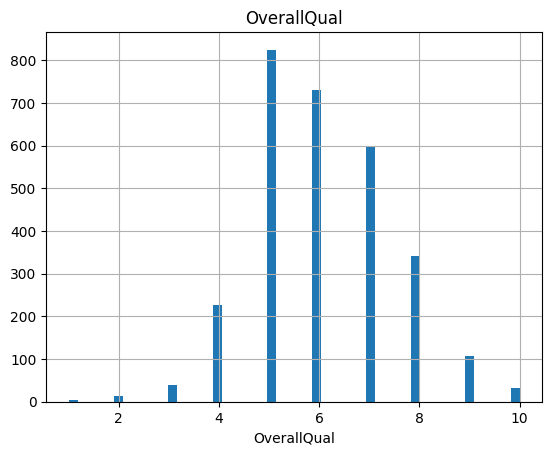

#####################################

count   2919.000

mean    1971.313

std       30.291

min     1872.000

5%      1915.000

10%     1924.000

20%     1947.000

30%     1957.000

40%     1965.000

50%     1973.000

60%     1984.000

70%     1998.000

80%     2003.000

90%     2006.000

95%     2007.000

99%     2008.000

max     2010.000

Name: YearBuilt, dtype: float64


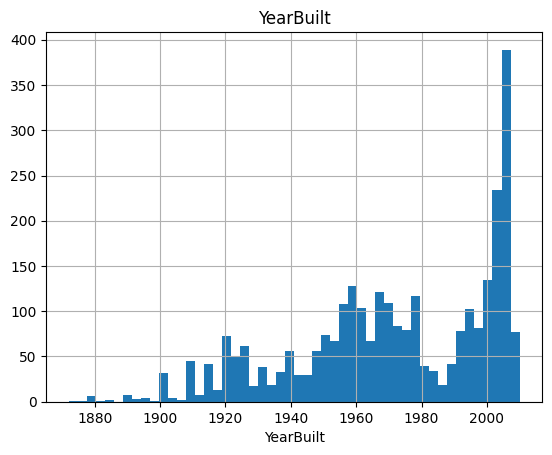

#####################################

count   2919.000

mean    1984.264

std       20.894

min     1950.000

5%      1950.000

10%     1950.000

20%     1960.000

30%     1970.000

40%     1978.000

50%     1993.000

60%     1998.000

70%     2002.000

80%     2005.000

90%     2006.200

95%     2007.000

99%     2009.000

max     2010.000

Name: YearRemodAdd, dtype: float64


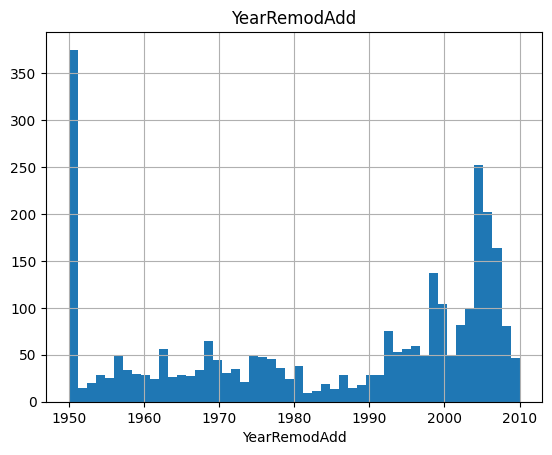

#####################################

count   2896.000

mean     102.201

std      179.334

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%      120.000

80%      202.000

90%      325.500

95%      466.500

99%      771.050

max     1600.000

Name: MasVnrArea, dtype: float64


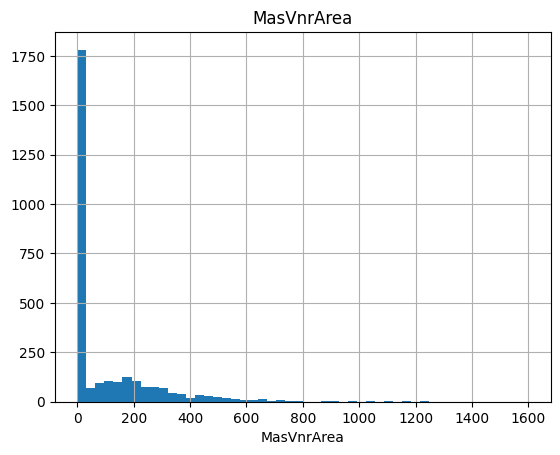

#####################################

count   2918.000

mean     441.423

std      455.611

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%      202.600

50%      368.500

60%      515.200

70%      656.000

80%      812.000

90%     1056.900

95%     1274.000

99%     1635.320

max     5644.000

Name: BsmtFinSF1, dtype: float64


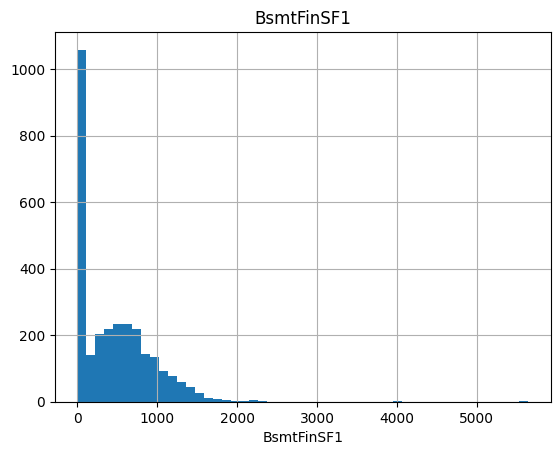

#####################################

count   2918.000

mean      49.582

std      169.206

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%        0.000

80%        0.000

90%      125.600

95%      435.000

99%      874.660

max     1526.000

Name: BsmtFinSF2, dtype: float64


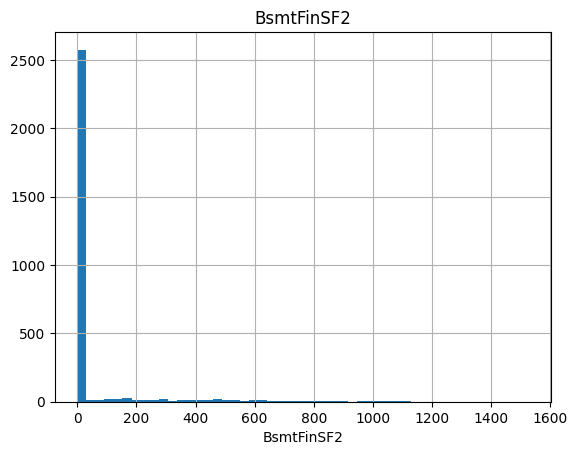

#####################################

count   2918.000

mean     560.772

std      439.544

min        0.000

5%         0.000

10%       56.000

20%      174.000

30%      270.000

40%      365.800

50%      467.000

60%      595.000

70%      732.000

80%      892.600

90%     1212.600

95%     1474.900

99%     1776.490

max     2336.000

Name: BsmtUnfSF, dtype: float64


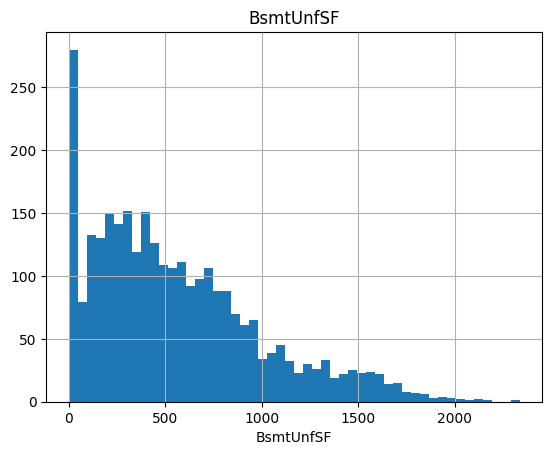

#####################################

count   2918.000

mean    1051.778

std      440.766

min        0.000

5%       455.250

10%      600.000

20%      741.000

30%      836.000

40%      911.000

50%      989.500

60%     1089.200

70%     1216.000

80%     1392.000

90%     1614.000

95%     1776.150

99%     2198.300

max     6110.000

Name: TotalBsmtSF, dtype: float64


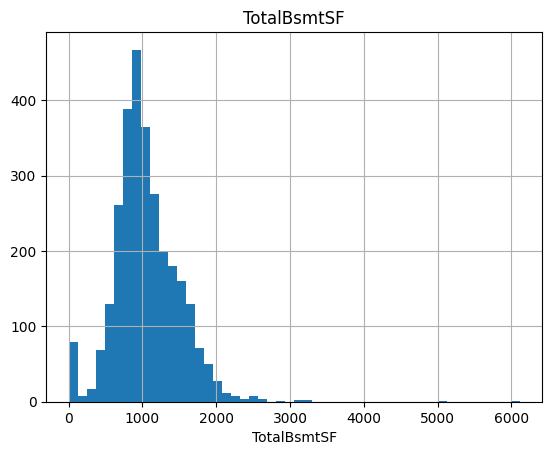

#####################################

count   2919.000

mean    1159.582

std      392.362

min      334.000

5%       665.900

10%      744.800

20%      847.000

30%      914.000

40%      996.200

50%     1082.000

60%     1180.000

70%     1314.000

80%     1483.400

90%     1675.000

95%     1830.100

99%     2288.020

max     5095.000

Name: 1stFlrSF, dtype: float64


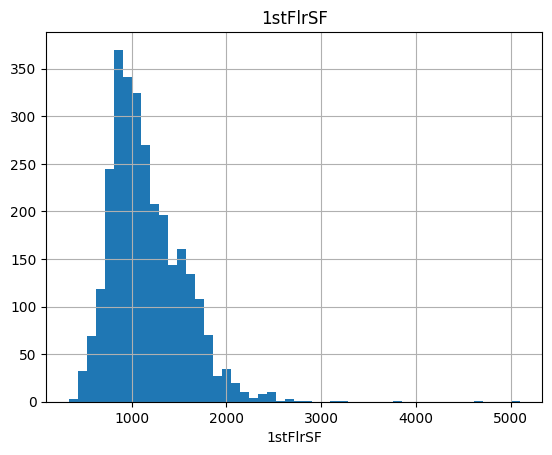

#####################################

count   2919.000

mean     336.484

std      428.701

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%      427.400

70%      636.000

80%      770.800

90%      925.000

95%     1131.200

99%     1400.200

max     2065.000

Name: 2ndFlrSF, dtype: float64


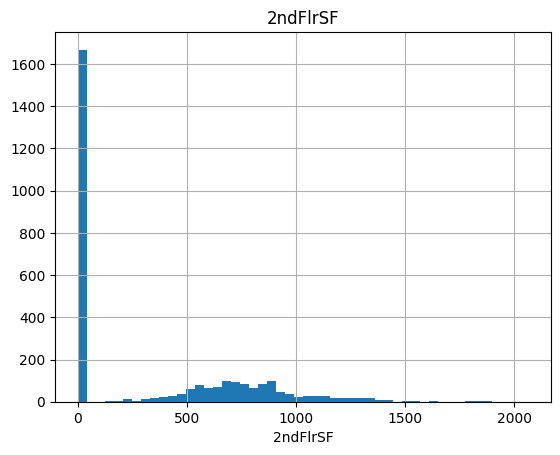

#####################################

count   2919.000

mean       4.694

std       46.397

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%        0.000

80%        0.000

90%        0.000

95%        0.000

99%      153.840

max     1064.000

Name: LowQualFinSF, dtype: float64


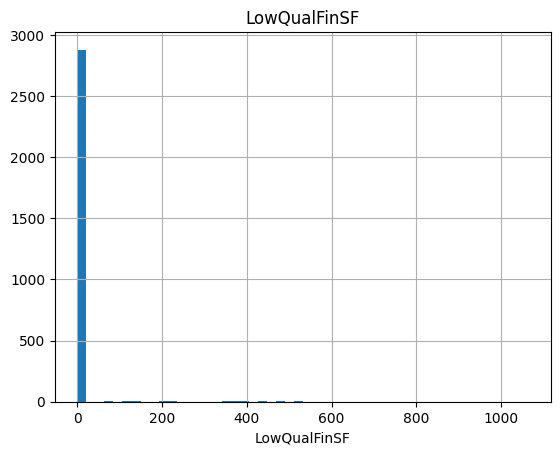

#####################################

count   2919.000

mean    1500.760

std      506.051

min      334.000

5%       861.000

10%      923.800

20%     1064.600

30%     1200.000

40%     1329.200

50%     1444.000

60%     1560.000

70%     1680.000

80%     1838.400

90%     2153.200

95%     2464.200

99%     2935.720

max     5642.000

Name: GrLivArea, dtype: float64


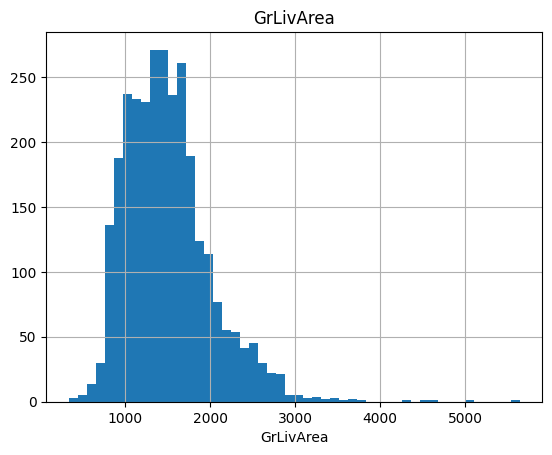

#####################################

count   2919.000

mean       6.452

std        1.569

min        2.000

5%         4.000

10%        5.000

20%        5.000

30%        6.000

40%        6.000

50%        6.000

60%        7.000

70%        7.000

80%        8.000

90%        8.000

95%        9.000

99%       11.000

max       15.000

Name: TotRmsAbvGrd, dtype: float64


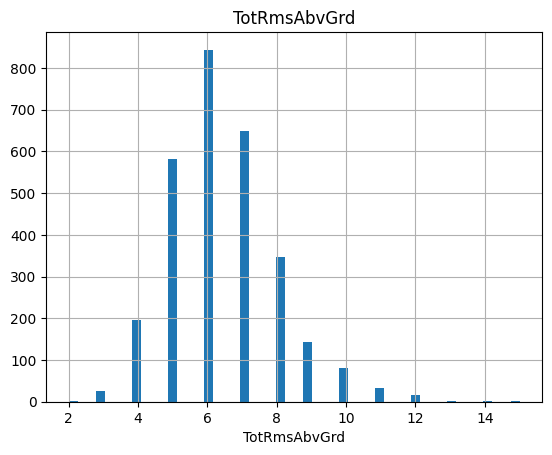

#####################################

count   2760.000

mean    1978.113

std       25.574

min     1895.000

5%      1928.000

10%     1941.000

20%     1957.000

30%     1964.000

40%     1972.000

50%     1979.000

60%     1993.000

70%     1999.000

80%     2004.000

90%     2006.000

95%     2007.000

99%     2009.000

max     2207.000

Name: GarageYrBlt, dtype: float64


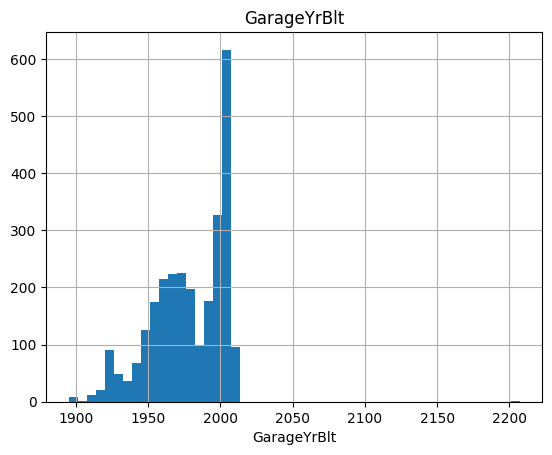

#####################################

count   2918.000

mean     472.875

std      215.395

min        0.000

5%         0.000

10%      240.000

20%      296.000

30%      379.000

40%      440.000

50%      480.000

60%      513.000

70%      560.900

80%      621.000

90%      758.000

95%      856.150

99%     1019.490

max     1488.000

Name: GarageArea, dtype: float64


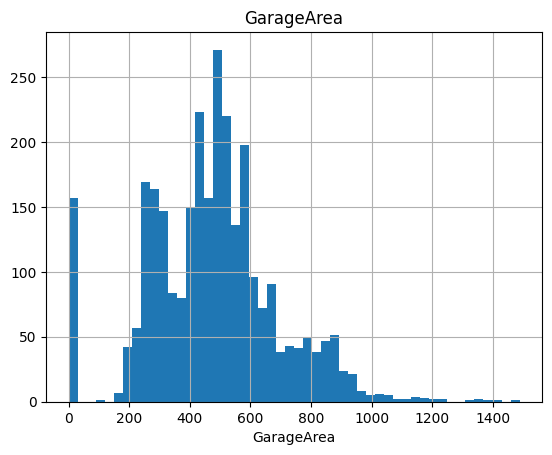

#####################################

count   2919.000

mean      93.710

std      126.527

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%      100.000

70%      144.000

80%      192.000

90%      257.000

95%      328.000

99%      500.820

max     1424.000

Name: WoodDeckSF, dtype: float64


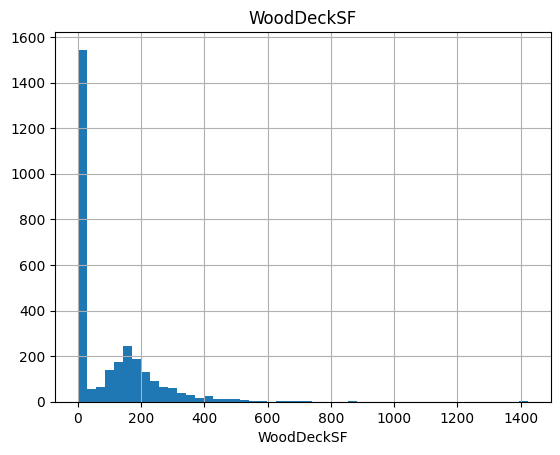

#####################################

count   2919.000

mean      47.487

std       67.575

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%       26.000

60%       40.000

70%       58.000

80%       85.000

90%      131.200

95%      183.100

99%      284.460

max      742.000

Name: OpenPorchSF, dtype: float64


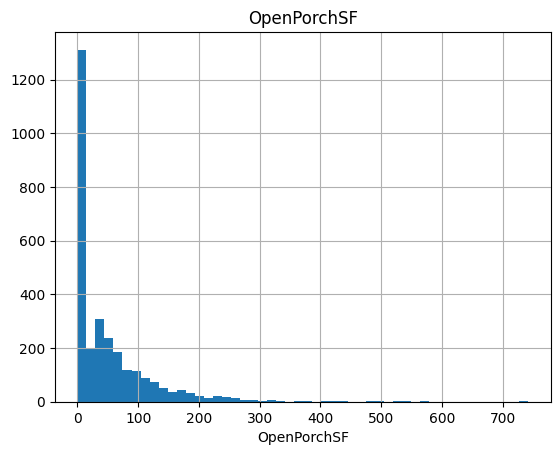

#####################################

count   2919.000

mean      23.098

std       64.244

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%        0.000

80%        0.000

90%      112.000

95%      176.000

99%      264.000

max     1012.000

Name: EnclosedPorch, dtype: float64


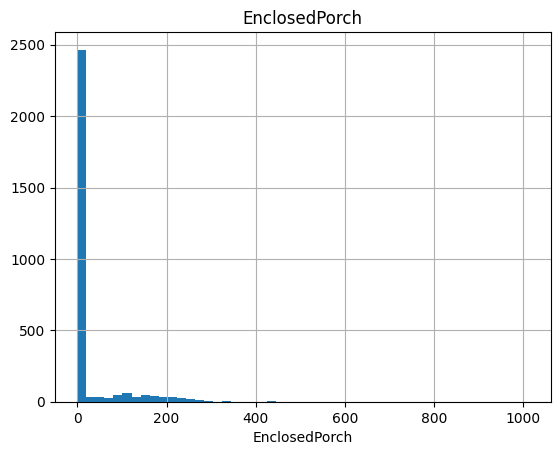

#####################################

count   2919.000

mean       2.602

std       25.188

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%        0.000

80%        0.000

90%        0.000

95%        0.000

99%      144.000

max      508.000

Name: 3SsnPorch, dtype: float64


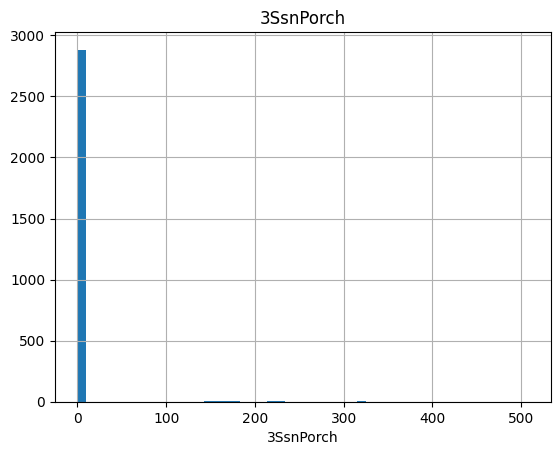

#####################################

count   2919.000

mean      16.062

std       56.184

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%        0.000

80%        0.000

90%        0.000

95%      161.000

99%      259.820

max      576.000

Name: ScreenPorch, dtype: float64


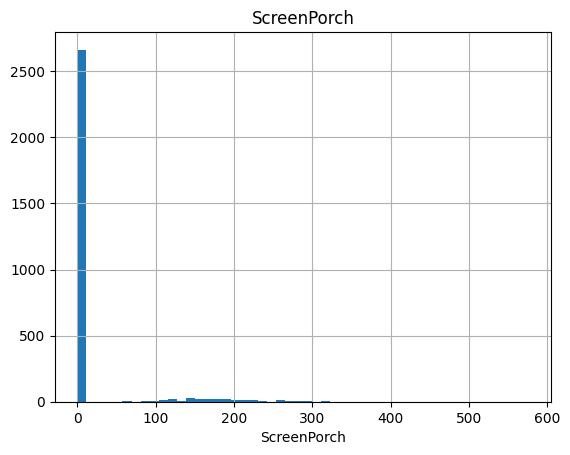

#####################################

count   2919.000

mean       2.252

std       35.664

min        0.000

5%         0.000

10%        0.000

20%        0.000

30%        0.000

40%        0.000

50%        0.000

60%        0.000

70%        0.000

80%        0.000

90%        0.000

95%        0.000

99%        0.000

max      800.000

Name: PoolArea, dtype: float64


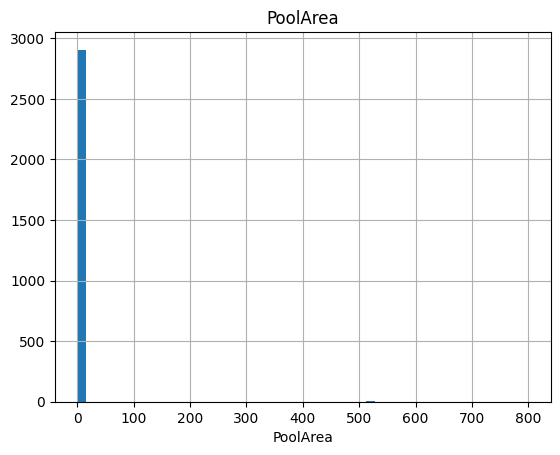

#####################################

count    2919.000

mean       50.826

std       567.402

min         0.000

5%          0.000

10%         0.000

20%         0.000

30%         0.000

40%         0.000

50%         0.000

60%         0.000

70%         0.000

80%         0.000

90%         0.000

95%         0.000

99%       982.000

max     17000.000

Name: MiscVal, dtype: float64


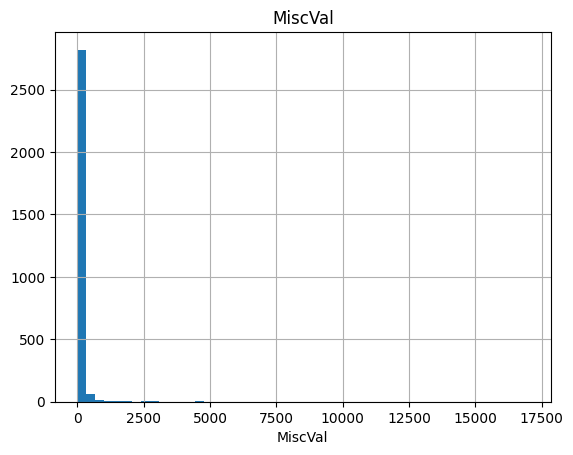

#####################################

count   2919.000

mean       6.213

std        2.715

min        1.000

5%         2.000

10%        3.000

20%        4.000

30%        5.000

40%        6.000

50%        6.000

60%        7.000

70%        7.000

80%        8.000

90%       10.000

95%       11.000

99%       12.000

max       12.000

Name: MoSold, dtype: float64


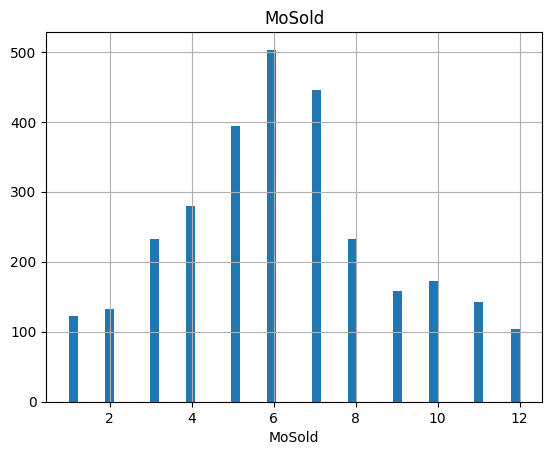

#####################################

count     1460.000

mean    180921.196

std      79442.503

min      34900.000

5%       88000.000

10%     106475.000

20%     124000.000

30%     135500.000

40%     147000.000

50%     163000.000

60%     179280.000

70%     198620.000

80%     230000.000

90%     278000.000

95%     326100.000

99%     442567.010

max     755000.000

Name: SalePrice, dtype: float64


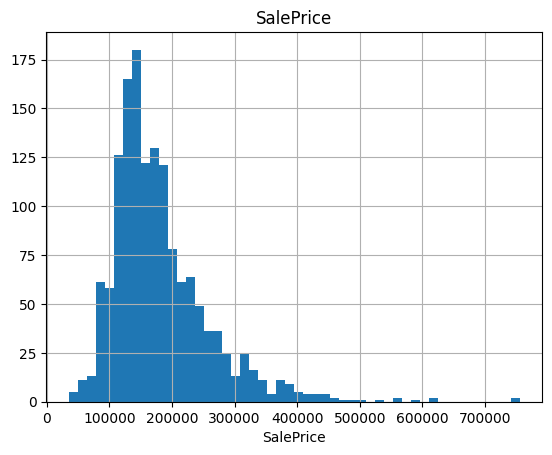

#####################################


In [ ]:
for col in num_cols:
    num_summary(df, col, True)

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df,"SalePrice",col)

          TARGET_MEAN

MSZoning             

C (all)     74528.000

FV         214014.062

RH         131558.375

RL         191004.995

RM         126316.830





        TARGET_MEAN

Street             

Grvl     130190.500

Pave     181130.539





       TARGET_MEAN

Alley             

Grvl    122219.080

Pave    168000.585





          TARGET_MEAN

LotShape             

IR1        206101.665

IR2        239833.366

IR3        216036.500

Reg        164754.818





             TARGET_MEAN

LandContour             

Bnk           143104.079

HLS           231533.940

Low           203661.111

Lvl           180183.747





           TARGET_MEAN

Utilities             

AllPub      180950.957

NoSeWa      137500.000





           TARGET_MEAN

LotConfig             

Corner      181623.426

CulDSac     223854.617

FR2         177934.574

FR3         208475.000

Inside      176938.048





           TARGET_MEAN

LandSlope             

Gtl         179956.800

Mod         19673

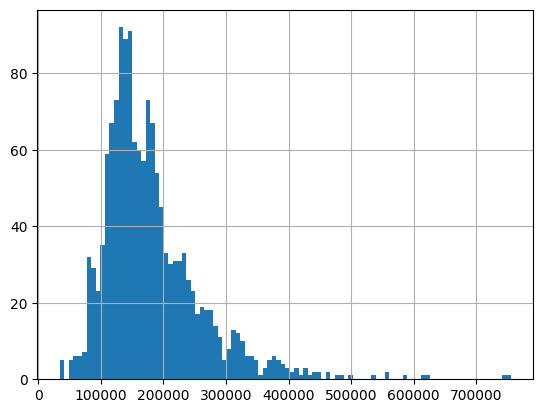

In [ ]:
df["SalePrice"].hist(bins=100)
plt.show(block=True)

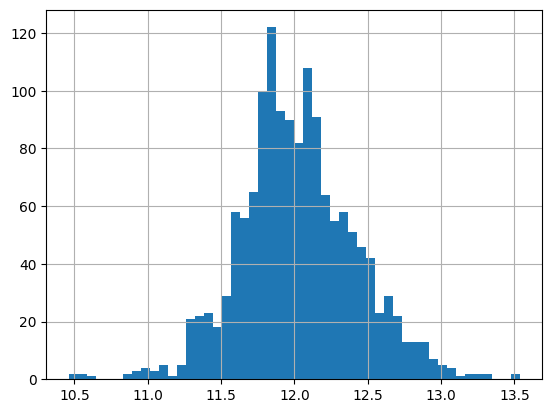

In [ ]:
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

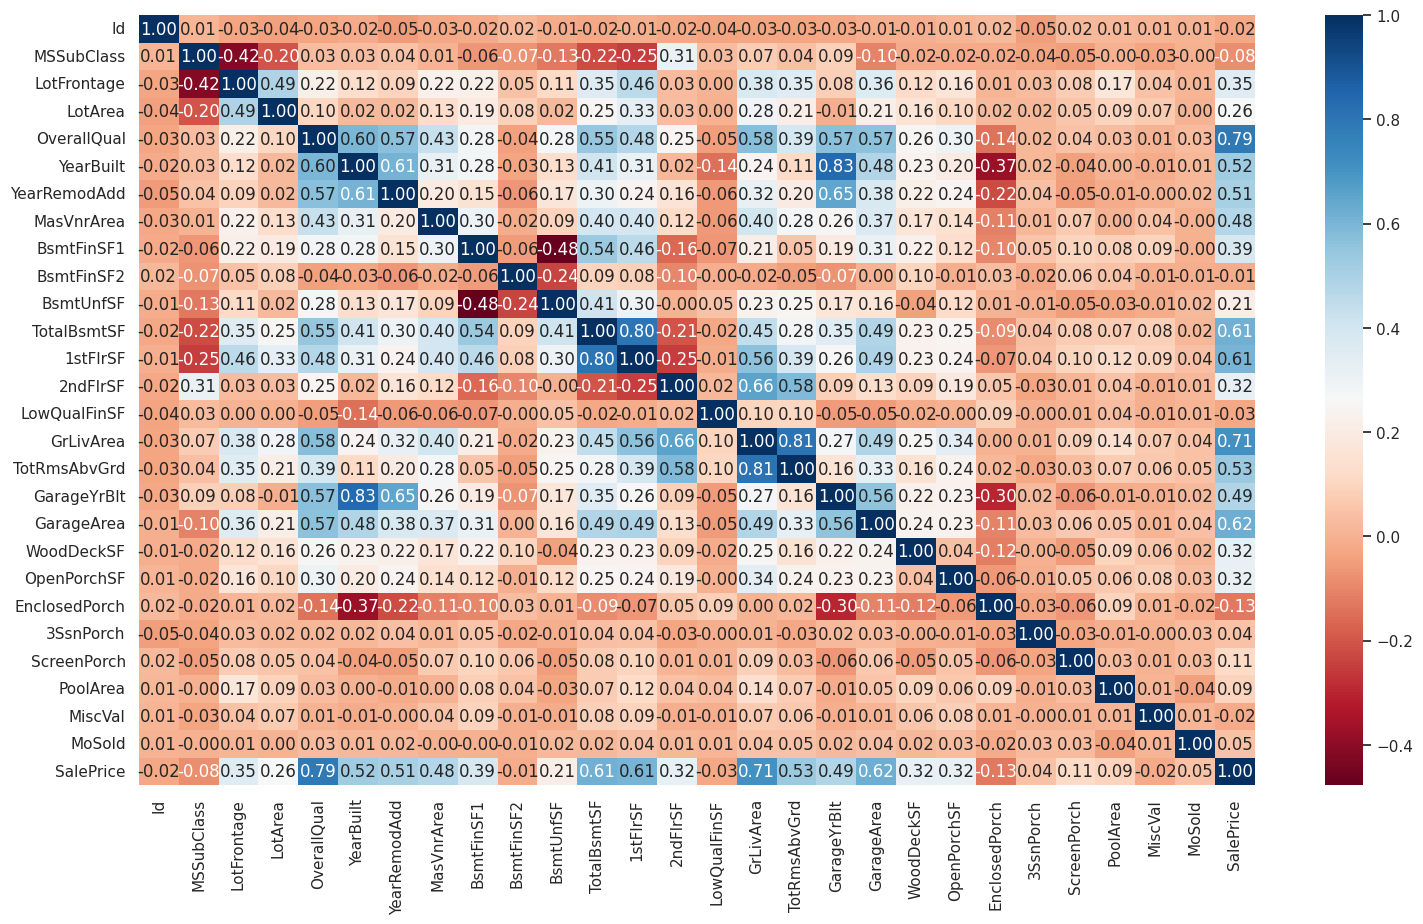

In [ ]:
corr = df[num_cols].corr()
corr
sns.set(rc={'figure.figsize': (18, 10)})
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
plt.show()

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (24, 10)})
        sns.heatmap(corr, cmap="RdBu",annot=True, fmt=".2f")
        plt.show()
    return drop_list

<ipython-input-41-80b6e42caf3d>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


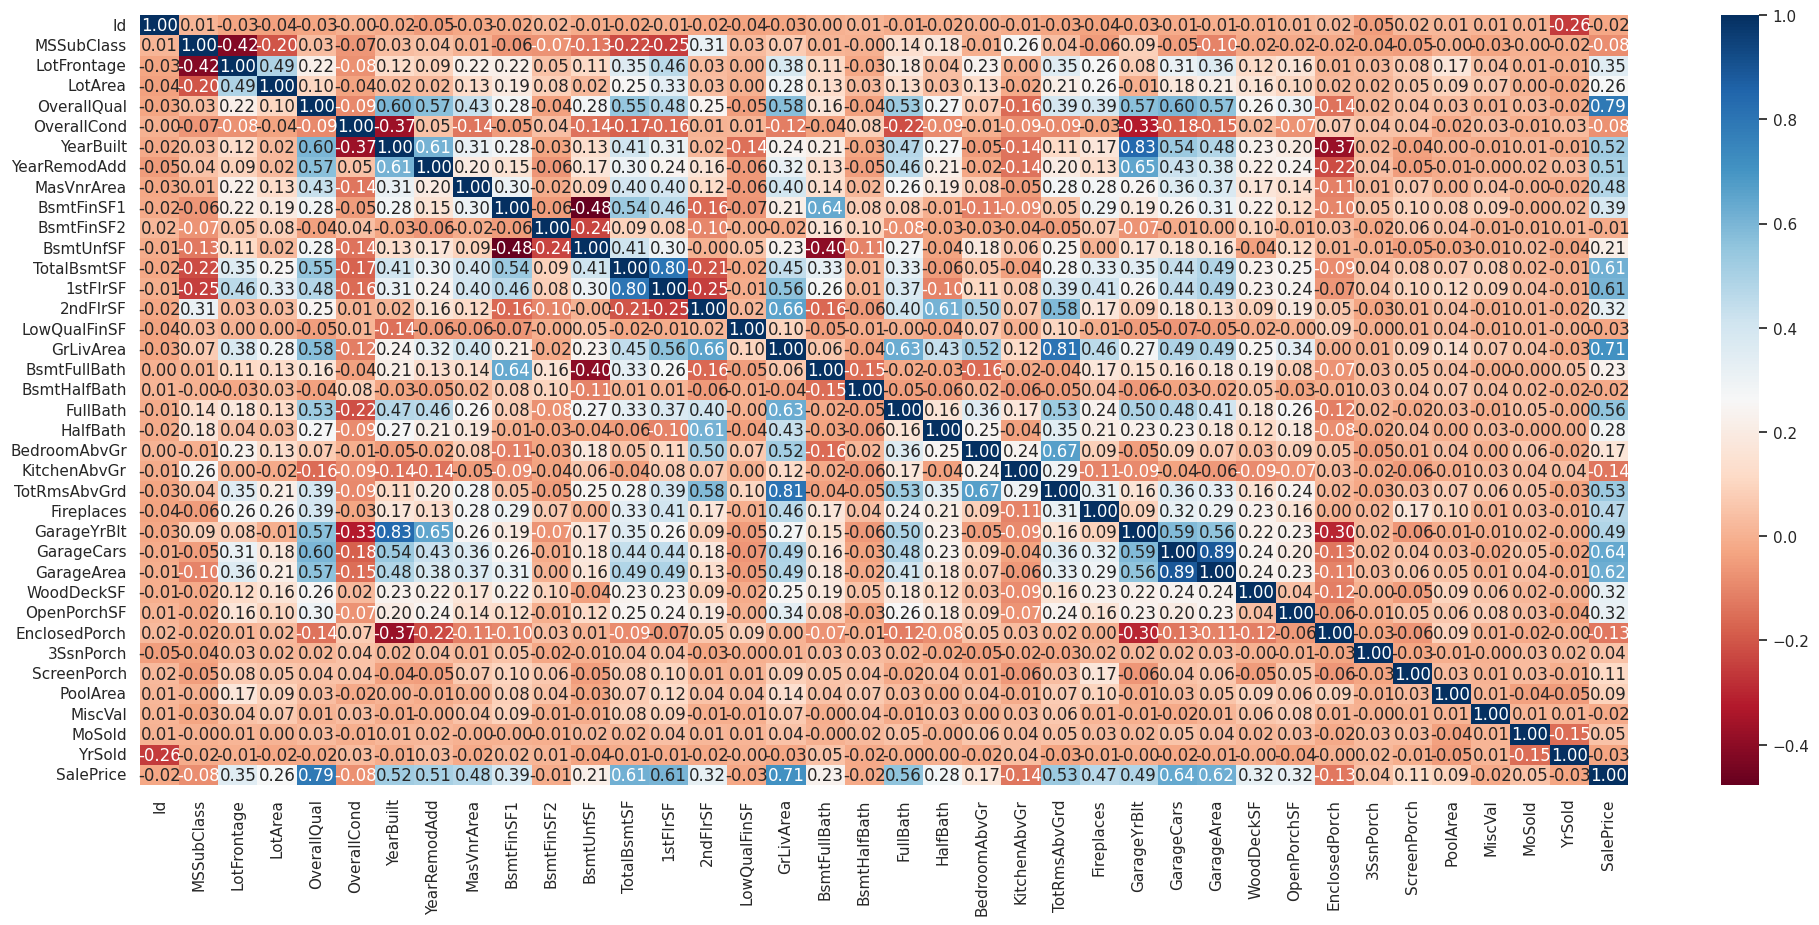

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [ ]:
high_correlated_cols(df, plot=True)

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

Id False

MSSubClass False

LotFrontage True

LotArea True

OverallQual False

YearBuilt False

YearRemodAdd False

MasVnrArea True

BsmtFinSF1 True

BsmtFinSF2 True

BsmtUnfSF False

TotalBsmtSF True

1stFlrSF True

2ndFlrSF False

LowQualFinSF True

GrLivArea True

TotRmsAbvGrd True

GarageYrBlt True

GarageArea False

WoodDeckSF True

OpenPorchSF True

EnclosedPorch True

3SsnPorch True

ScreenPorch True

PoolArea True

MiscVal True

MoSold False


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)


              n_miss  ratio

PoolQC          2909 99.660

MiscFeature     2814 96.400

Alley           2721 93.220

Fence           2348 80.440

SalePrice       1459 49.980

FireplaceQu     1420 48.650

LotFrontage      486 16.650

GarageCond       159  5.450

GarageYrBlt      159  5.450

GarageFinish     159  5.450

GarageQual       159  5.450

GarageType       157  5.380

BsmtExposure      82  2.810

BsmtCond          82  2.810

BsmtQual          81  2.770

BsmtFinType2      80  2.740

BsmtFinType1      79  2.710

MasVnrType        24  0.820

MasVnrArea        23  0.790

MSZoning           4  0.140

Functional         2  0.070

BsmtHalfBath       2  0.070

BsmtFullBath       2  0.070

Utilities          2  0.070

KitchenQual        1  0.030

TotalBsmtSF        1  0.030

BsmtUnfSF          1  0.030

GarageCars         1  0.030

GarageArea         1  0.030

BsmtFinSF2         1  0.030

BsmtFinSF1         1  0.030

Exterior2nd        1  0.030

Exterior1st        1  0.030

SaleType      

In [ ]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [ ]:
df["BsmtQual"].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [ ]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [ ]:
for col in no_cols:
    df[col].fillna("No",inplace=True)

In [ ]:
missing_values_table(df)

              n_miss  ratio

SalePrice       1459 49.980

LotFrontage      486 16.650

GarageYrBlt      159  5.450

MasVnrType        24  0.820

MasVnrArea        23  0.790

MSZoning           4  0.140

BsmtFullBath       2  0.070

BsmtHalfBath       2  0.070

Functional         2  0.070

Utilities          2  0.070

Exterior2nd        1  0.030

BsmtFinSF1         1  0.030

BsmtFinSF2         1  0.030

BsmtUnfSF          1  0.030

Exterior1st        1  0.030

Electrical         1  0.030

KitchenQual        1  0.030

GarageCars         1  0.030

GarageArea         1  0.030

SaleType           1  0.030

TotalBsmtSF        1  0.030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2919 entries, 0 to 2918

Data columns (total 81 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Id             2919 non-null   float64

 1   MSSubClass     2919 non-null   int64  

 2   MSZoning       2915 non-null   object 

 3   LotFrontage    2433 non-null   float64

 4   LotArea        2919 non-null   float64

 5   Street         2919 non-null   object 

 6   Alley          2919 non-null   object 

 7   LotShape       2919 non-null   object 

 8   LandContour    2919 non-null   object 

 9   Utilities      2917 non-null   object 

 10  LotConfig      2919 non-null   object 

 11  LandSlope      2919 non-null   object 

 12  Neighborhood   2919 non-null   object 

 13  Condition1     2919 non-null   object 

 14  Condition2     2919 non-null   object 

 15  BldgType       2919 non-null   object 

 16  HouseStyle     2919 non-null   object 

 17  OverallQual    2919 non-null  

In [ ]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [ ]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE

MSZoning           4

LotFrontage      486

Utilities          2

Exterior1st        1

Exterior2nd        1

MasVnrType        24

MasVnrArea        23

BsmtFinSF1         1

BsmtFinSF2         1

BsmtUnfSF          1

TotalBsmtSF        1

Electrical         1

BsmtFullBath       2

BsmtHalfBath       2

KitchenQual        1

Functional         2

GarageYrBlt      159

GarageCars         1

GarageArea         1

SaleType           1

SalePrice       1459

dtype: int64 





# AFTER 

 Imputation method is 'MODE' for categorical variables!

 Imputation method is 'MEDIAN' for numeric variables! 



MSZoning           0

LotFrontage        0

Utilities          0

Exterior1st        0

Exterior2nd        0

MasVnrType         0

MasVnrArea         0

BsmtFinSF1         0

BsmtFinSF2         0

BsmtUnfSF          0

TotalBsmtSF        0

Electrical         0

BsmtFullBath       0

BsmtHalfBath       0

KitchenQual        0

Functional         0

GarageYrBlt        0

GarageCars

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5

         COUNT  RATIO  TARGET_MEAN

C (all)     25  0.009    74528.000

FV         139  0.048   214014.062

RH          26  0.009   131558.375

RL        2269  0.777   191004.995

RM         460  0.158   126316.830





Street : 2

      COUNT  RATIO  TARGET_MEAN

Grvl     12  0.004   130190.500

Pave   2907  0.996   181130.539





Alley : 3

      COUNT  RATIO  TARGET_MEAN

Grvl    120  0.041   122219.080

No     2721  0.932   183452.131

Pave     78  0.027   168000.585





LotShape : 4

     COUNT  RATIO  TARGET_MEAN

IR1    968  0.332   206101.665

IR2     76  0.026   239833.366

IR3     16  0.005   216036.500

Reg   1859  0.637   164754.818





LandContour : 4

     COUNT  RATIO  TARGET_MEAN

Bnk    117  0.040   143104.079

HLS    120  0.041   231533.940

Low     60  0.021   203661.111

Lvl   2622  0.898   180183.747





Utilities : 2

        COUNT  RATIO  TARGET_MEAN

AllPub   2918  1.000   180950.957

NoSeWa      1  0.000   137500.000





LotConfig : 5

      

In [ ]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [ ]:
rare_encoder(df,0.01)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour  \
0       1.000          60       RL       65.000  8450.000   Pave    No      Reg         Lvl   
1       2.000          20       RL       80.000  9600.000   Pave    No      Reg         Lvl   
2       3.000          60       RL       68.000 11250.000   Pave    No      IR1         Lvl   
3       4.000          70       RL       60.000  9550.000   Pave    No      IR1         Lvl   
4       5.000          60       RL       84.000 14260.000   Pave    No      IR1         Lvl   
...       ...         ...      ...          ...       ...    ...   ...      ...         ...   
2914 2915.000         160       RM       21.000  1936.000   Pave    No      Reg         Lvl   
2915 2916.000         160       RM       21.000  1894.000   Pave    No      Reg         Lvl   
2916 2917.000          20       RL      160.000 20000.000   Pave    No      Reg         Lvl   
2917 2918.000          85       RL       62.000 10441.000   Pave    No      Reg         Lvl   
2918 2919.000          60       RL       74.000  9627.000   Pave    No      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       AllPub       FR2       Gtl         Rare      Feedr       Norm     1Fam     1Story   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
...        ...       ...       ...          ...        ...        ...      ...        ...   
2914    AllPub    Inside       Gtl      MeadowV       Norm       Norm    Twnhs     2Story   
2915    AllPub    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE     2Story   
2916    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1Story   
2917    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     SFoyer   
2918    AllPub    Inside       Mod      Mitchel       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0           7.000            5       2003      2003.000     Gable  CompShg     VinylSd   
1           6.000            8       1976      1976.000     Gable  CompShg     MetalSd   
2           7.000            5       2001      2002.000     Gable  CompShg     VinylSd   
3           7.000            5       1915      1970.000     Gable  CompShg     Wd Sdng   
4           8.000            5       2000      2000.000     Gable  CompShg     VinylSd   
...           ...          ...        ...           ...       ...      ...         ...   
2914        4.000            7       1970      1970.000     Gable  CompShg     CemntBd   
2915        4.000            5       1970      1970.000     Gable  CompShg     CemntBd   
2916        5.000            7       1960      1996.000     Gable  CompShg     VinylSd   
2917        5.000            5       1992      1992.000     Gable  CompShg     HdBoard   
2918        7.000            5       1993      1994.000     Gable  CompShg     HdBoard   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA   
1        MetalSd       None       0.000        TA        TA     CBlock       Gd       TA   
2        VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA   
3        Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd   
4        VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA   
...          ...        ...         ...       ...       ...        ...      ...      ...   
2914     CmentBd       None 

In [ ]:
df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1) # 42


# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"] # 32

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2 # 56

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF # 93

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF # 156

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF # 35


# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea # 64

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea # 57

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea # 69

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea # 36

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF) # 73


df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"] # 61


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt # 31

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt # 73

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd # 40

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt # 17

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd) # 30

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt # 48

In [ ]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]

df.drop(drop_list, axis=1, inplace=True)

In [ ]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

Observations: 2919

Variables: 92

cat_cols: 49

num_cols: 43

cat_but_car: 0

num_but_cat: 15


In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [ ]:
df.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0 1.000          60       65.000  8450.000        7.000       2003      2003.000     196.000   
1 2.000          20       80.000  9600.000        6.000       1976      1976.000       0.000   
2 3.000          60       68.000 11250.000        7.000       2001      2002.000     162.000   
3 4.000          70       60.000  9550.000        7.000       1915      1970.000       0.000   
4 5.000          60       84.000 14260.000        8.000       2000      2000.000     350.000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  TotRmsAbvGrd  \
0     706.000       0.000    150.000      856.000   856.000   854.000   1710.000         8.000   
1     978.000       0.000    284.000     1262.000  1262.000     0.000   1262.000         6.000   
2     486.000       0.000    434.000      920.000   920.000   866.000   1786.000         6.000   
3     216.000       0.000    540.000      756.000   961.000   756.000   1717.000         7.000   
4     655.000       0.000    490.000     1145.000  1145.000  1053.000   2198.000         9.000   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SalePrice  \
0     2003.000     548.000       0.000       61.000              0   2.000 208500.000   
1     1976.000     460.000     298.000        0.000              0   5.000 181500.000   
2     2001.000     608.000       0.000       42.000              0   9.000 223500.000   
3     1998.000     642.000       0.000       35.000            272   2.000 140000.000   
4     2000.000     836.000     192.000       84.000              0  12.000 250000.000   

   NEW_1st*GrLiv  NEW_Garage*GrLiv  TotalQual  NEW_TotalFlrSF  NEW_TotalBsmtFin  NEW_PorchArea  \
0    1463760.000        937080.000     12.000        1710.000           706.000         61.000   
1    1592644.000        580520.000     14.000        1262.000           978.000        298.000   
2    1643120.000       1085888.000     12.000        1786.000           486.000         42.000   
3    1650037.000       1102314.000     12.000        1717.000           216.000        307.000   
4    2516710.000       1837528.000     13.000        2198.000           655.000        276.000   

   NEW_TotalHouseArea  NEW_TotalSqFeet  NEW_LotRatio  NEW_RatioArea  NEW_GarageLotRatio  \
0            2566.000         2566.000         0.202          0.304               0.065   
1            2524.000         2524.000         0.131          0.263               0.048   
2            2706.000         2706.000         0.159          0.241               0.054   
3            2473.000         2473.000         0.180          0.259               0.067   
4            3343.000         3343.000         0.154          0.234               0.059   

   NEW_MasVnrRatio  NEW_DifArea  NEW_OverallGrade  NEW_Restoration  NEW_HouseAge  \
0            0.076     6985.000            35.000            0.000             5   
1            0.000     7282.000            48.000            0.000            31   
2            0.060     9680.000            35.000            1.000             7   
3            0.000     7640.000            35.000           55.000            91   
4            0.105    11811.000            40.000            0.000             8   

   NEW_RestorationAge  NEW_GarageAge  NEW_GarageRestorationAge  NEW_GarageSold  MSZoning_FV  \
0               5.000          0.000                     0.000           5.000            0   
1              31.000          0.000                     0.000          31.000            0   
2               6.000          0.000                     1.000           7.000            0   
3              36.000         83.000                    28.000           8.000            0   
4               8.000          0.000                     0.000           8.000            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0     

In [ ]:
df[df['SalePrice'].notnull()]

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0       1.000          60       65.000  8450.000        7.000       2003      2003.000   
1       2.000          20       80.000  9600.000        6.000       1976      1976.000   
2       3.000          60       68.000 11250.000        7.000       2001      2002.000   
3       4.000          70       60.000  9550.000        7.000       1915      1970.000   
4       5.000          60       84.000 14260.000        8.000       2000      2000.000   
...       ...         ...          ...       ...          ...        ...           ...   
1455 1456.000          60       62.000  7917.000        6.000       1999      2000.000   
1456 1457.000          20       85.000 13175.000        6.000       1978      1988.000   
1457 1458.000          70       66.000  9042.000        7.000       1941      2006.000   
1458 1459.000          20       68.000  9717.000        5.000       1950      1996.000   
1459 1460.000          20       75.000  9937.000        5.000       1965      1965.000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0        196.000     706.000       0.000    150.000      856.000   856.000   854.000   1710.000   
1          0.000     978.000       0.000    284.000     1262.000  1262.000     0.000   1262.000   
2        162.000     486.000       0.000    434.000      920.000   920.000   866.000   1786.000   
3          0.000     216.000       0.000    540.000      756.000   961.000   756.000   1717.000   
4        350.000     655.000       0.000    490.000     1145.000  1145.000  1053.000   2198.000   
...          ...         ...         ...        ...          ...       ...       ...        ...   
1455       0.000       0.000       0.000    953.000      953.000   953.000   694.000   1647.000   
1456     119.000     790.000     163.000    589.000     1542.000  2073.000     0.000   2073.000   
1457       0.000     275.000       0.000    877.000     1152.000  1188.000  1152.000   2340.000   
1458       0.000      49.000     314.000      0.000     1078.000  1078.000     0.000   1078.000   
1459       0.000     830.000     290.000    136.000     1256.000  1256.000     0.000   1256.000   

      TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  \
0            8.000     2003.000     548.000       0.000       61.000              0   2.000   
1            6.000     1976.000     460.000     298.000        0.000              0   5.000   
2            6.000     2001.000     608.000       0.000       42.000              0   9.000   
3            7.000     1998.000     642.000       0.000       35.000            272   2.000   
4            9.000     2000.000     836.000     192.000       84.000              0  12.000   
...            ...          ...         ...         ...          ...            ...     ...   
1455         7.000     1999.000     460.000       0.000       40.000              0   8.000   
1456         7.000     1978.000     500.000     349.000        0.000              0   2.000   
1457         9.000     1941.000     252.000       0.000       60.000              0   5.000   
1458         5.000     1950.000     240.000     366.000        0.000            112   4.000   
1459         6.000     1965.000     276.000     642.500       68.000              0   6.000   

      SalePrice  NEW_1st*GrLiv  NEW_Garage*GrLiv  TotalQual  NEW_TotalFlrSF  NEW_TotalBsmtFin  \
0    208500.000    1463760.000        937080.000     12.000        1710.000           706.000   
1    181500.000    1592644.000        580520.000     14.000        1262.000           978.000   
2    223500.000    1643120.000       1085888.000     12.000        1786.000           486.000   
3    140000.000    1650037.000       1102314.000     12.000        1717.000           216.000   
4    250000.000    2516710.000       1837528.000     13.000        2198.000           655.000   
...         ...   

In [ ]:
df[df['SalePrice'].isnull()]

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1460 1461.000          20       80.000 11622.000        5.000       1961      1961.000   
1461 1462.000          20       81.000 14267.000        6.000       1958      1958.000   
1462 1463.000          60       74.000 13830.000        5.000       1997      1998.000   
1463 1464.000          60       78.000  9978.000        6.000       1998      1998.000   
1464 1465.000         120       43.000  5005.000        8.000       1992      1992.000   
...       ...         ...          ...       ...          ...        ...           ...   
2914 2915.000         160       21.000  1936.000        4.000       1970      1970.000   
2915 2916.000         160       21.000  1894.000        4.000       1970      1970.000   
2916 2917.000          20      160.000 20000.000        5.000       1960      1996.000   
2917 2918.000          85       62.000 10441.000        5.000       1992      1992.000   
2918 2919.000          60       74.000  9627.000        7.000       1993      1994.000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1460       0.000     468.000     144.000    270.000      882.000   896.000     0.000    896.000   
1461     108.000     923.000       0.000    406.000     1329.000  1329.000     0.000   1329.000   
1462       0.000     791.000       0.000    137.000      928.000   928.000   701.000   1629.000   
1463      20.000     602.000       0.000    324.000      926.000   926.000   678.000   1604.000   
1464       0.000     263.000       0.000   1017.000     1280.000  1280.000     0.000   1280.000   
...          ...         ...         ...        ...          ...       ...       ...        ...   
2914       0.000       0.000       0.000    546.000      546.000   546.000   546.000   1092.000   
2915       0.000     252.000       0.000    294.000      546.000   546.000   546.000   1092.000   
2916       0.000    1224.000       0.000      0.000     1224.000  1224.000     0.000   1224.000   
2917       0.000     337.000       0.000    575.000      912.000   970.000     0.000    970.000   
2918      94.000     758.000       0.000    238.000      996.000   996.000  1004.000   2000.000   

      TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  \
1460         5.000     1961.000     730.000     140.000        0.000              0   6.000   
1461         6.000     1958.000     312.000     393.000       36.000              0   6.000   
1462         6.000     1997.000     482.000     212.000       34.000              0   3.000   
1463         7.000     1998.000     470.000     360.000       36.000              0   6.000   
1464         5.000     1992.000     506.000       0.000       82.000              0   1.000   
...            ...          ...         ...         ...          ...            ...     ...   
2914         5.000     1979.000       0.000       0.000        0.000              0   6.000   
2915         6.000     1970.000     286.000       0.000       24.000              0   4.000   
2916         7.000     1960.000     576.000     474.000        0.000              0   9.000   
2917         6.000     1979.000       0.000      80.000       32.000              0   7.000   
2918         9.000     1993.000     650.000     190.000       48.000              0  11.000   

      SalePrice  NEW_1st*GrLiv  NEW_Garage*GrLiv  TotalQual  NEW_TotalFlrSF  NEW_TotalBsmtFin  \
1460        NaN     802816.000        654080.000     11.000         896.000           612.000   
1461        NaN    1766241.000        414648.000     12.000        1329.000           923.000   
1462        NaN    1511712.000        785178.000     10.000        1629.000           791.000   
1463        NaN    1485304.000        753880.000     12.000        1604.000           602.000   
1464        NaN    1638400.000        647680.000     13.000        1280.000           263.000   
...         ...   

In [ ]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [ ]:
test_df

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1460 1461.000          20       80.000 11622.000        5.000       1961      1961.000   
1461 1462.000          20       81.000 14267.000        6.000       1958      1958.000   
1462 1463.000          60       74.000 13830.000        5.000       1997      1998.000   
1463 1464.000          60       78.000  9978.000        6.000       1998      1998.000   
1464 1465.000         120       43.000  5005.000        8.000       1992      1992.000   
...       ...         ...          ...       ...          ...        ...           ...   
2914 2915.000         160       21.000  1936.000        4.000       1970      1970.000   
2915 2916.000         160       21.000  1894.000        4.000       1970      1970.000   
2916 2917.000          20      160.000 20000.000        5.000       1960      1996.000   
2917 2918.000          85       62.000 10441.000        5.000       1992      1992.000   
2918 2919.000          60       74.000  9627.000        7.000       1993      1994.000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1460       0.000     468.000     144.000    270.000      882.000   896.000     0.000    896.000   
1461     108.000     923.000       0.000    406.000     1329.000  1329.000     0.000   1329.000   
1462       0.000     791.000       0.000    137.000      928.000   928.000   701.000   1629.000   
1463      20.000     602.000       0.000    324.000      926.000   926.000   678.000   1604.000   
1464       0.000     263.000       0.000   1017.000     1280.000  1280.000     0.000   1280.000   
...          ...         ...         ...        ...          ...       ...       ...        ...   
2914       0.000       0.000       0.000    546.000      546.000   546.000   546.000   1092.000   
2915       0.000     252.000       0.000    294.000      546.000   546.000   546.000   1092.000   
2916       0.000    1224.000       0.000      0.000     1224.000  1224.000     0.000   1224.000   
2917       0.000     337.000       0.000    575.000      912.000   970.000     0.000    970.000   
2918      94.000     758.000       0.000    238.000      996.000   996.000  1004.000   2000.000   

      TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  \
1460         5.000     1961.000     730.000     140.000        0.000              0   6.000   
1461         6.000     1958.000     312.000     393.000       36.000              0   6.000   
1462         6.000     1997.000     482.000     212.000       34.000              0   3.000   
1463         7.000     1998.000     470.000     360.000       36.000              0   6.000   
1464         5.000     1992.000     506.000       0.000       82.000              0   1.000   
...            ...          ...         ...         ...          ...            ...     ...   
2914         5.000     1979.000       0.000       0.000        0.000              0   6.000   
2915         6.000     1970.000     286.000       0.000       24.000              0   4.000   
2916         7.000     1960.000     576.000     474.000        0.000              0   9.000   
2917         6.000     1979.000       0.000      80.000       32.000              0   7.000   
2918         9.000     1993.000     650.000     190.000       48.000              0  11.000   

      SalePrice  NEW_1st*GrLiv  NEW_Garage*GrLiv  TotalQual  NEW_TotalFlrSF  NEW_TotalBsmtFin  \
1460        NaN     802816.000        654080.000     11.000         896.000           612.000   
1461        NaN    1766241.000        414648.000     12.000        1329.000           923.000   
1462        NaN    1511712.000        785178.000     10.000        1629.000           791.000   
1463        NaN    1485304.000        753880.000     12.000        1604.000           602.000   
1464        NaN    1638400.000        647680.000     13.000        1280.000           263.000   
...         ...   

In [ ]:
y = train_df['SalePrice'] # np.log1p(df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor(n_estimators=200)),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor(n_estimators=200, learning_rate=0.08)),
          ("XGBoost", XGBRegressor()),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(learning_rate=0.08,verbose=False))]

In [ ]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 42501.7985 (LR) 

RMSE: 47557.3947 (KNN) 

RMSE: 39149.667 (CART) 

RMSE: 28916.3429 (RF) 

RMSE: 81072.8236 (SVR) 

RMSE: 26395.3305 (GBM) 

RMSE: 27971.7767 (XGBoost) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Total Bins 6477

[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 178

[LightGBM] [Info] Start training from score 180717.091610

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Inf

In [ ]:
df['SalePrice'].mean()

180921.19589041095

In [ ]:
df['SalePrice'].std()

79442.50288288662

In [ ]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)


In [ ]:
test_df

Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1460 1461.000          20       80.000 11622.000        5.000       1961      1961.000   
1461 1462.000          20       81.000 14267.000        6.000       1958      1958.000   
1462 1463.000          60       74.000 13830.000        5.000       1997      1998.000   
1463 1464.000          60       78.000  9978.000        6.000       1998      1998.000   
1464 1465.000         120       43.000  5005.000        8.000       1992      1992.000   
...       ...         ...          ...       ...          ...        ...           ...   
2914 2915.000         160       21.000  1936.000        4.000       1970      1970.000   
2915 2916.000         160       21.000  1894.000        4.000       1970      1970.000   
2916 2917.000          20      160.000 20000.000        5.000       1960      1996.000   
2917 2918.000          85       62.000 10441.000        5.000       1992      1992.000   
2918 2919.000          60       74.000  9627.000        7.000       1993      1994.000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1460       0.000     468.000     144.000    270.000      882.000   896.000     0.000    896.000   
1461     108.000     923.000       0.000    406.000     1329.000  1329.000     0.000   1329.000   
1462       0.000     791.000       0.000    137.000      928.000   928.000   701.000   1629.000   
1463      20.000     602.000       0.000    324.000      926.000   926.000   678.000   1604.000   
1464       0.000     263.000       0.000   1017.000     1280.000  1280.000     0.000   1280.000   
...          ...         ...         ...        ...          ...       ...       ...        ...   
2914       0.000       0.000       0.000    546.000      546.000   546.000   546.000   1092.000   
2915       0.000     252.000       0.000    294.000      546.000   546.000   546.000   1092.000   
2916       0.000    1224.000       0.000      0.000     1224.000  1224.000     0.000   1224.000   
2917       0.000     337.000       0.000    575.000      912.000   970.000     0.000    970.000   
2918      94.000     758.000       0.000    238.000      996.000   996.000  1004.000   2000.000   

      TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  \
1460         5.000     1961.000     730.000     140.000        0.000              0   6.000   
1461         6.000     1958.000     312.000     393.000       36.000              0   6.000   
1462         6.000     1997.000     482.000     212.000       34.000              0   3.000   
1463         7.000     1998.000     470.000     360.000       36.000              0   6.000   
1464         5.000     1992.000     506.000       0.000       82.000              0   1.000   
...            ...          ...         ...         ...          ...            ...     ...   
2914         5.000     1979.000       0.000       0.000        0.000              0   6.000   
2915         6.000     1970.000     286.000       0.000       24.000              0   4.000   
2916         7.000     1960.000     576.000     474.000        0.000              0   9.000   
2917         6.000     1979.000       0.000      80.000       32.000              0   7.000   
2918         9.000     1993.000     650.000     190.000       48.000              0  11.000   

      SalePrice  NEW_1st*GrLiv  NEW_Garage*GrLiv  TotalQual  NEW_TotalFlrSF  NEW_TotalBsmtFin  \
1460        NaN     802816.000        654080.000     11.000         896.000           612.000   
1461        NaN    1766241.000        414648.000     12.000        1329.000           923.000   
1462        NaN    1511712.000        785178.000     10.000        1629.000           791.000   
1463        NaN    1485304.000        753880.000     12.000        1604.000           602.000   
1464        NaN    1638400.000        647680.000     13.000        1280.000           263.000   
...         ...   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
catboost = CatBoostRegressor(verbose=False).fit(X_train, y_train)
y_pred = catboost.predict(X_test)

In [ ]:
y_pred
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y
new_y_test = np.expm1(y_test)
new_y_test

703    140000.000
1361   260000.000
937    253000.000
1330   227000.000
113    217000.000
          ...    
903    240000.000
682    173000.000
1052   165000.000
1159   185000.000
672    165000.000
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
np.sqrt(mean_squared_error(new_y_test, new_y))

22662.8411358284

In [ ]:
catboost_model = CatBoostRegressor(verbose=False,random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(catboost_model, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

0.12417245207190157

In [ ]:
catboost_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]}
catboost_gs_best = GridSearchCV(catboost_model,
                            catboost_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=False).fit(X_train, y_train)

In [ ]:
final_model = catboost_model.set_params(**catboost_gs_best.best_params_).fit(X, y)
rmse

0.12417245207190157

In [ ]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [ ]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 30))
    sns.set(font_scale=0.5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

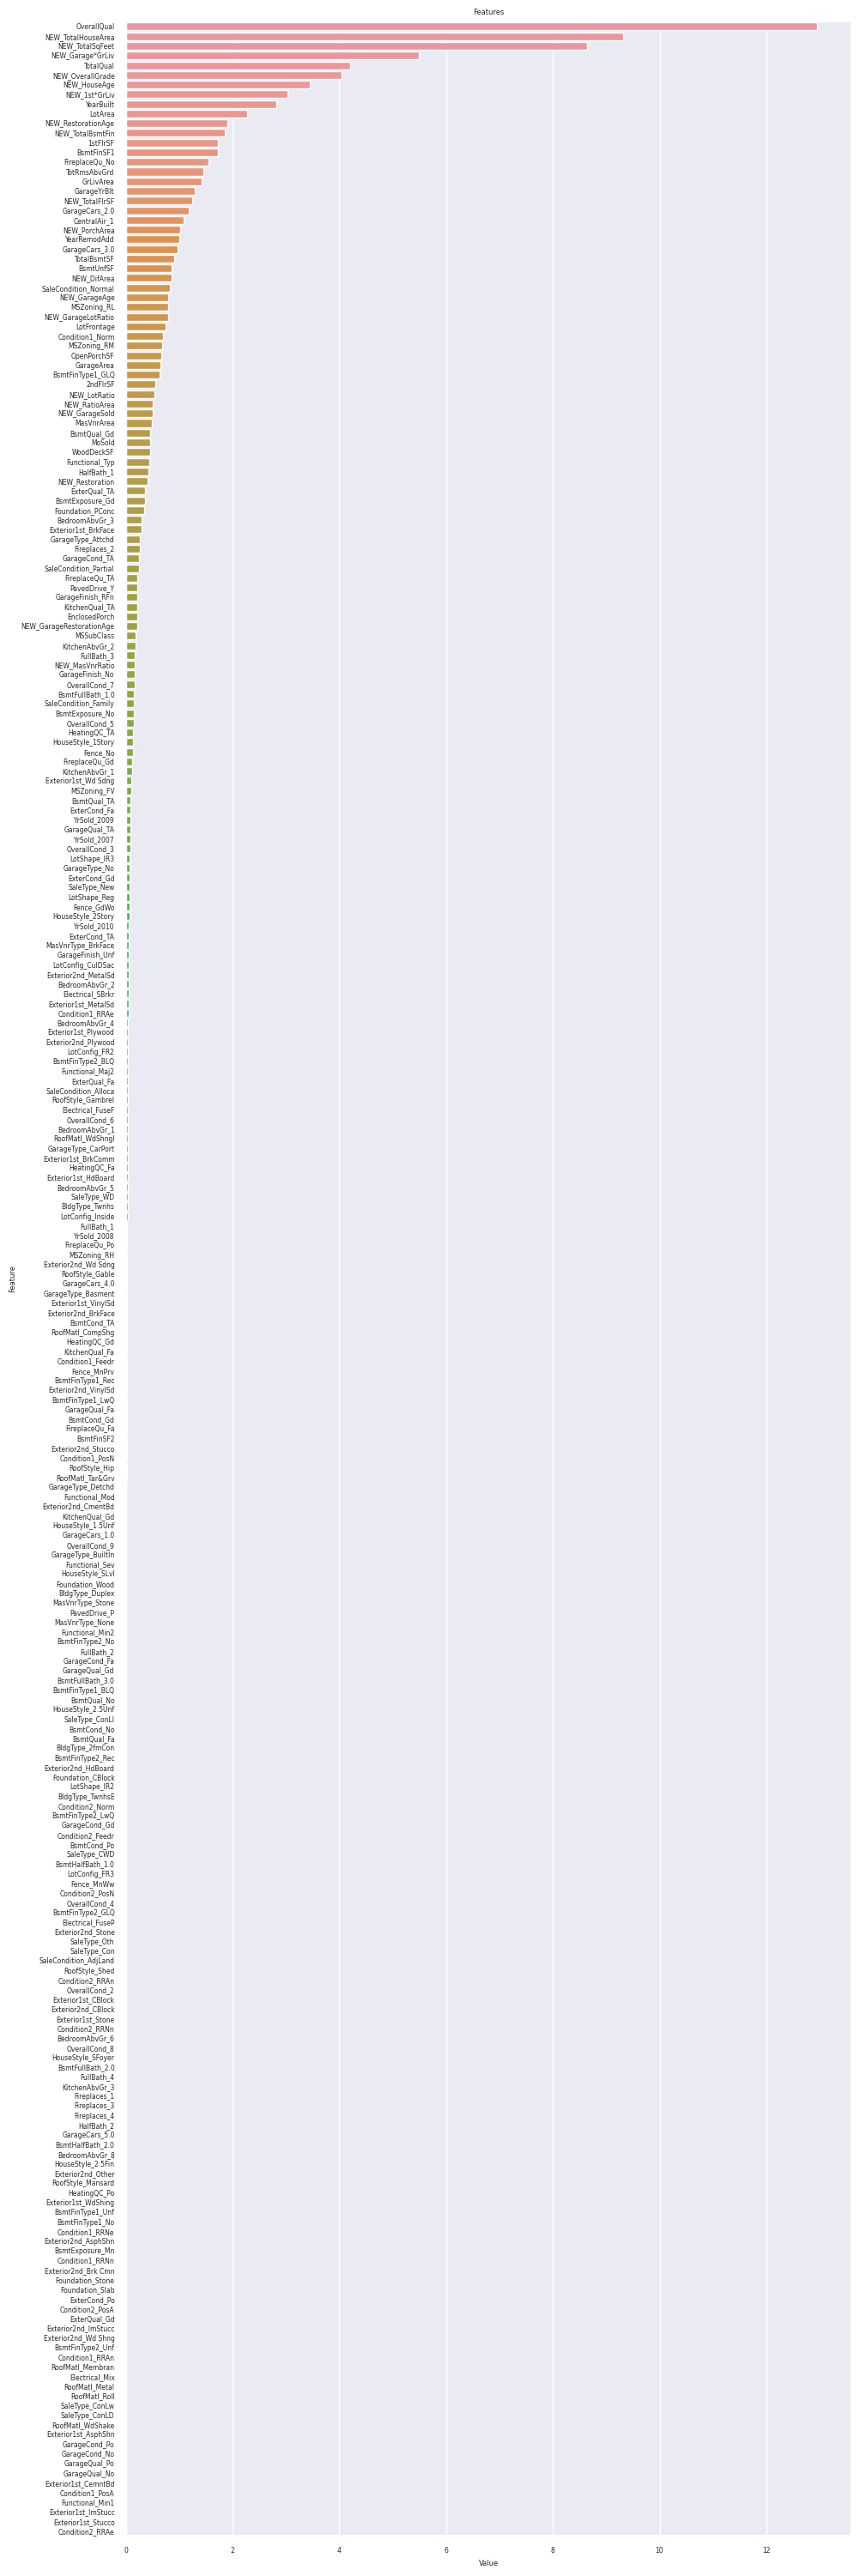

In [ ]:
model = CatBoostRegressor(verbose=0)
model.fit(X, y)

plot_importance(model, X)

In [ ]:
model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train)
predictions = model.predict(test_df.drop(["Id","SalePrice"], axis=1))

In [ ]:
predictions.shape

(1459,)

In [ ]:
predictions
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(predictions)
new_y
new_y_test = np.expm1(y_test)
new_y_test

703    140000.000
1361   260000.000
937    253000.000
1330   227000.000
113    217000.000
          ...    
903    240000.000
682    173000.000
1052   165000.000
1159   185000.000
672    165000.000
Name: SalePrice, Length: 292, dtype: float64

In [ ]:
#sub=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
#sub.head()

In [ ]:
#sub["SalePrice"]=new_y
#sub.head()

In [ ]:
#sub.to_csv("my_house_predict.csv", index=False)